<a href="https://colab.research.google.com/github/SaquibKhan-DS/311-Customer-Service-Optimization/blob/main/notebooks/01_data_cleaning_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df = pd.read_csv('/content/sample_data/311_Service_Requests_from_2010_to_Present.csv')
df.head(5)

/tmp/ipython-input-2278203993.py:1: DtypeWarning: Columns (43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/311_Service_Requests_from_2010_to_Present.csv')


Unique Key            Created Date             Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01/01/2016 12:55:15 AM   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01/01/2016 01:26:57 AM   NYPD   
2    32309159  12/31/2015 11:59:29 PM  01/01/2016 04:51:03 AM   NYPD   
3    32305098  12/31/2015 11:57:46 PM  01/01/2016 07:43:13 AM   NYPD   
4    32306529  12/31/2015 11:56:58 PM  01/01/2016 03:24:42 AM   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Street/Sidewalk       10458.0   
3  Commercial Overnight Parking  Street/Sidewalk       10461.0   
4              Blocked Sidewalk  Street/Sidewalk       11373.0   

        Incident Address  ... Bridge Highway Name Bridge Highway Direction  \
0    71 VERMILYEA AVENUE  ...                 NaN                      NaN   
1        27-07 23 AVENUE  ...                 NaN                      NaN   
2  2897 VALENTINE AVENUE  ...                 NaN                      NaN   
3    2940 BAISLEY AVENUE  ...                 NaN                      NaN   
4          87-14 57 ROAD  ...                 NaN                      NaN   

  Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction  \
0       NaN                    NaN             NaN             NaN   
1       NaN                    NaN             NaN             NaN   
2       NaN                    NaN             NaN             NaN   
3       NaN                    NaN             NaN             NaN   
4       NaN                    NaN             NaN             NaN   

  Ferry Terminal Name   Latitude  Longitude  \
0                 NaN  40.865682 -73.923501   
1                 NaN  40.775945 -73.915094   
2                 NaN  40.870325 -73.888525   
3                 NaN  40.835994 -73.828379   
4                 NaN  40.733060 -73.874170   

                                   Location  
0   (40.86568153633767, -73.92350095571744)  
1  (40.775945312321085, -73.91509393898605)  
2  (40.870324522111424, -73.88852464418646)  
3   (40.83599404683083, -73.82837939584206)  
4  (40.733059618956815, -73.87416975810375)  

[5 rows x 53 columns]

In [12]:
df.shape

(17844, 53)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      17844 non-null  int64  
 1   Created Date                    17844 non-null  object 
 2   Closed Date                     17737 non-null  object 
 3   Agency                          17844 non-null  object 
 4   Agency Name                     17844 non-null  object 
 5   Complaint Type                  17844 non-null  object 
 6   Descriptor                      17559 non-null  object 
 7   Location Type                   17844 non-null  object 
 8   Incident Zip                    17721 non-null  float64
 9   Incident Address                15885 non-null  object 
 10  Street Name                     15885 non-null  object 
 11  Cross Street 1                  15618 non-null  object 
 12  Cross Street 2                  

In [14]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [15]:
df.isna().sum()

Unique Key                            0
Created Date                          0
Closed Date                         107
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                          285
Location Type                         0
Incident Zip                        123
Incident Address                   1959
Street Name                        1959
Cross Street 1                     2226
Cross Street 2                     2253
Intersection Street 1             15893
Intersection Street 2             15920
Address Type                        132
City                                123
Landmark                          17835
Facility Type                       104
Status                                0
Due Date                              0
Resolution Description                0
Resolution Action Updated Date      105
Community Board                       1
Borough                               1
X Coordinate (State Plane)          160
Y Coordinate (State Plane)          160
Park Facility Name                    1
Park Borough                          1
School Name                           1
School Number                         1
School Region                         1
School Code                           1
School Phone Number                   1
School Address                        1
School City                           1
School State                          1
School Zip                            1
School Not Found                      1
School or Citywide Complaint      17844
Vehicle Type                      17844
Taxi Company Borough              17844
Taxi Pick Up Location             17844
Bridge Highway Name               17834
Bridge Highway Direction          17834
Road Ramp                         17835
Bridge Highway Segment            17835
Garage Lot Name                   17844
Ferry Direction                   17844
Ferry Terminal Name               17844
Latitude                            160
Longitude                           160
Location                            160
dtype: int64

In [16]:
df.isna().all()

Unique Key                        False
Created Date                      False
Closed Date                       False
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                        False
Location Type                     False
Incident Zip                      False
Incident Address                  False
Street Name                       False
Cross Street 1                    False
Cross Street 2                    False
Intersection Street 1             False
Intersection Street 2             False
Address Type                      False
City                              False
Landmark                          False
Facility Type                     False
Status                            False
Due Date                          False
Resolution Description            False
Resolution Action Updated Date    False
Community Board                   False
Borough                           False
X Coordinate (State Plane)        False
Y Coordinate (State Plane)        False
Park Facility Name                False
Park Borough                      False
School Name                       False
School Number                     False
School Region                     False
School Code                       False
School Phone Number               False
School Address                    False
School City                       False
School State                      False
School Zip                        False
School Not Found                  False
School or Citywide Complaint       True
Vehicle Type                       True
Taxi Company Borough               True
Taxi Pick Up Location              True
Bridge Highway Name               False
Bridge Highway Direction          False
Road Ramp                         False
Bridge Highway Segment            False
Garage Lot Name                    True
Ferry Direction                    True
Ferry Terminal Name                True
Latitude                          False
Longitude                         False
Location                          False
dtype: bool

In [17]:
nan_variables = df[df.columns[df.isna().all()]]
nan_variables

School or Citywide Complaint  Vehicle Type  Taxi Company Borough  \
0                               NaN           NaN                   NaN   
1                               NaN           NaN                   NaN   
2                               NaN           NaN                   NaN   
3                               NaN           NaN                   NaN   
4                               NaN           NaN                   NaN   
...                             ...           ...                   ...   
17839                           NaN           NaN                   NaN   
17840                           NaN           NaN                   NaN   
17841                           NaN           NaN                   NaN   
17842                           NaN           NaN                   NaN   
17843                           NaN           NaN                   NaN   

       Taxi Pick Up Location  Garage Lot Name  Ferry Direction  \
0                        NaN              NaN              NaN   
1                        NaN              NaN              NaN   
2                        NaN              NaN              NaN   
3                        NaN              NaN              NaN   
4                        NaN              NaN              NaN   
...                      ...              ...              ...   
17839                    NaN              NaN              NaN   
17840                    NaN              NaN              NaN   
17841                    NaN              NaN              NaN   
17842                    NaN              NaN              NaN   
17843                    NaN              NaN              NaN   

       Ferry Terminal Name  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
...                    ...  
17839                  NaN  
17840                  NaN  
17841                  NaN  
17842                  NaN  
17843                  NaN  

[17844 rows x 7 columns]

In [18]:
df.dropna(how='all')

Unique Key            Created Date             Closed Date Agency  \
0        32310363  12/31/2015 11:59:45 PM  01/01/2016 12:55:15 AM   NYPD   
1        32309934  12/31/2015 11:59:44 PM  01/01/2016 01:26:57 AM   NYPD   
2        32309159  12/31/2015 11:59:29 PM  01/01/2016 04:51:03 AM   NYPD   
3        32305098  12/31/2015 11:57:46 PM  01/01/2016 07:43:13 AM   NYPD   
4        32306529  12/31/2015 11:56:58 PM  01/01/2016 03:24:42 AM   NYPD   
...           ...                     ...                     ...    ...   
17839    32185903  12/12/2015 11:42:41 PM  12/13/2015 02:48:59 AM   NYPD   
17840    32191181  12/12/2015 11:42:38 PM  12/13/2015 07:25:21 AM   NYPD   
17841    32188417  12/12/2015 11:42:01 PM  12/13/2015 03:44:36 AM   NYPD   
17842    32189671  12/12/2015 11:41:40 PM  12/13/2015 03:36:56 AM   NYPD   
17843    32184973  12/12/2015 11:41:05 PM  12/13/2015 05:43:02 AM   NYPD   

                           Agency Name           Complaint Type  \
0      New York City Police Department  Noise - Street/Sidewalk   
1      New York City Police Department         Blocked Driveway   
2      New York City Police Department         Blocked Driveway   
3      New York City Police Department          Illegal Parking   
4      New York City Police Department          Illegal Parking   
...                                ...                      ...   
17839  New York City Police Department         Blocked Driveway   
17840  New York City Police Department  Noise - Street/Sidewalk   
17841  New York City Police Department  Noise - Street/Sidewalk   
17842  New York City Police Department          Noise - Vehicle   
17843  New York City Police Department       Noise - Commercial   

                         Descriptor     Location Type  Incident Zip  \
0                  Loud Music/Party   Street/Sidewalk       10034.0   
1                         No Access   Street/Sidewalk       11105.0   
2                         No Access   Street/Sidewalk       10458.0   
3      Commercial Overnight Parking   Street/Sidewalk       10461.0   
4                  Blocked Sidewalk   Street/Sidewalk       11373.0   
...                             ...               ...           ...   
17839                     No Access   Street/Sidewalk       11421.0   
17840              Loud Music/Party   Street/Sidewalk       10032.0   
17841                  Loud Talking   Street/Sidewalk       11206.0   
17842               Car/Truck Music   Street/Sidewalk       11385.0   
17843              Loud Music/Party  Store/Commercial       11377.0   

            Incident Address  ... Bridge Highway Name  \
0        71 VERMILYEA AVENUE  ...                 NaN   
1            27-07 23 AVENUE  ...                 NaN   
2      2897 VALENTINE AVENUE  ...                 NaN   
3        2940 BAISLEY AVENUE  ...                 NaN   
4              87-14 57 ROAD  ...                 NaN   
...                      ...  ...                 ...   
17839        86-83 80 STREET  ...                 NaN   
17840    559 WEST 164 STREET  ...                 NaN   
17841      991 MYRTLE AVENUE  ...                 NaN   
17842      2044 GATES AVENUE  ...                 NaN   
17843       ROOSEVELT AVENUE  ...                 NaN   

      Bridge Highway Direction Road Ramp Bridge Highway Segment  \
0                          NaN       NaN                    NaN   
1                          NaN       NaN                    NaN   
2                          NaN       NaN                    NaN   
3                          NaN       NaN                    NaN   
4                          NaN       NaN                    NaN   
...                        ...       ...                    ...   
17839                      NaN       NaN                    NaN   
17840                      NaN       NaN                    NaN   
17841                      NaN       NaN                    NaN   
17842                      NaN       NaN                    NaN   
17843         

In [19]:
df = df.dropna(axis=1, how='all')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17844 entries, 0 to 17843
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      17844 non-null  int64  
 1   Created Date                    17844 non-null  object 
 2   Closed Date                     17737 non-null  object 
 3   Agency                          17844 non-null  object 
 4   Agency Name                     17844 non-null  object 
 5   Complaint Type                  17844 non-null  object 
 6   Descriptor                      17559 non-null  object 
 7   Location Type                   17844 non-null  object 
 8   Incident Zip                    17721 non-null  float64
 9   Incident Address                15885 non-null  object 
 10  Street Name                     15885 non-null  object 
 11  Cross Street 1                  15618 non-null  object 
 12  Cross Street 2                  

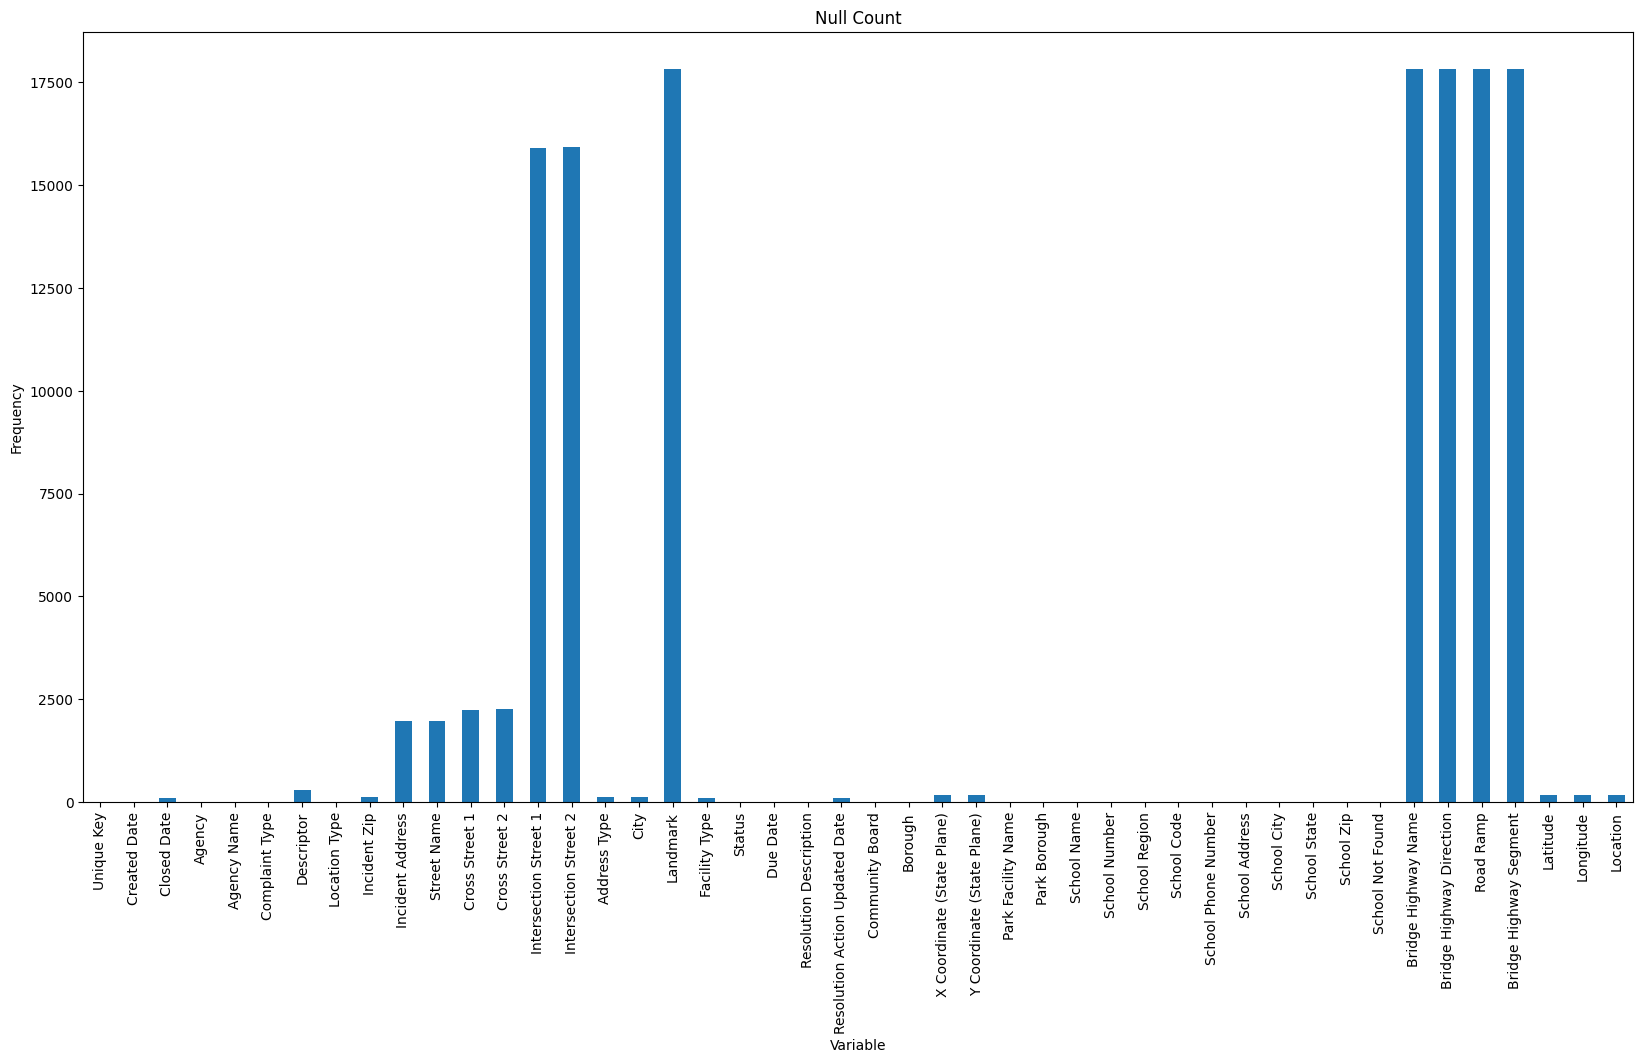

In [21]:
null_count = df.isnull().sum()
null_count.plot(kind='bar',figsize=(20,10))
plt.title("Null Count")
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.show()

In [22]:
len(df[df['Closed Date'].isna()])

107

In [23]:
len(df)

17844

In [24]:
df = df[df['Closed Date'].notna()]
len(df)

17737

In [25]:
df.head(5)

Unique Key            Created Date             Closed Date Agency  \
0    32310363  12/31/2015 11:59:45 PM  01/01/2016 12:55:15 AM   NYPD   
1    32309934  12/31/2015 11:59:44 PM  01/01/2016 01:26:57 AM   NYPD   
2    32309159  12/31/2015 11:59:29 PM  01/01/2016 04:51:03 AM   NYPD   
3    32305098  12/31/2015 11:57:46 PM  01/01/2016 07:43:13 AM   NYPD   
4    32306529  12/31/2015 11:56:58 PM  01/01/2016 03:24:42 AM   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Street/Sidewalk       10458.0   
3  Commercial Overnight Parking  Street/Sidewalk       10461.0   
4              Blocked Sidewalk  Street/Sidewalk       11373.0   

        Incident Address  ... School State   School Zip School Not Found  \
0    71 VERMILYEA AVENUE  ...  Unspecified  Unspecified                N   
1        27-07 23 AVENUE  ...  Unspecified  Unspecified                N   
2  2897 VALENTINE AVENUE  ...  Unspecified  Unspecified                N   
3    2940 BAISLEY AVENUE  ...  Unspecified  Unspecified                N   
4          87-14 57 ROAD  ...  Unspecified  Unspecified                N   

  Bridge Highway Name Bridge Highway Direction Road Ramp  \
0                 NaN                      NaN       NaN   
1                 NaN                      NaN       NaN   
2                 NaN                      NaN       NaN   
3                 NaN                      NaN       NaN   
4                 NaN                      NaN       NaN   

  Bridge Highway Segment   Latitude  Longitude  \
0                    NaN  40.865682 -73.923501   
1                    NaN  40.775945 -73.915094   
2                    NaN  40.870325 -73.888525   
3                    NaN  40.835994 -73.828379   
4                    NaN  40.733060 -73.874170   

                                   Location  
0   (40.86568153633767, -73.92350095571744)  
1  (40.775945312321085, -73.91509393898605)  
2  (40.870324522111424, -73.88852464418646)  
3   (40.83599404683083, -73.82837939584206)  
4  (40.733059618956815, -73.87416975810375)  

[5 rows x 46 columns]

In [26]:
#Analyzing the date column, and removing the incorrect time-line
df['created_dt'] = pd.to_datetime(df['Created Date'])
df['closed_dt'] = pd.to_datetime(df['Closed Date'])

/tmp/ipython-input-1843109246.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_dt'] = pd.to_datetime(df['Created Date'])
/tmp/ipython-input-1843109246.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['closed_dt'] = pd.to_datetime(df['Closed Date'])


In [27]:
df.query('created_dt > closed_dt')

Empty DataFrame
Columns: [Unique Key, Created Date, Closed Date, Agency, Agency Name, Complaint Type, Descriptor, Location Type, Incident Zip, Incident Address, Street Name, Cross Street 1, Cross Street 2, Intersection Street 1, Intersection Street 2, Address Type, City, Landmark, Facility Type, Status, Due Date, Resolution Description, Resolution Action Updated Date, Community Board, Borough, X Coordinate (State Plane), Y Coordinate (State Plane), Park Facility Name, Park Borough, School Name, School Number, School Region, School Code, School Phone Number, School Address, School City, School State, School Zip, School Not Found, Bridge Highway Name, Bridge Highway Direction, Road Ramp, Bridge Highway Segment, Latitude, Longitude, Location, created_dt, closed_dt]
Index: []

[0 rows x 48 columns]

In [28]:
df['Complaint Type'].isna().sum()

np.int64(0)

In [29]:
df['City'].isna().sum()

np.int64(22)

In [30]:
df['City'] = df.apply(lambda x: 'Unknown City' if pd.isnull(x['City']) else x['City'],axis=1)
df['City'].isna().sum()

np.int64(0)

**Complaint in each City**

In [31]:
df_city = df.groupby(['City']).size()
df_city

City
ARVERNE                  15
ASTORIA                 421
BAYSIDE                  66
BELLEROSE                13
BRONX                  2233
BROOKLYN               6072
CAMBRIA HEIGHTS          21
CENTRAL PARK              1
COLLEGE POINT            73
CORONA                  300
EAST ELMHURST           170
ELMHURST                217
FAR ROCKAWAY             51
FLORAL PARK               8
FLUSHING                439
FOREST HILLS            118
FRESH MEADOWS           162
GLEN OAKS                17
HOLLIS                   61
HOWARD BEACH             60
JACKSON HEIGHTS         107
JAMAICA                 455
KEW GARDENS              48
LITTLE NECK              48
LONG ISLAND CITY        147
MASPETH                 165
MIDDLE VILLAGE          121
NEW HYDE PARK             2
NEW YORK               3405
OAKLAND GARDENS          33
OZONE PARK              158
QUEENS VILLAGE          101
REGO PARK               124
RICHMOND HILL           124
RIDGEWOOD               382
ROCKAWAY PARK            26
ROSEDALE                 48
SAINT ALBANS             66
SOUTH OZONE PARK        124
SOUTH RICHMOND HILL     179
SPRINGFIELD GARDENS      34
STATEN ISLAND           825
SUNNYSIDE                40
Unknown City             22
WHITESTONE               67
WOODHAVEN               154
WOODSIDE                214
dtype: int64

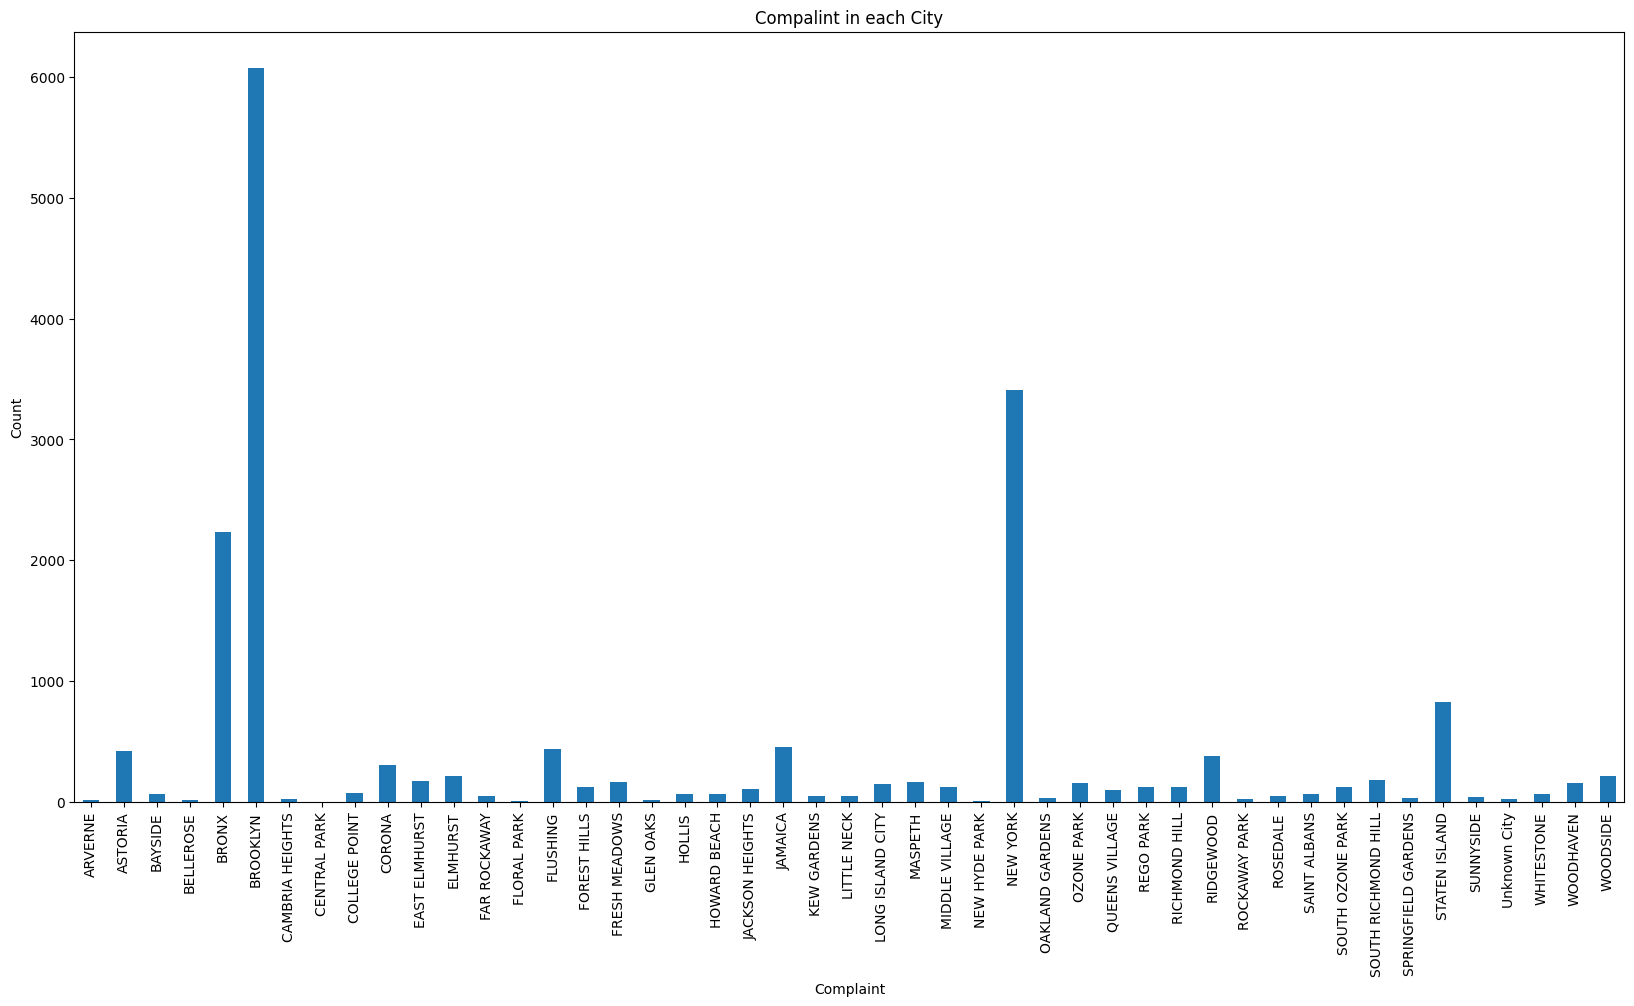

In [32]:
df_city.plot(kind='bar',figsize=(20,10))
plt.title('Compalint in each City')
plt.xlabel('Complaint')
plt.ylabel('Count')
plt.show()

**Complaint Concentration across BROOKLYN**

In [33]:
df_brooklyn = df.loc[df['City']== 'BROOKLYN']
df_brooklyn

Unique Key            Created Date             Closed Date Agency  \
5        32306554  12/31/2015 11:56:30 PM  01/01/2016 01:50:11 AM   NYPD   
9        32308391  12/31/2015 11:53:58 PM  01/01/2016 01:17:40 AM   NYPD   
13       32305074  12/31/2015 11:47:58 PM  01/01/2016 08:18:47 AM   NYPD   
17       32310273  12/31/2015 11:44:52 PM  01/01/2016 12:36:10 AM   NYPD   
18       32306617  12/31/2015 11:40:59 PM  01/01/2016 02:37:28 AM   NYPD   
...           ...                     ...                     ...    ...   
17833    32187129  12/12/2015 11:44:16 PM  12/13/2015 12:40:32 AM   NYPD   
17834    32188394  12/12/2015 11:44:14 PM  12/13/2015 12:40:33 AM   NYPD   
17835    32188387  12/12/2015 11:43:57 PM  12/13/2015 12:32:40 AM   NYPD   
17838    32184505  12/12/2015 11:42:44 PM  12/13/2015 12:40:32 AM   NYPD   
17841    32188417  12/12/2015 11:42:01 PM  12/13/2015 03:44:36 AM   NYPD   

                           Agency Name           Complaint Type  \
5      New York City Police Department          Illegal Parking   
9      New York City Police Department         Blocked Driveway   
13     New York City Police Department          Illegal Parking   
17     New York City Police Department       Noise - Commercial   
18     New York City Police Department       Noise - Commercial   
...                                ...                      ...   
17833  New York City Police Department          Illegal Parking   
17834  New York City Police Department  Noise - Street/Sidewalk   
17835  New York City Police Department  Noise - Street/Sidewalk   
17838  New York City Police Department          Illegal Parking   
17841  New York City Police Department  Noise - Street/Sidewalk   

                          Descriptor        Location Type  Incident Zip  \
5      Posted Parking Sign Violation      Street/Sidewalk       11215.0   
9                          No Access      Street/Sidewalk       11219.0   
13     Posted Parking Sign Violation      Street/Sidewalk       11208.0   
17                  Loud Music/Party  Club/Bar/Restaurant       11217.0   
18                  Loud Music/Party  Club/Bar/Restaurant       11234.0   
...                              ...                  ...           ...   
17833                Blocked Hydrant      Street/Sidewalk       11218.0   
17834                   Loud Talking      Street/Sidewalk       11230.0   
17835                   Loud Talking      Street/Sidewalk       11209.0   
17838                Blocked Hydrant      Street/Sidewalk       11218.0   
17841                   Loud Talking      Street/Sidewalk       11206.0   

           Incident Address  ... School Not Found Bridge Highway Name  \
5             260 21 STREET  ...                N                 NaN   
9            1408 66 STREET  ...                N                 NaN   
13             38 COX PLACE  ...                N                 NaN   
17        622 DEGRAW STREET  ...                N                 NaN   
18     2192 FLATBUSH AVENUE  ...                N                 NaN   
...                     ...  ...              ...                 ...   
17833     550 EAST 4 STREET  ...                N                 NaN   
17834          414 AVENUE N  ...                N                 NaN   
17835         375 86 STREET  ...                N                 NaN   
17838     550 EAST 4 STREET  ...                N                 NaN   
17841     991 MYRTLE AVENUE  ...                N                 NaN   

      Bridge Highway Direction Road Ramp Bridge Highway Segment   Latitude  \
5                          NaN       NaN                    NaN  40.660823   
9                          NaN       NaN                    NaN  40.623793   
13                         NaN       NaN                    NaN  40.687511   
17                         NaN       NaN                    NaN  40.679154   
18                         NaN       NaN                    NaN  40.616550   
...                        ...       ...   

In [34]:
df_brooklyn[['Latitude','Longitude']].plot(kind='scatter',figsize=(15,10),x = 'Longitude',y= 'Latitude', title = 'Complaint Concentration Across BROOKLYN')
plt.xlabel('Latitude in Degrees')
plt.ylabel('Longitude in Degrees')


Text(0, 0.5, 'Longitude in Degrees')

In [35]:
df_brooklyn[['Latitude','Longitude']].plot(kind='hexbin',figsize=(15,10),colormap = 'Paired', mincnt=1,x = 'Longitude',y= 'Latitude', gridsize=25, title = 'Complaint Concentration Across BROOKLYN')
plt.xlabel('Latitude in Degrees')
plt.ylabel('Longitude in Degrees')

Text(0, 0.5, 'Longitude in Degrees')

In [36]:
df['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth'], dtype=object)

In [37]:
df['Complaint Type'].value_counts()

Complaint Type
Blocked Driveway             5729
Illegal Parking              5073
Noise - Commercial           2296
Noise - Street/Sidewalk      1432
Derelict Vehicle             1110
Noise - Vehicle               678
Animal Abuse                  471
Homeless Encampment           236
Vending                       207
Traffic                       196
Posting Advertisement          99
Drinking                       67
Noise - Park                   58
Noise - House of Worship       29
Panhandling                    17
Urinating in Public            16
Bike/Roller/Skate Chronic      15
Disorderly Youth                5
Graffiti                        3
Name: count, dtype: int64

Text(0, 0.5, 'Count')

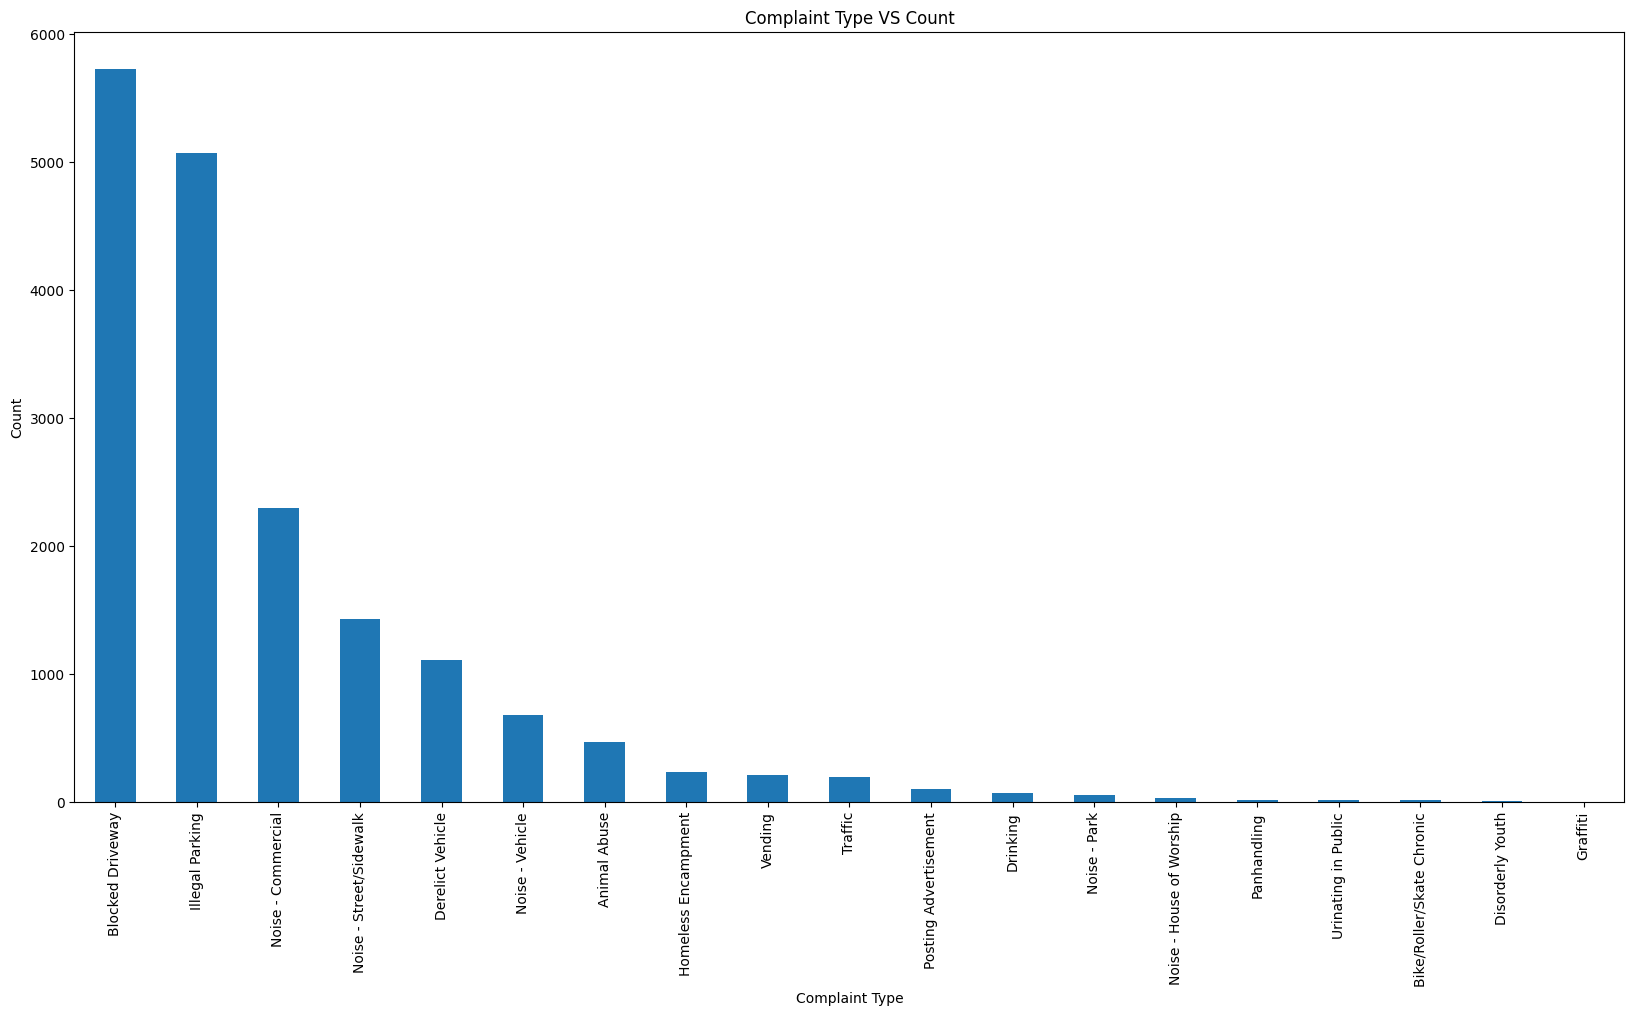

In [38]:
df['Complaint Type'].value_counts().plot(kind='bar', figsize=(20, 10))
plt.title('Complaint Type VS Count')
plt.xlabel("Complaint Type")
plt.ylabel("Count")

In [39]:
df_ny = df.loc[df['City']== "NEW YORK"]
df_ny

Unique Key            Created Date             Closed Date Agency  \
0        32310363  12/31/2015 11:59:45 PM  01/01/2016 12:55:15 AM   NYPD   
6        32306559  12/31/2015 11:55:32 PM  01/01/2016 01:53:54 AM   NYPD   
19       32308195  12/31/2015 11:40:55 PM  01/01/2016 12:28:31 AM   NYPD   
23       32308765  12/31/2015 11:32:46 PM  01/01/2016 12:25:21 AM   NYPD   
26       32305916  12/31/2015 11:26:41 PM  12/31/2015 11:53:31 PM   NYPD   
...           ...                     ...                     ...    ...   
17823    32186991  12/12/2015 11:49:19 PM  12/13/2015 04:13:09 AM   NYPD   
17824    32185011  12/12/2015 11:49:16 PM  12/13/2015 07:24:51 AM   NYPD   
17825    32188052  12/12/2015 11:48:39 PM  12/13/2015 12:53:57 AM   NYPD   
17826    32190555  12/12/2015 11:48:16 PM  12/13/2015 04:27:24 AM   NYPD   
17840    32191181  12/12/2015 11:42:38 PM  12/13/2015 07:25:21 AM   NYPD   

                           Agency Name            Complaint Type  \
0      New York City Police Department   Noise - Street/Sidewalk   
6      New York City Police Department           Illegal Parking   
19     New York City Police Department   Noise - Street/Sidewalk   
23     New York City Police Department           Illegal Parking   
26     New York City Police Department  Noise - House of Worship   
...                                ...                       ...   
17823  New York City Police Department        Noise - Commercial   
17824  New York City Police Department   Noise - Street/Sidewalk   
17825  New York City Police Department        Noise - Commercial   
17826  New York City Police Department        Noise - Commercial   
17840  New York City Police Department   Noise - Street/Sidewalk   

                           Descriptor        Location Type  Incident Zip  \
0                    Loud Music/Party      Street/Sidewalk       10034.0   
6                     Blocked Hydrant      Street/Sidewalk       10032.0   
19                   Loud Music/Party      Street/Sidewalk       10026.0   
23     Double Parked Blocking Vehicle      Street/Sidewalk       10030.0   
26                   Loud Music/Party     House of Worship       10031.0   
...                               ...                  ...           ...   
17823                Loud Music/Party  Club/Bar/Restaurant       10040.0   
17824                Loud Music/Party      Street/Sidewalk       10032.0   
17825                Loud Music/Party  Club/Bar/Restaurant       10022.0   
17826                Loud Music/Party  Club/Bar/Restaurant       10075.0   
17840                Loud Music/Party      Street/Sidewalk       10032.0   

          Incident Address  ... School Not Found Bridge Highway Name  \
0      71 VERMILYEA AVENUE  ...                N                 NaN   
6      524 WEST 169 STREET  ...                N                 NaN   
19     264 WEST 118 STREET  ...                N                 NaN   
23     133 WEST 134 STREET  ...                N                 NaN   
26     452 WEST 147 STREET  ...                N                 NaN   
...                    ...  ...              ...                 ...   
17823       1 NAGLE AVENUE  ...                N                 NaN   
17824  558 WEST 164 STREET  ...                N                 NaN   
17825                  NaN  ...                N                 NaN   
17826        1471 1 AVENUE  ...                N                 NaN   
17840  559 WEST 164 STREET  ...                N                 NaN   

      Bridge Highway Direction Road Ramp Bridge Highway Segment   Latitude  \
0                          NaN       NaN                    NaN  40.865682   
6                          NaN       NaN                    NaN  40.840848   
19                         NaN       NaN                    NaN  40.805267   
23                         NaN       NaN                    NaN  40.814002   
26                         NaN       NaN                    NaN  40.826102   
...                        ... 

In [40]:
df_ny['Complaint Type'].isnull().sum()

np.int64(0)

In [41]:
df_ny['Complaint Type'].value_counts()

Complaint Type
Noise - Commercial           1020
Illegal Parking               766
Noise - Street/Sidewalk       680
Noise - Vehicle               256
Homeless Encampment           170
Vending                       138
Blocked Driveway              115
Animal Abuse                   94
Traffic                        53
Derelict Vehicle               34
Noise - Park                   30
Panhandling                    12
Drinking                        9
Urinating in Public             9
Noise - House of Worship        7
Bike/Roller/Skate Chronic       6
Posting Advertisement           4
Graffiti                        1
Disorderly Youth                1
Name: count, dtype: int64

In [42]:
df_ny['Complaint Type'].value_counts().plot(kind='bar',figsize = (20,10))
plt.title('Count by Complaint Type for New York')
plt.xlabel('Complaint Type')
plt.ylabel('Count')
plt.show()

In [43]:
df_top10_ctypes=df.groupby(['Complaint Type']).size().nlargest(10)
df_top10_ctypes

Complaint Type
Blocked Driveway           5729
Illegal Parking            5073
Noise - Commercial         2296
Noise - Street/Sidewalk    1432
Derelict Vehicle           1110
Noise - Vehicle             678
Animal Abuse                471
Homeless Encampment         236
Vending                     207
Traffic                     196
dtype: int64

In [44]:
df['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth'], dtype=object)

In [45]:
city_list=df['City'].unique()
city_list

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'Unknown City',
       'RIDGEWOOD', 'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND',
       'OZONE PARK', 'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK'], dtype=object)

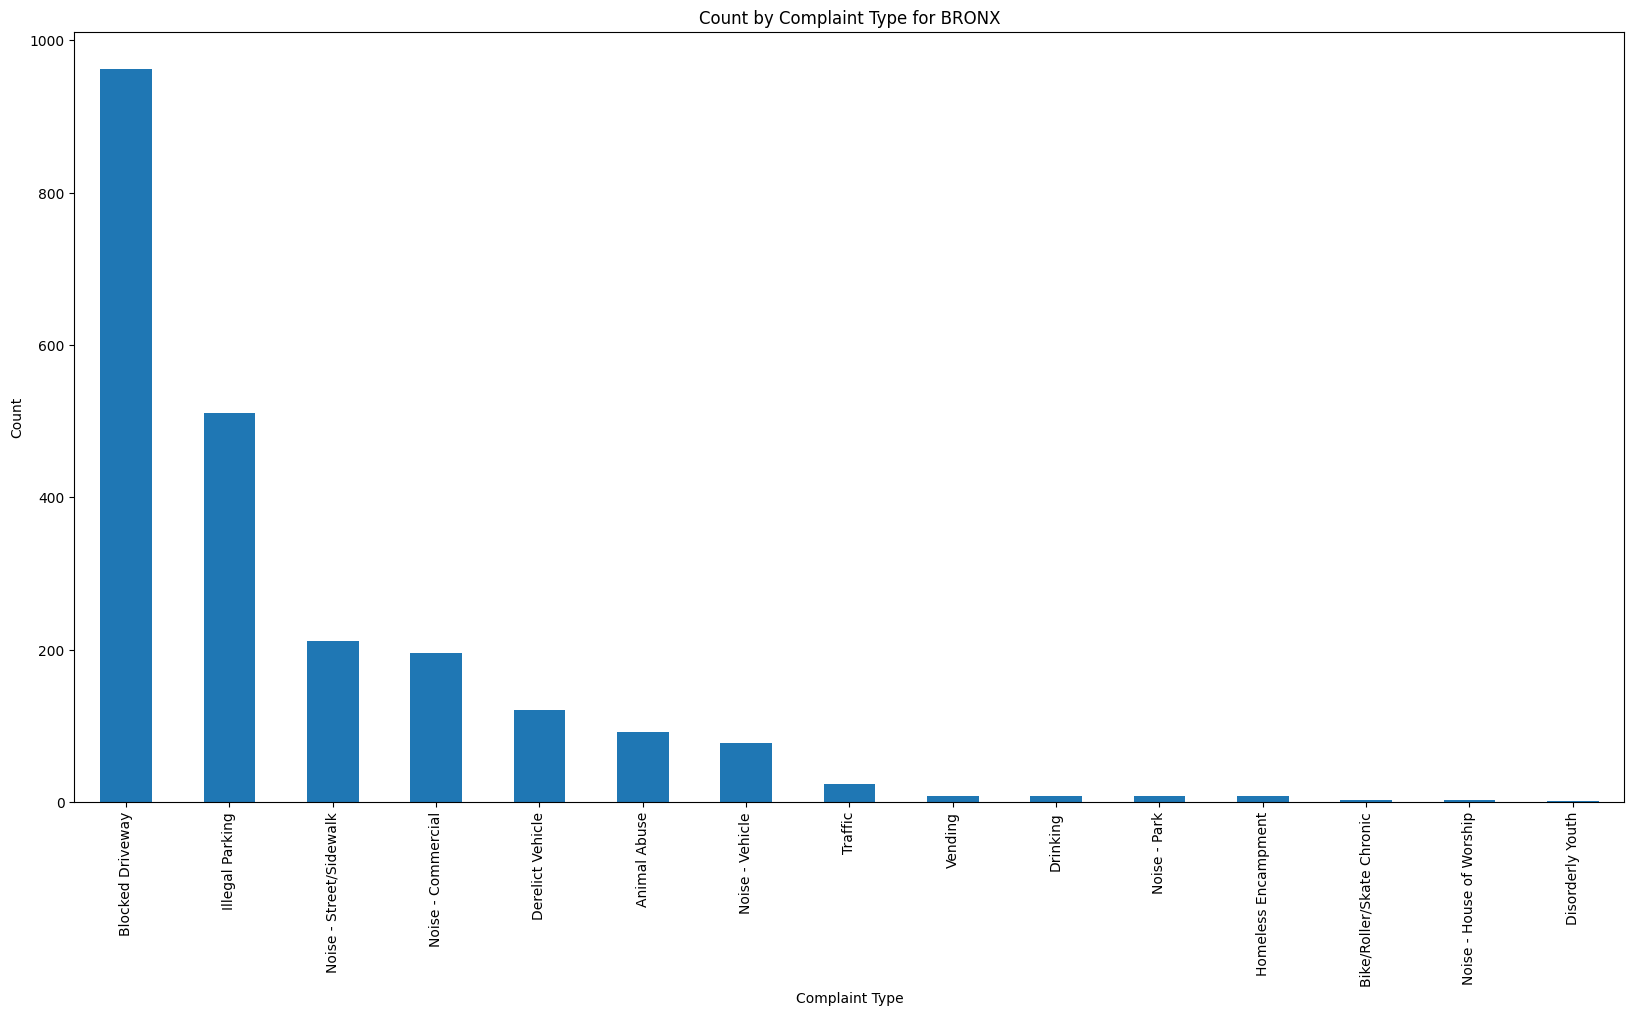

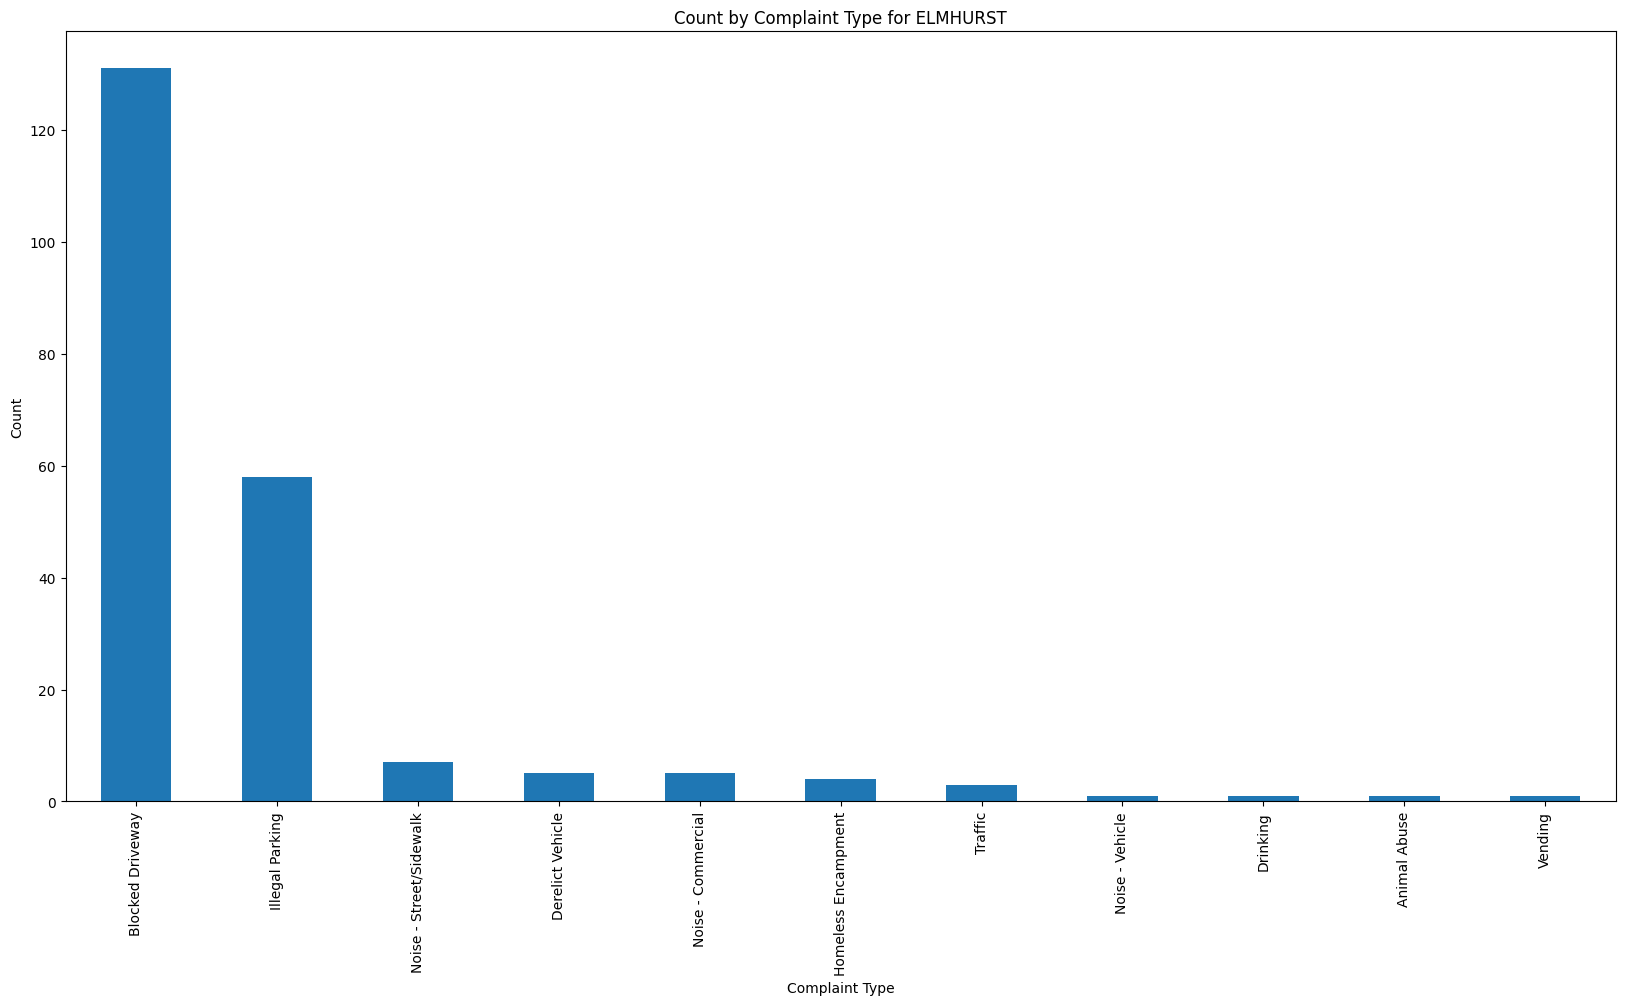

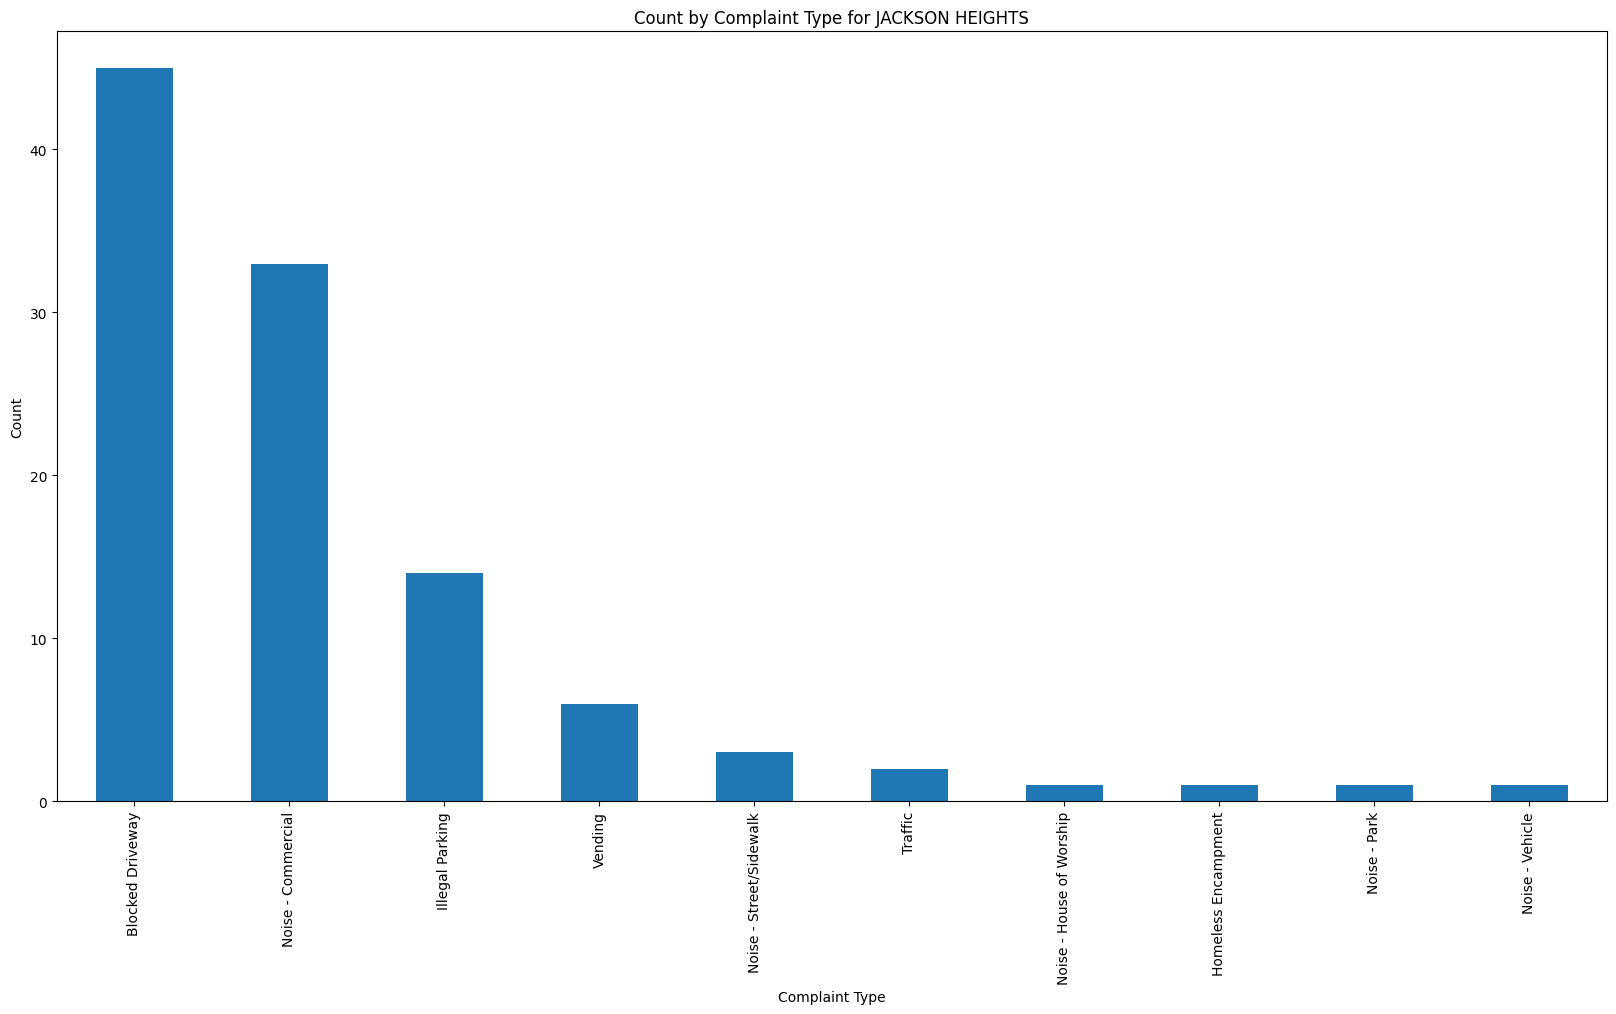

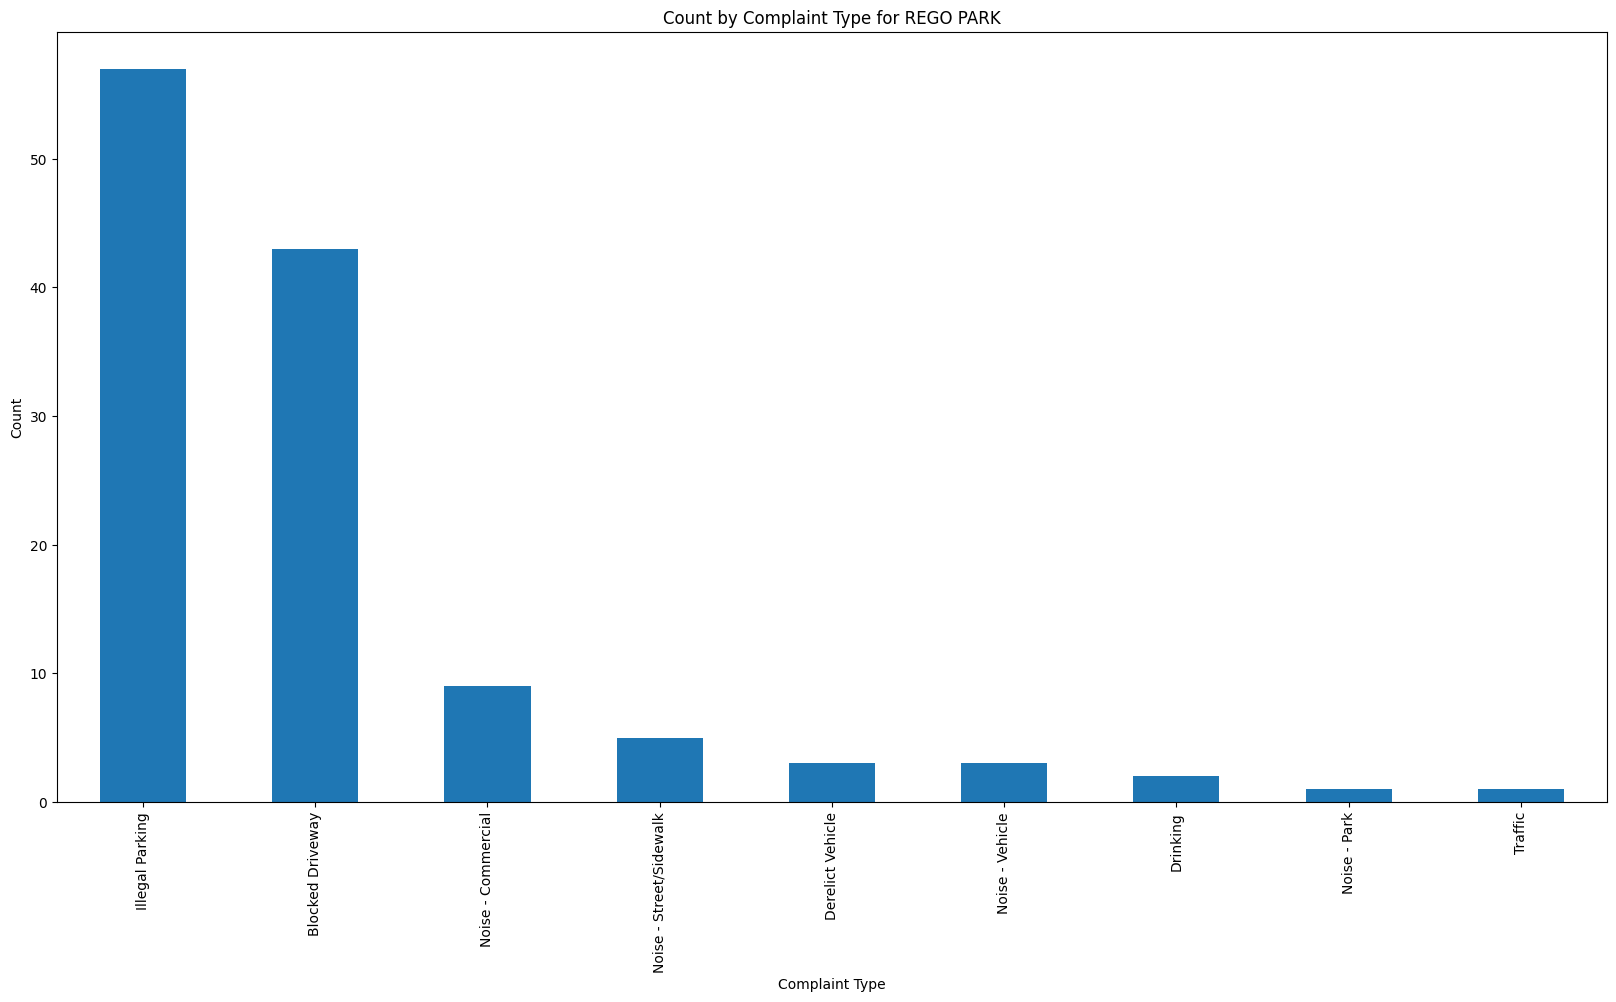

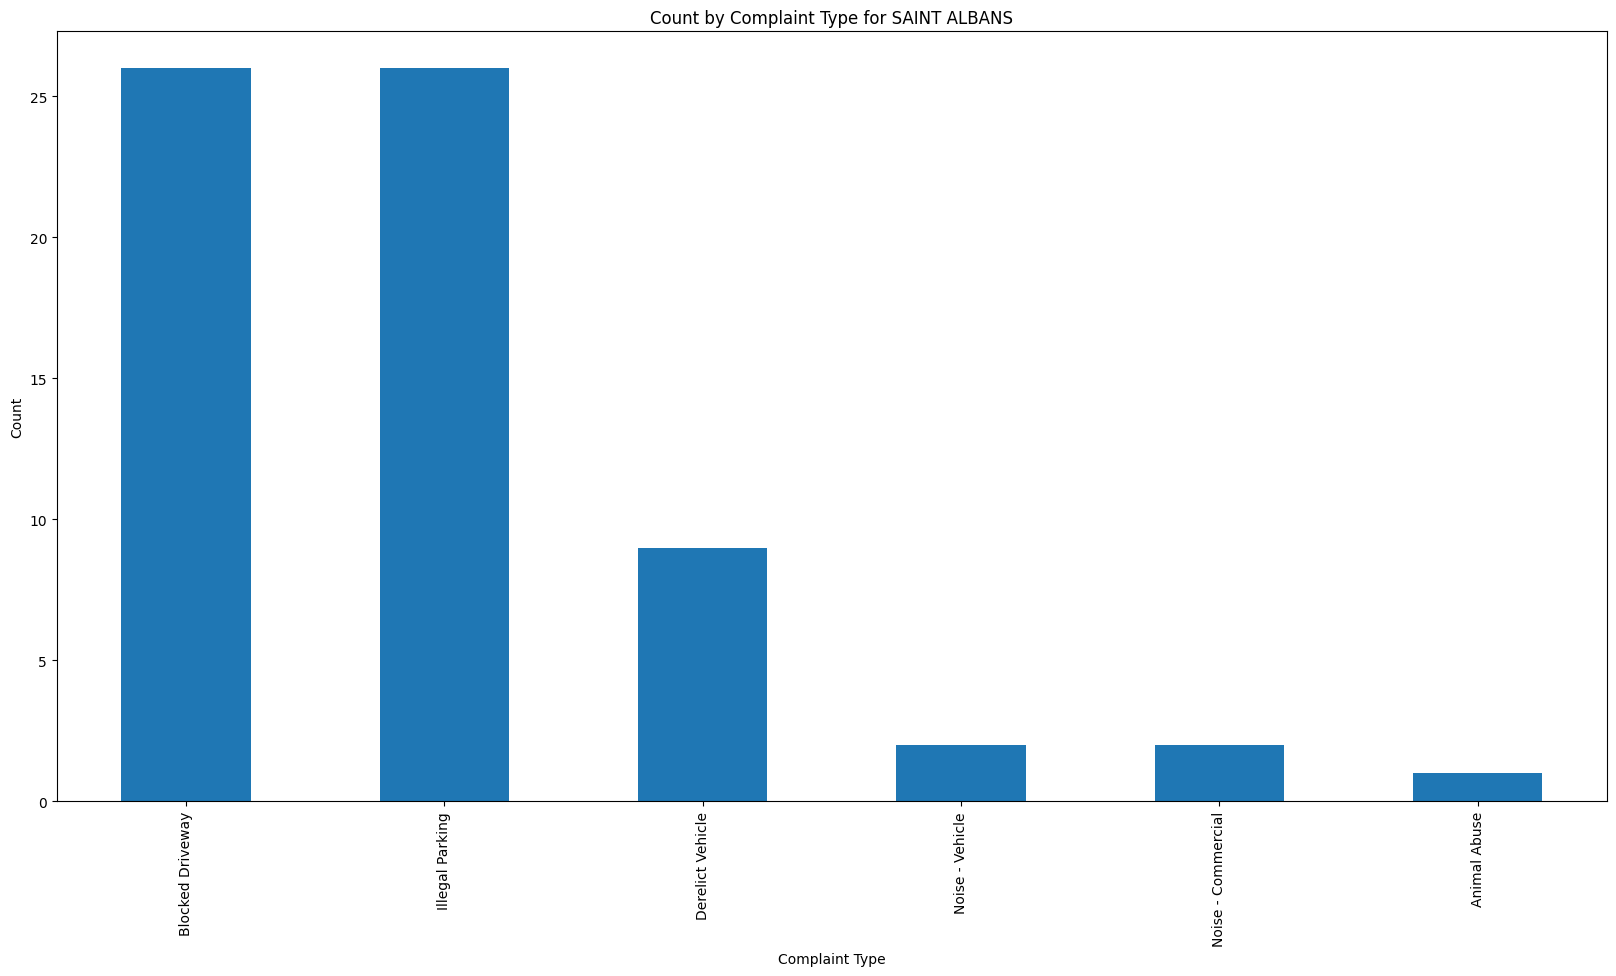

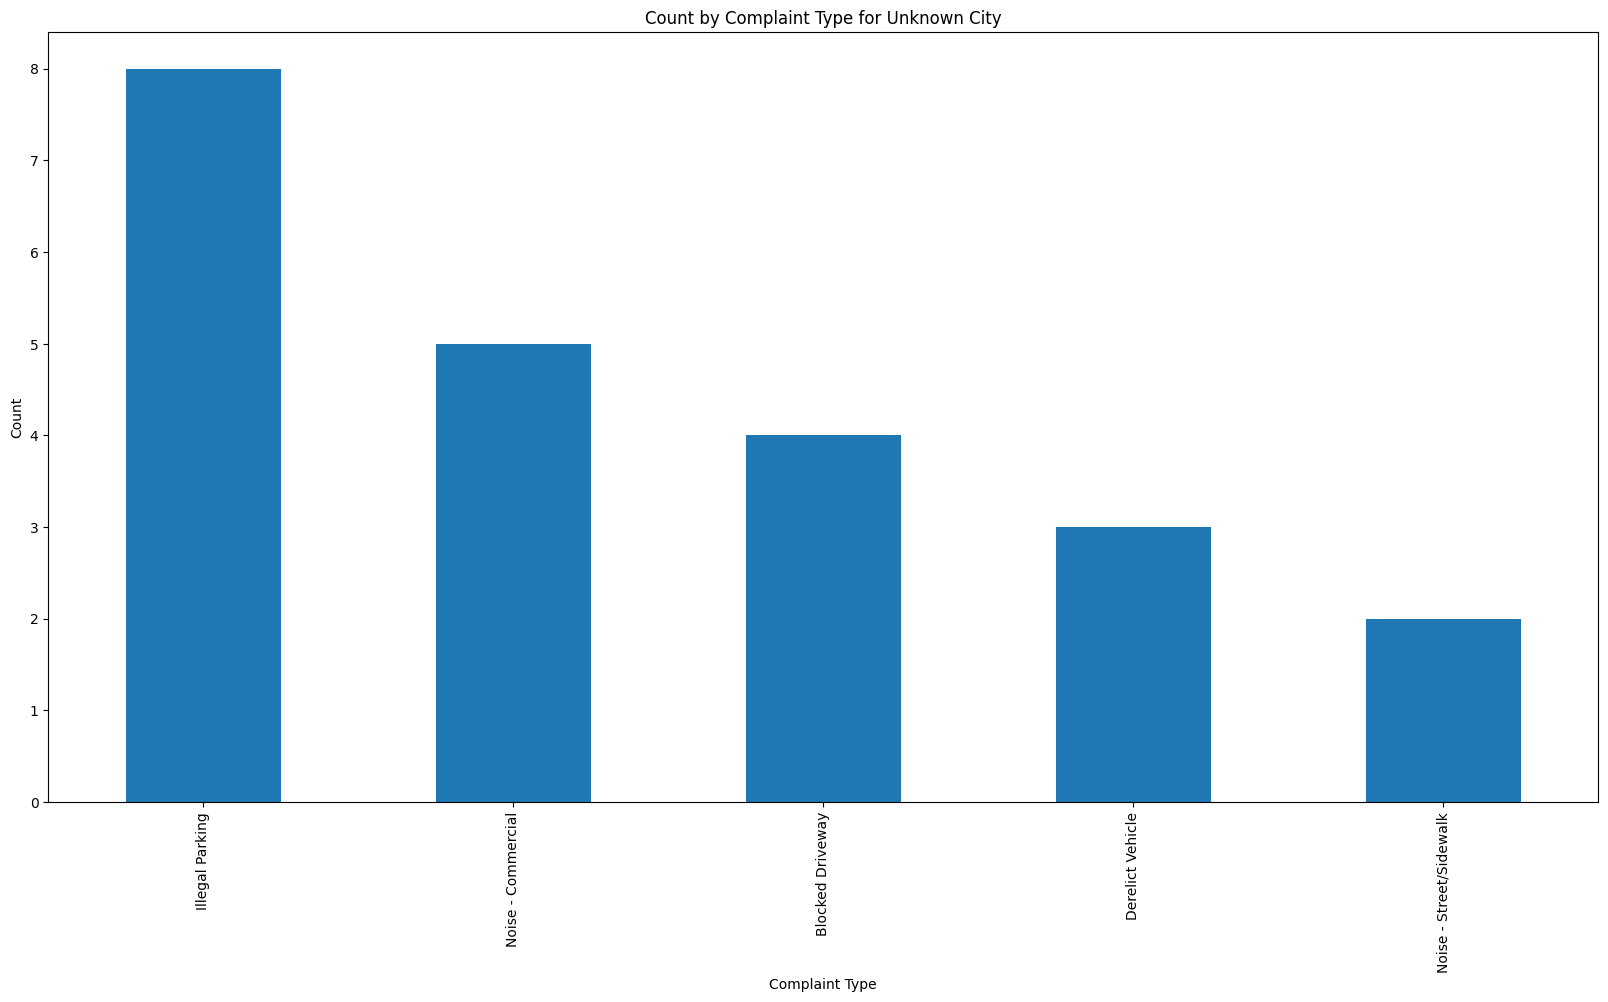

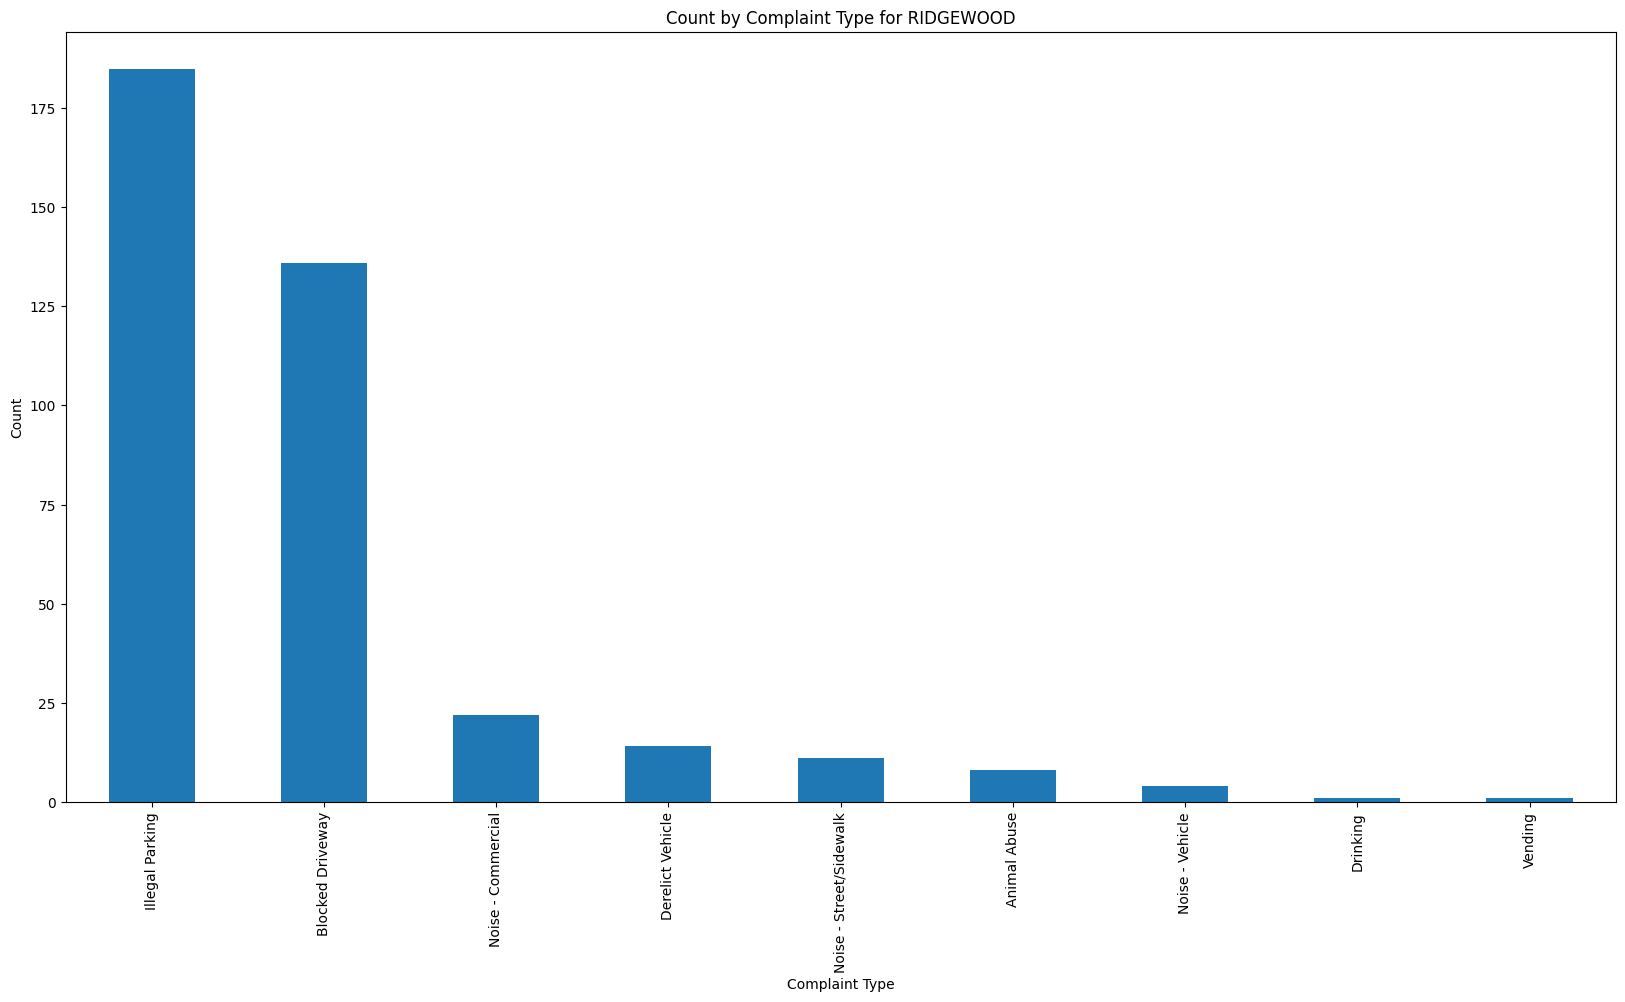

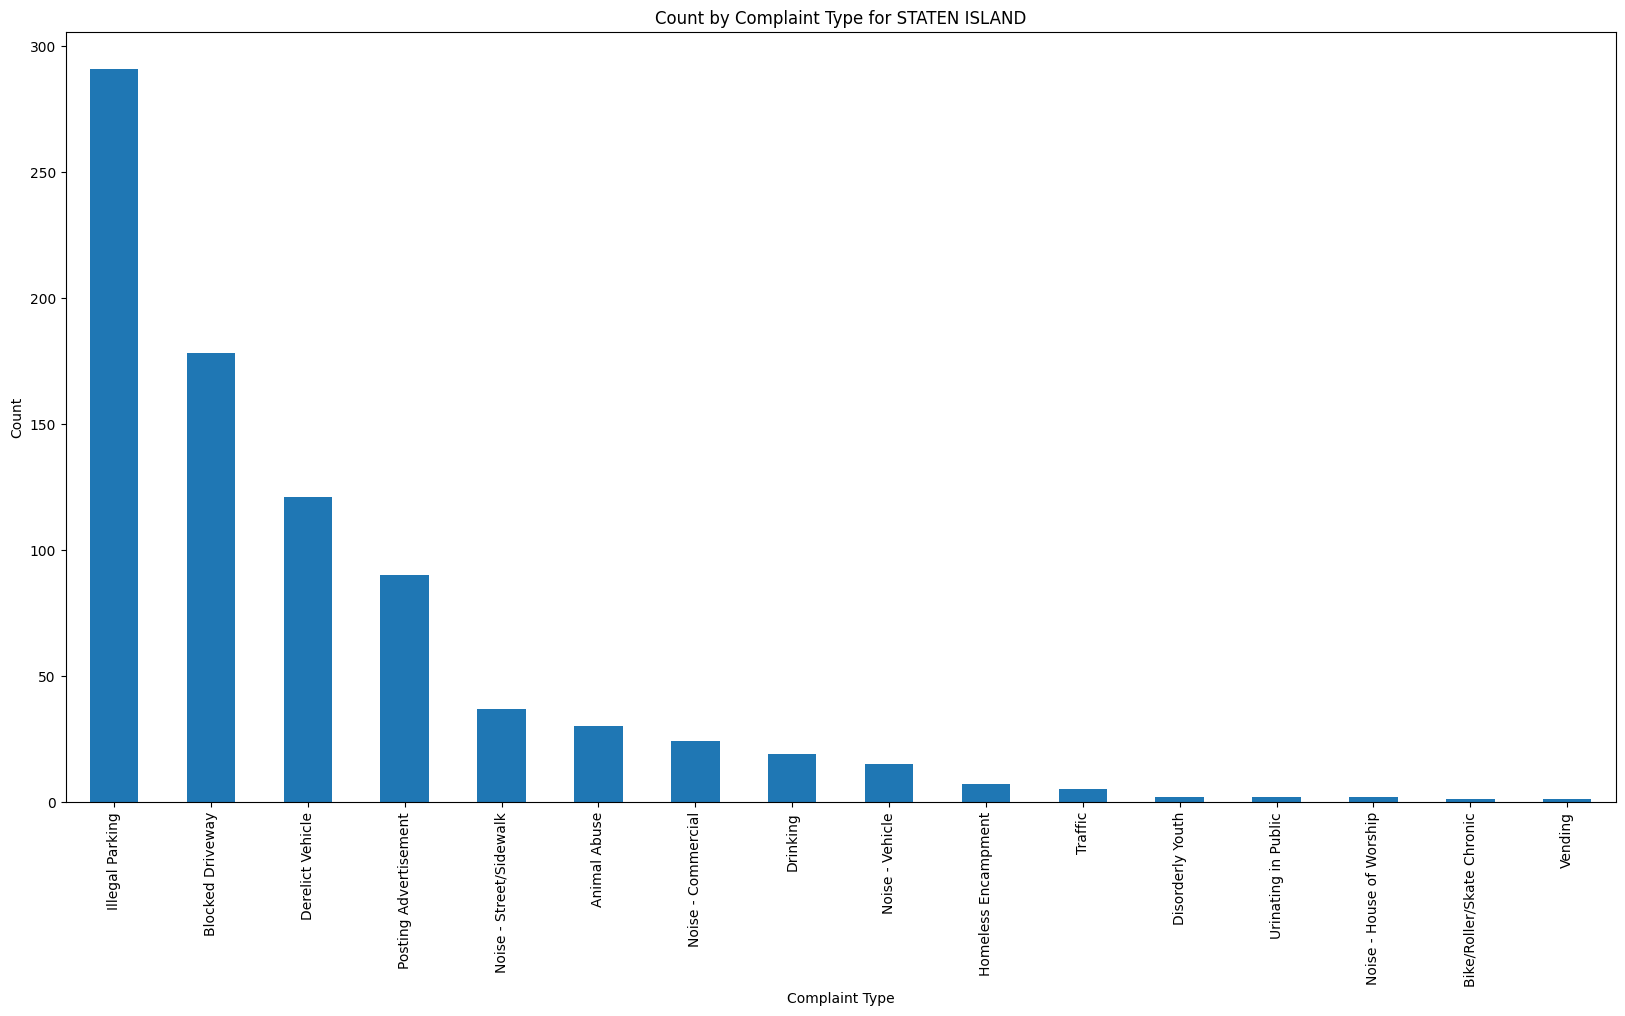

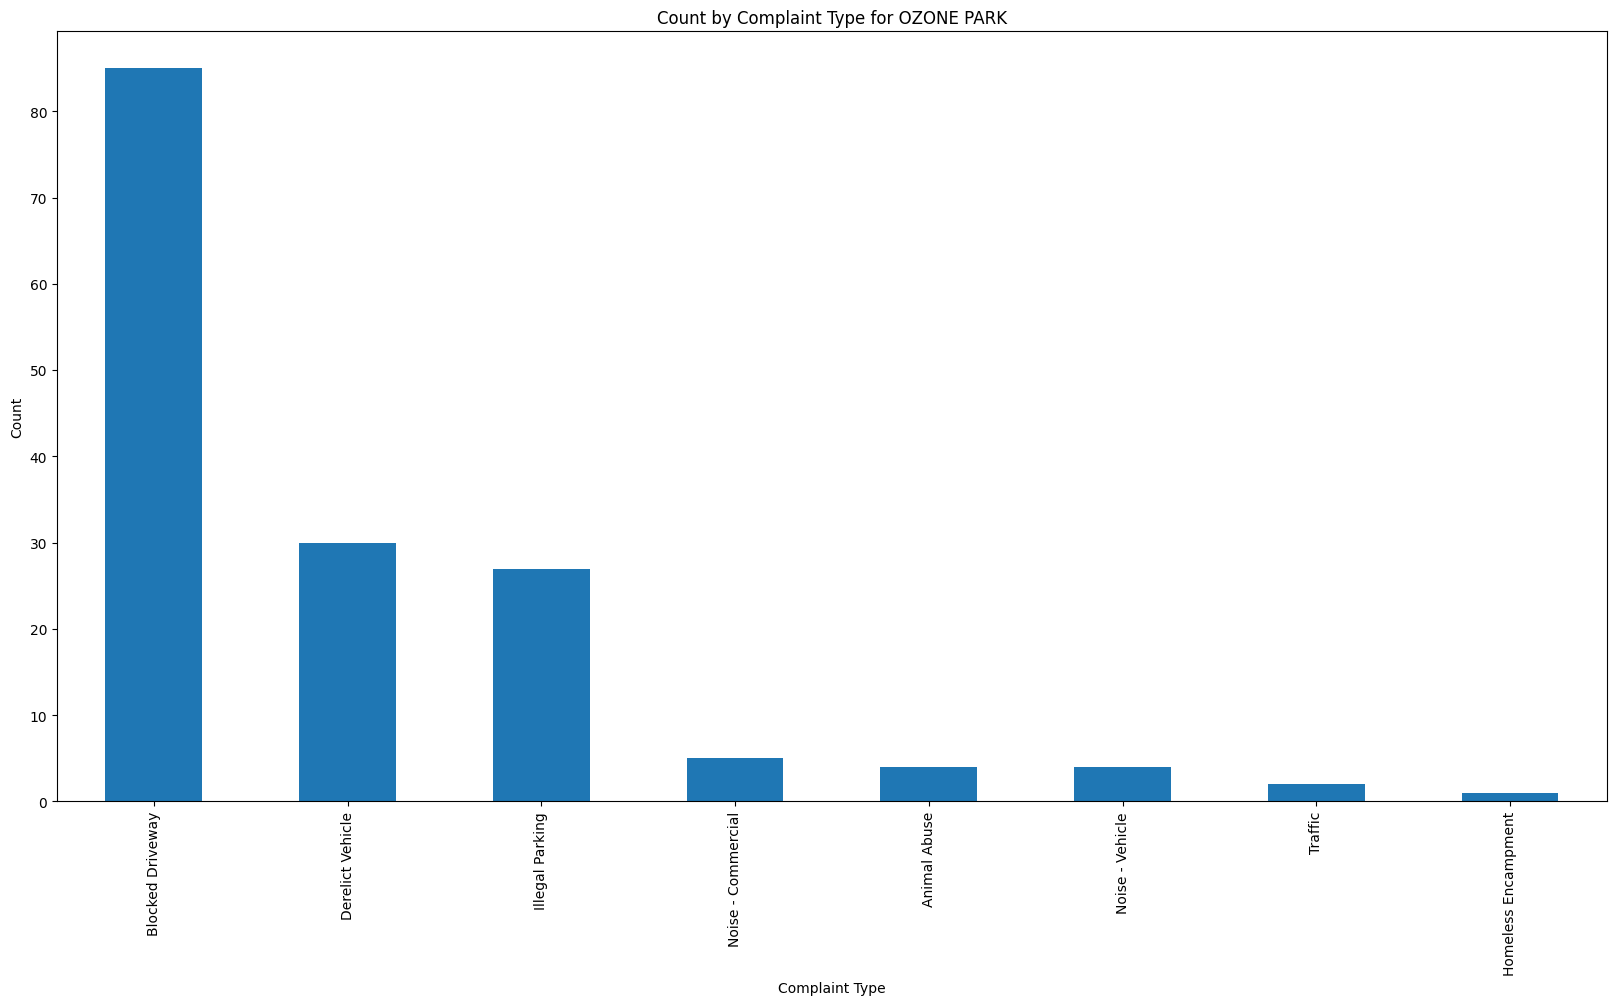

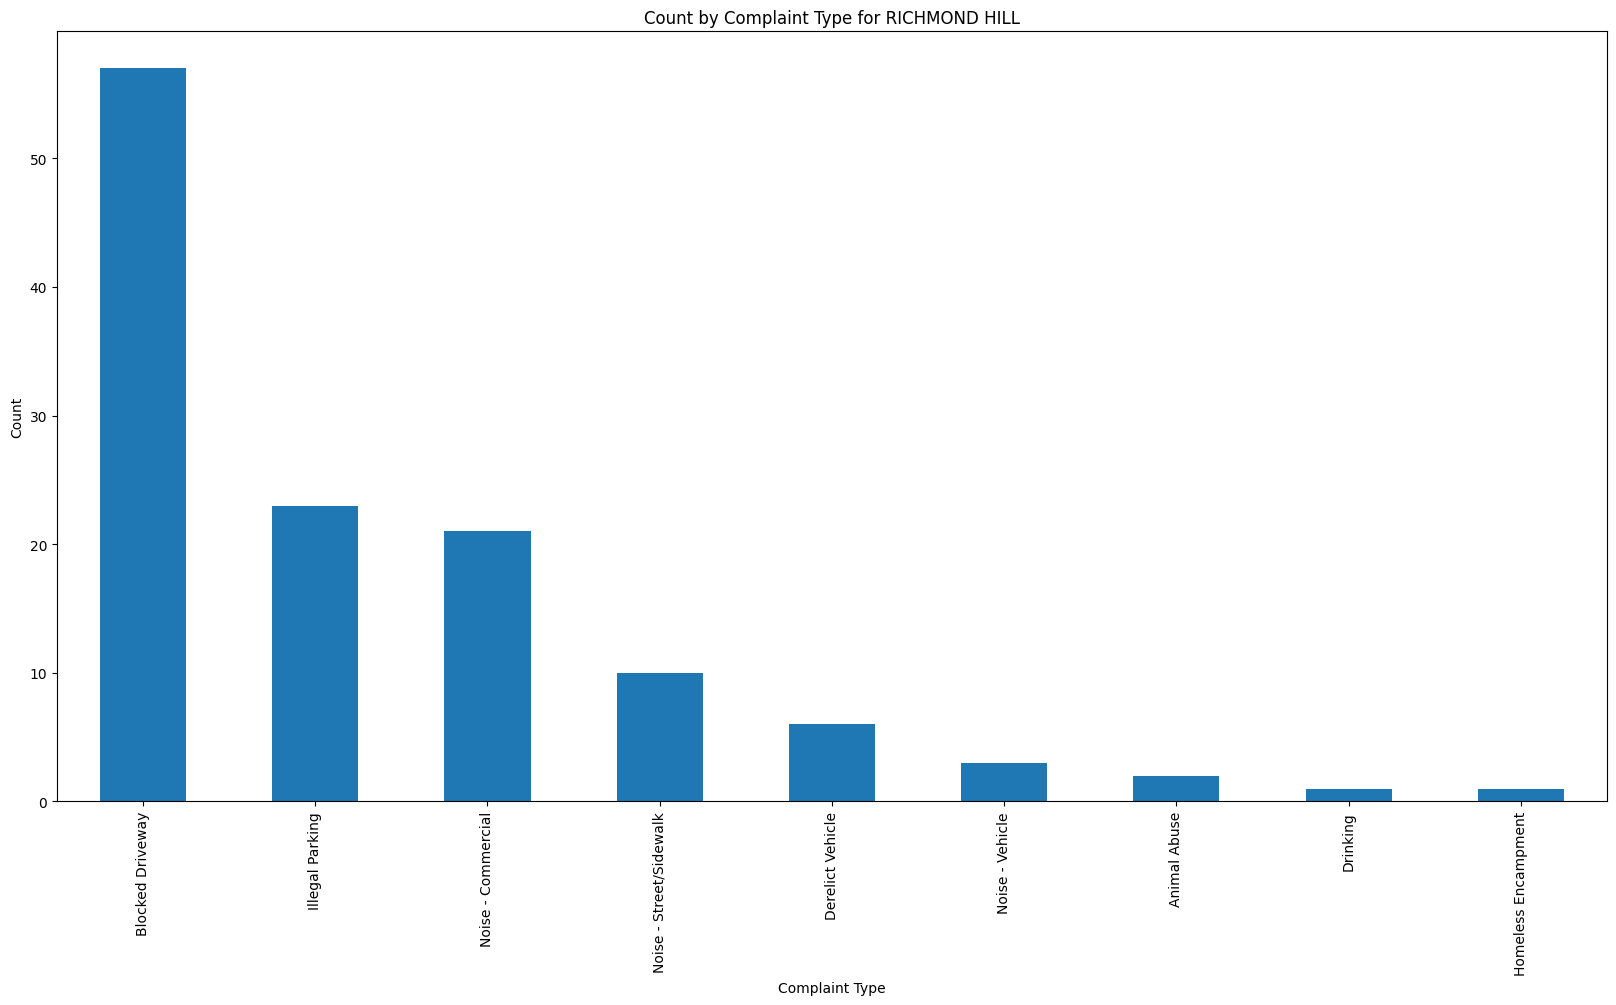

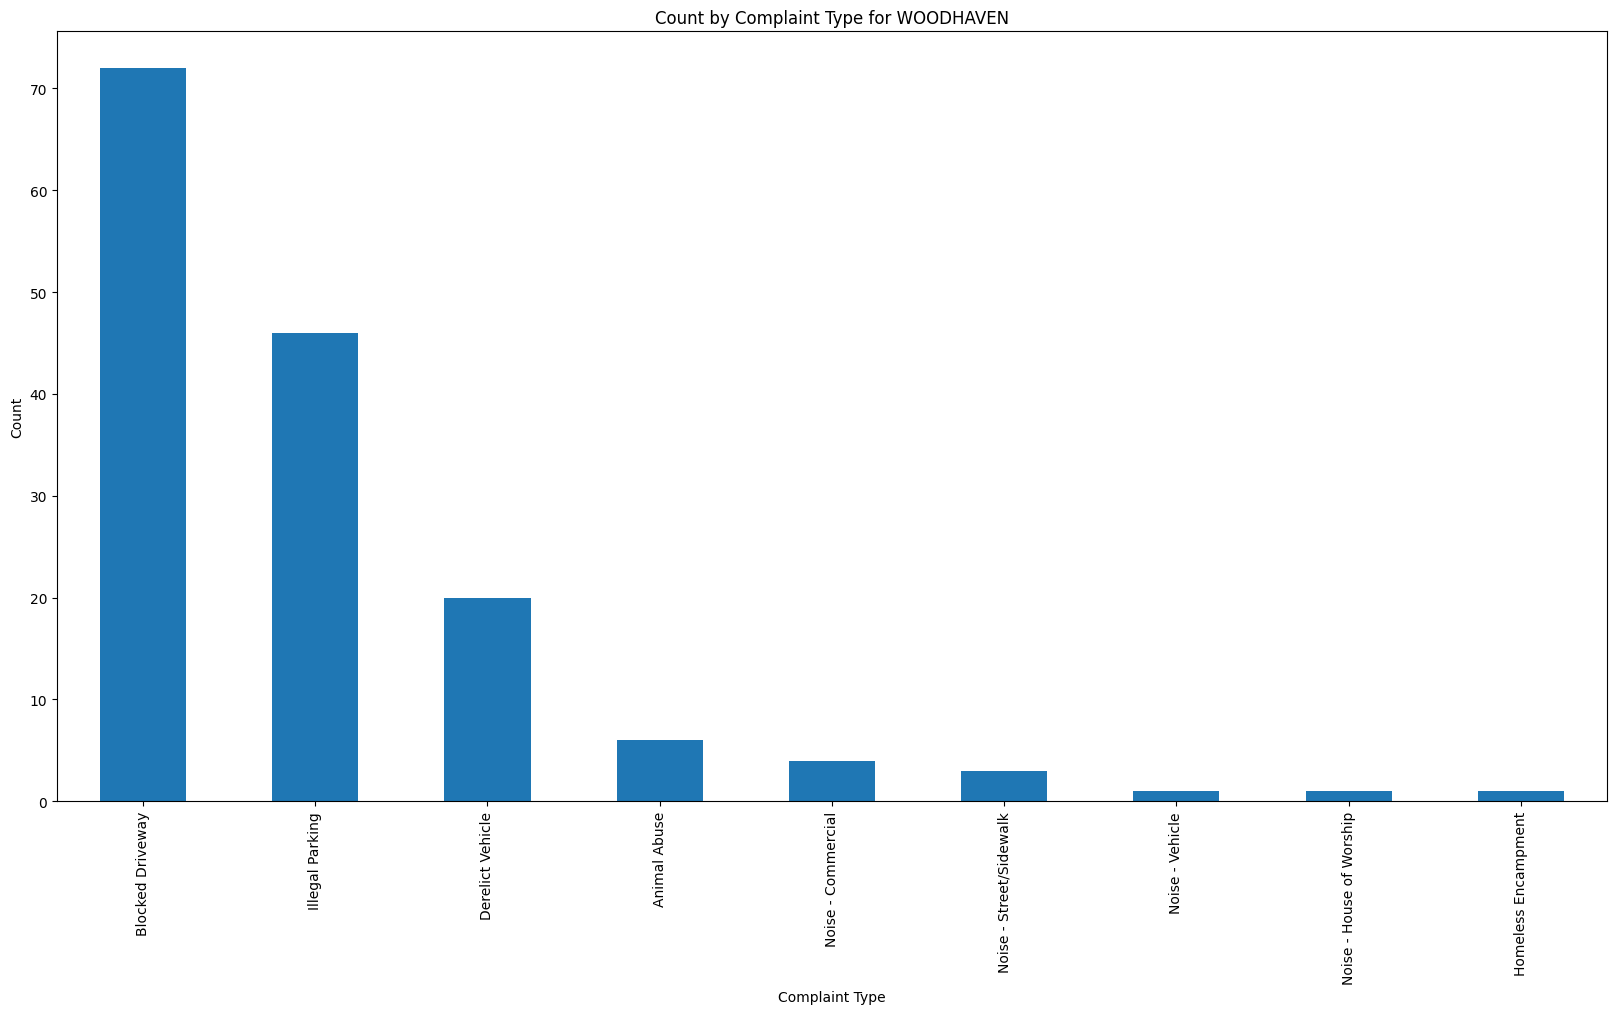

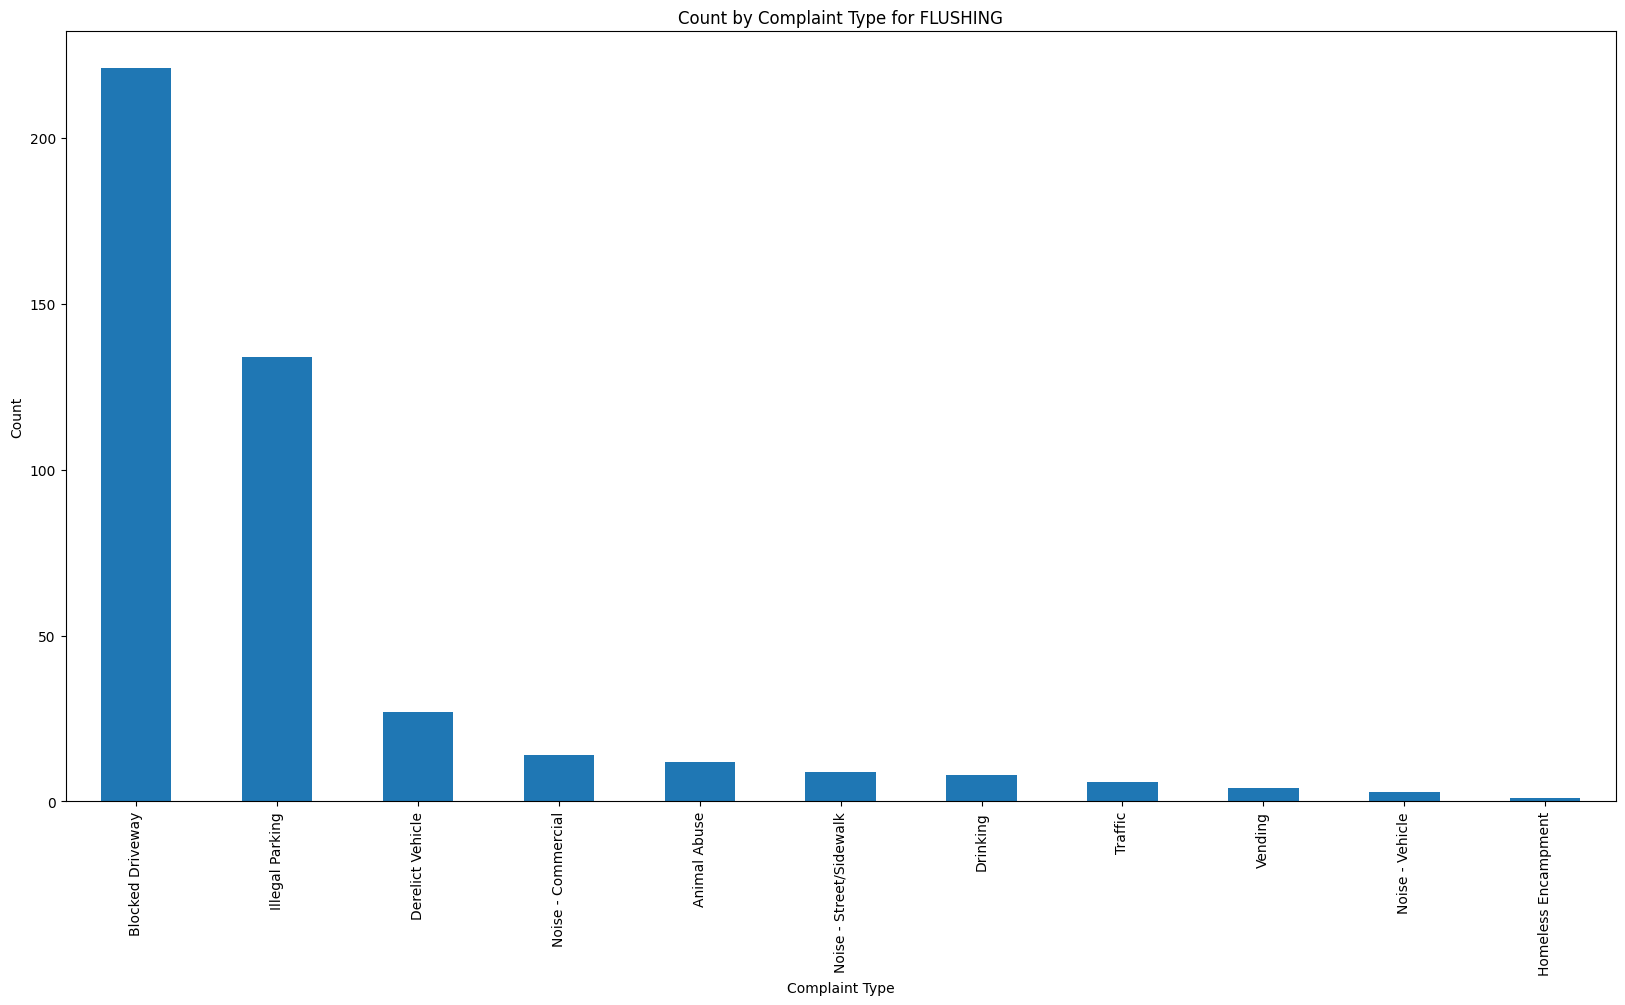

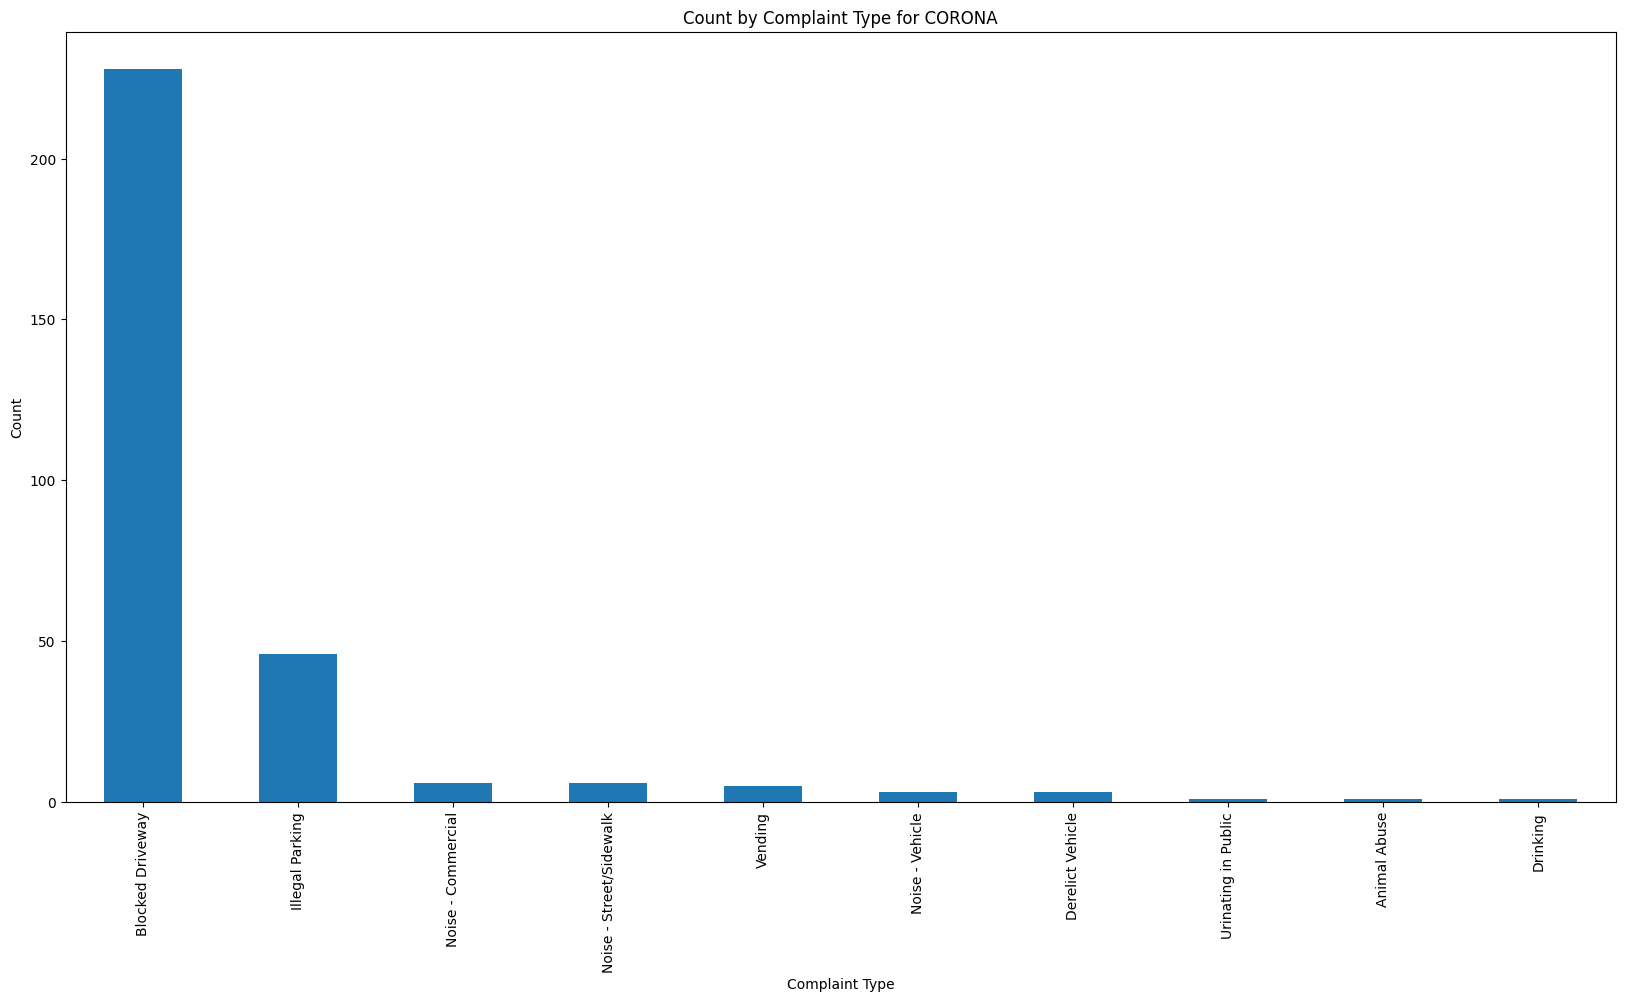

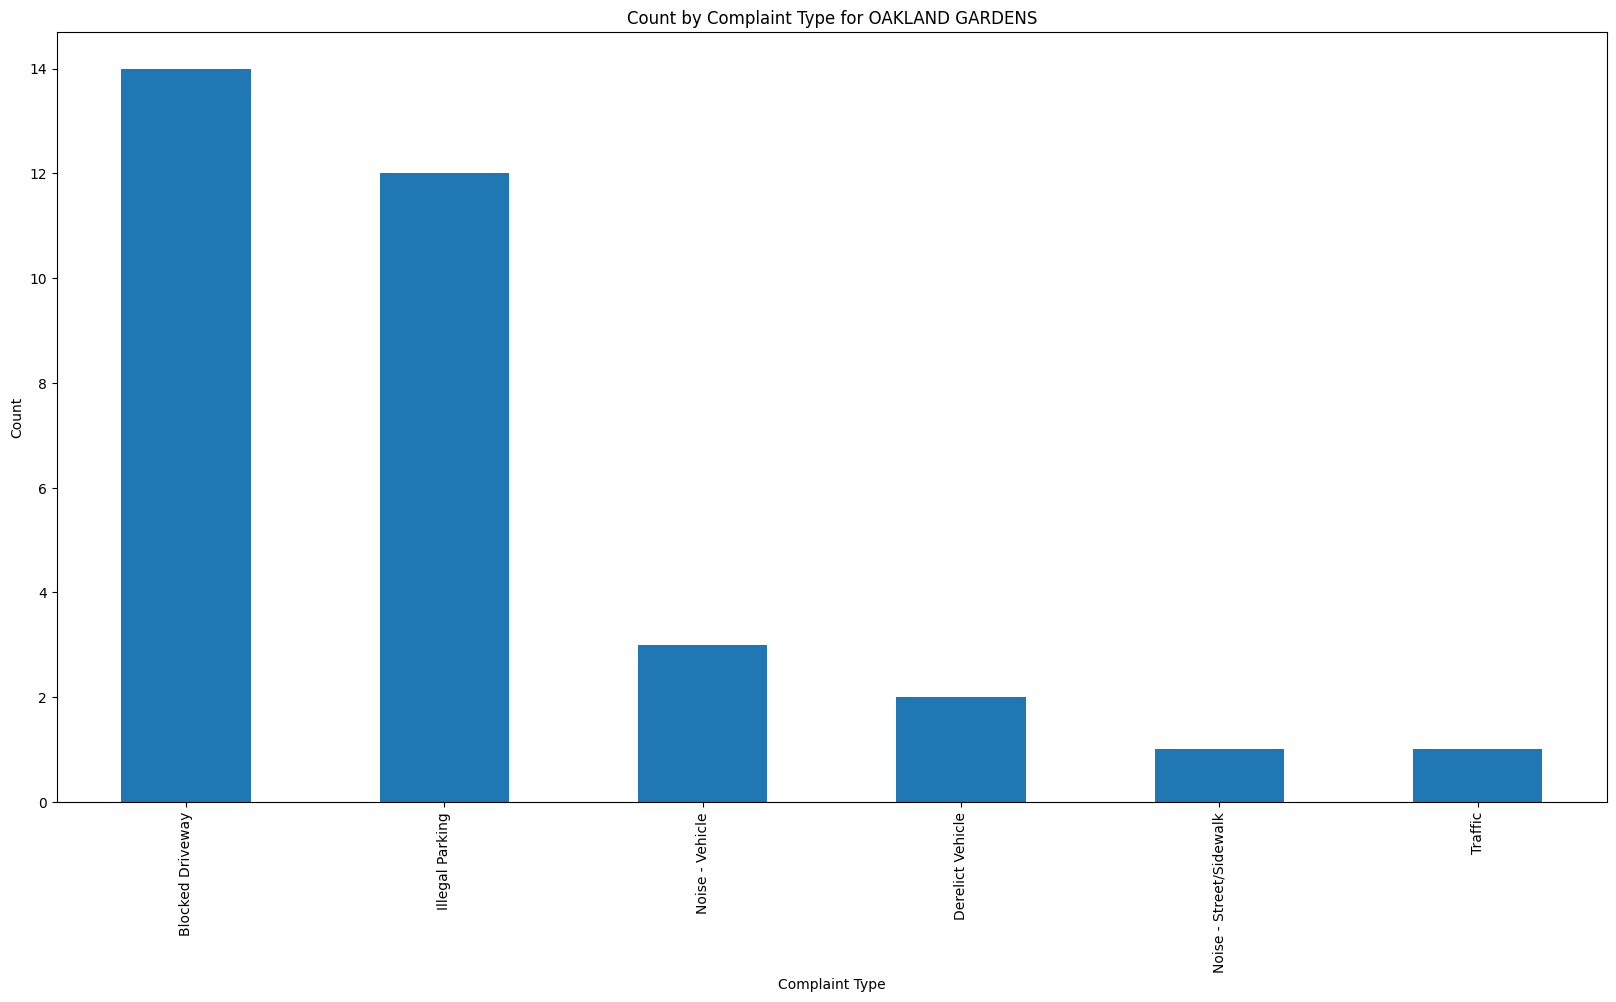

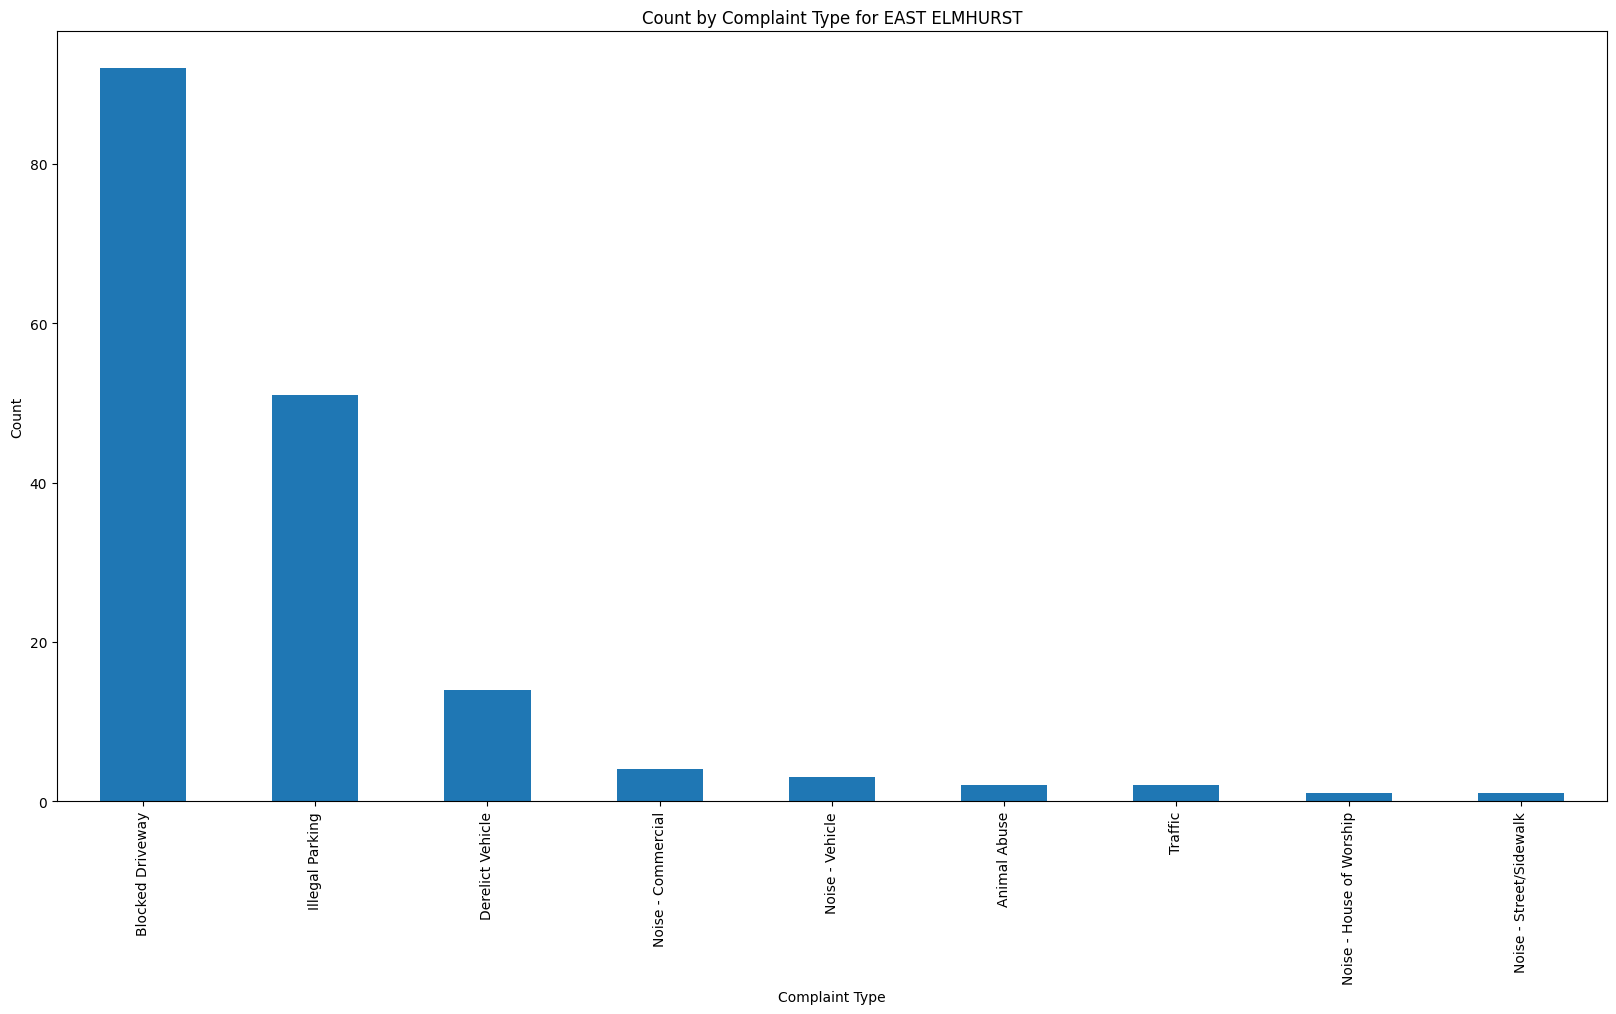

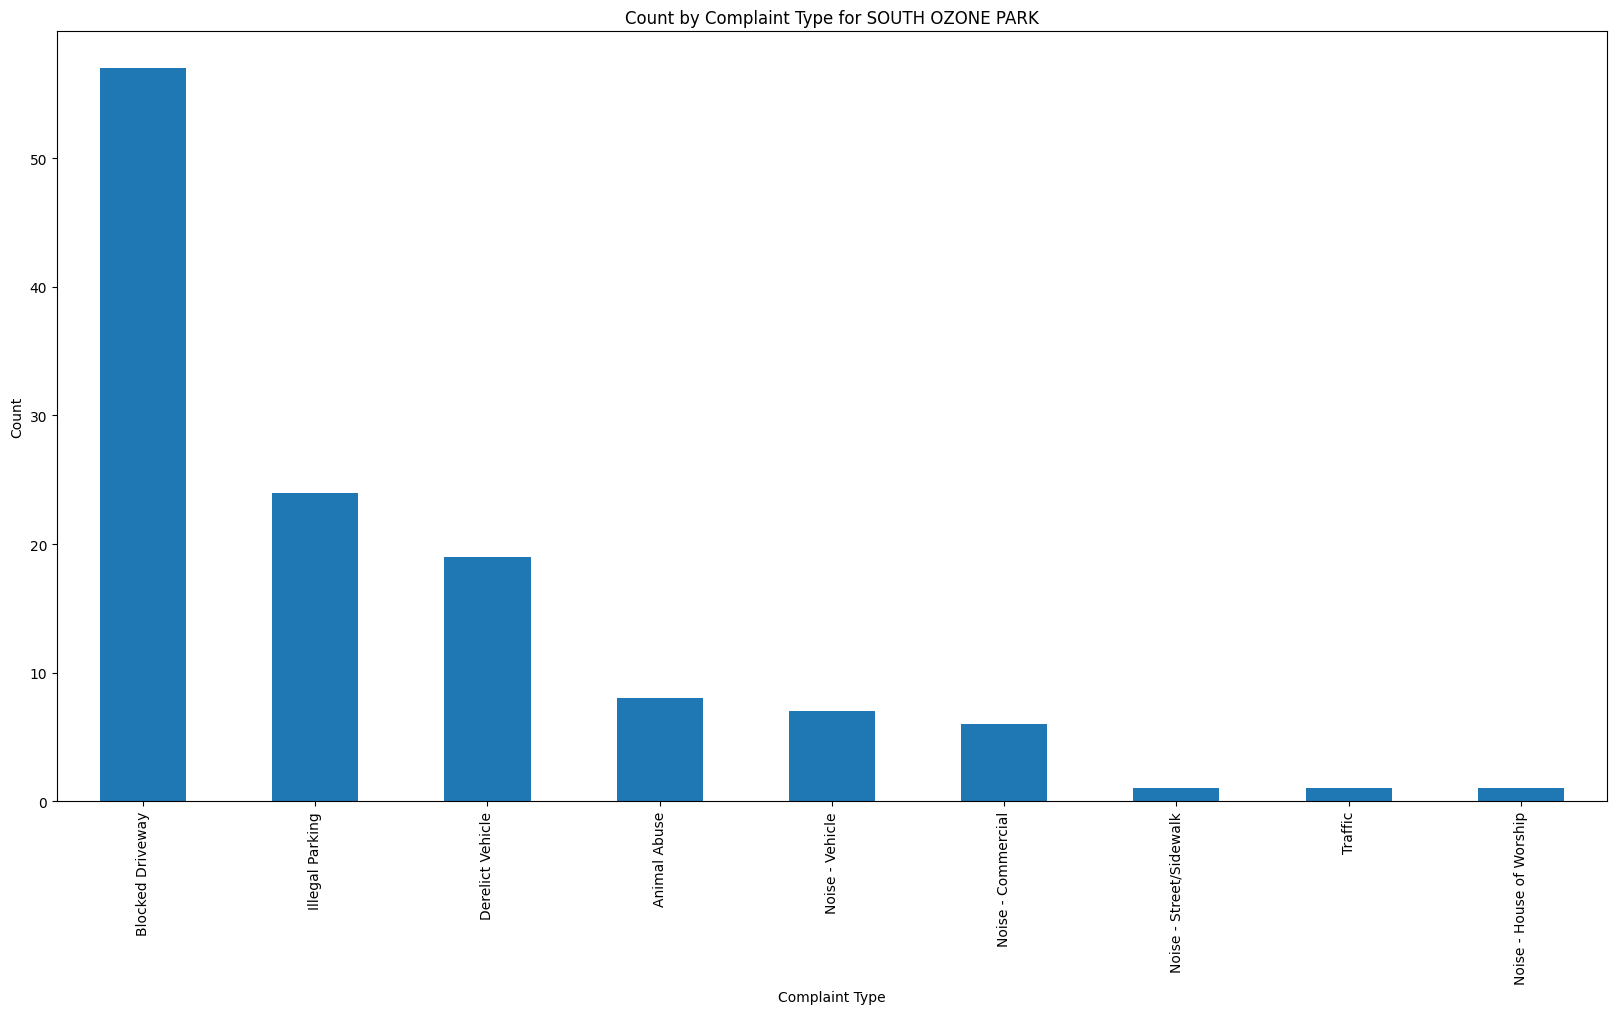

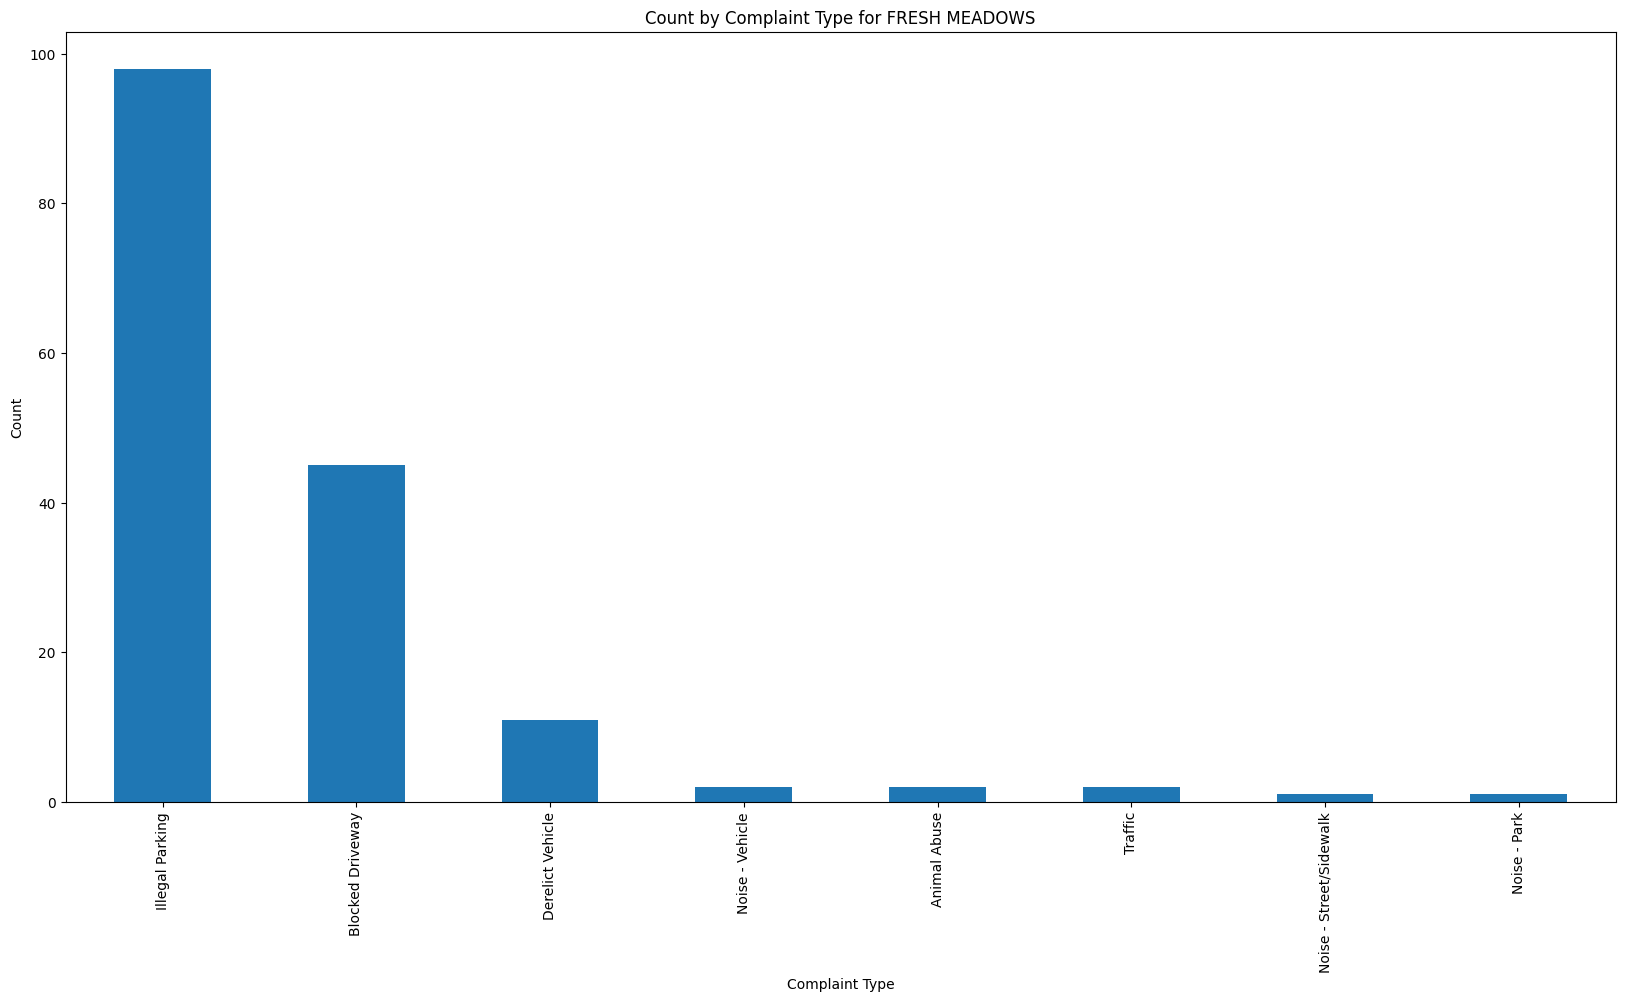

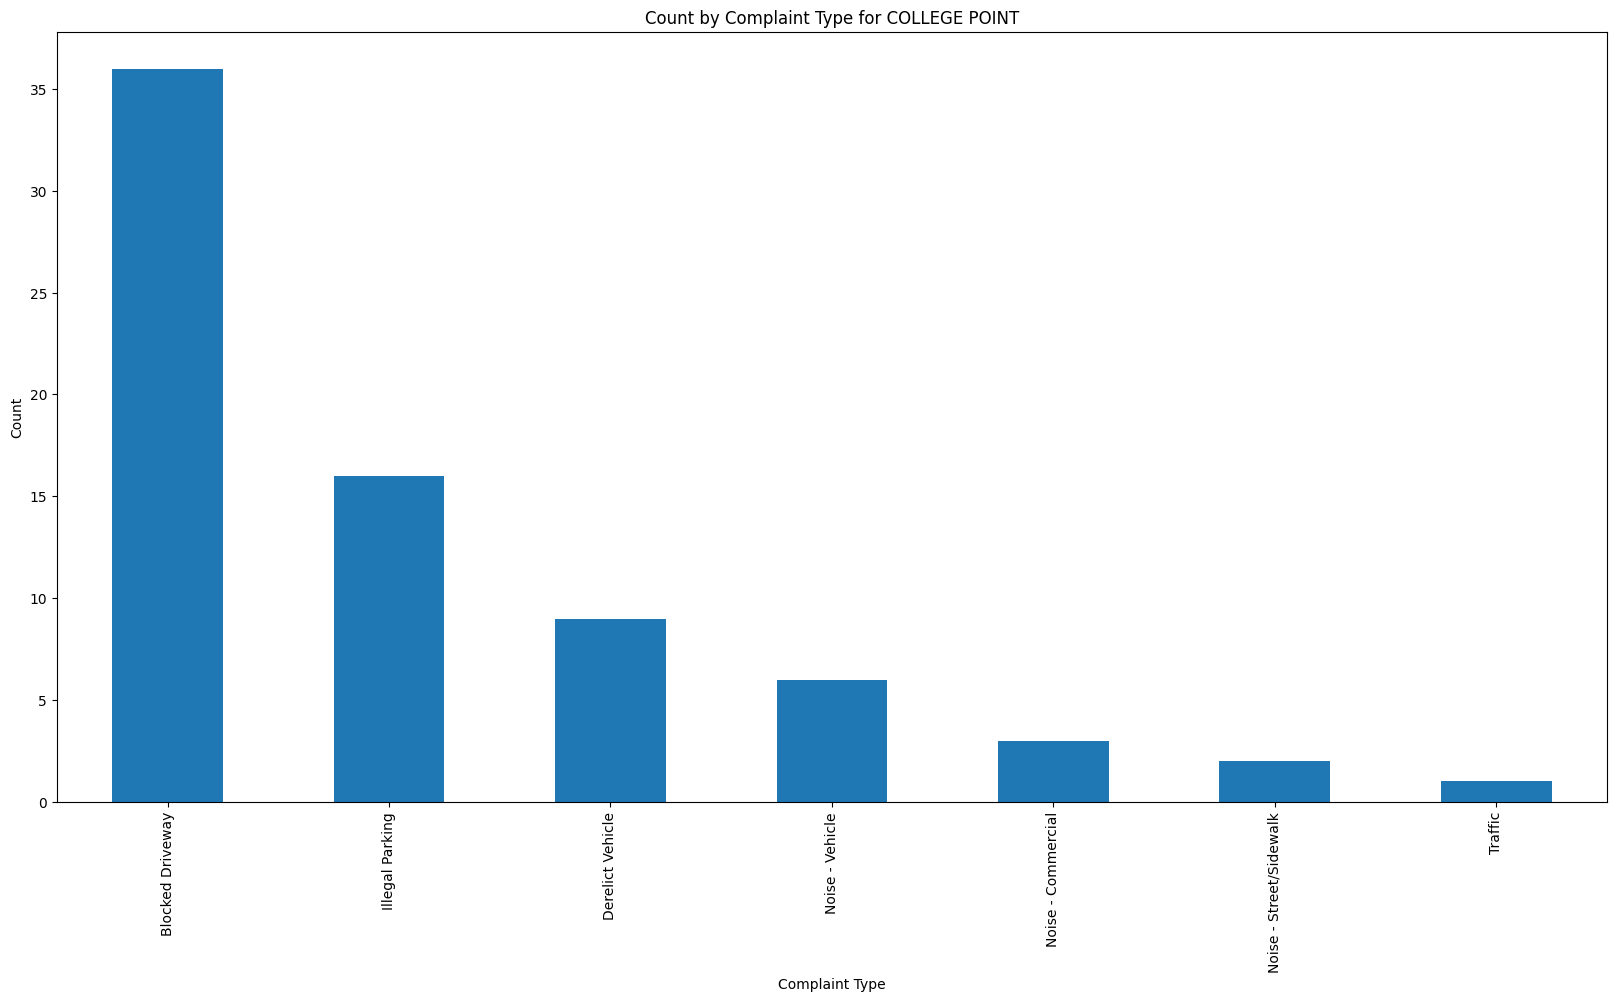

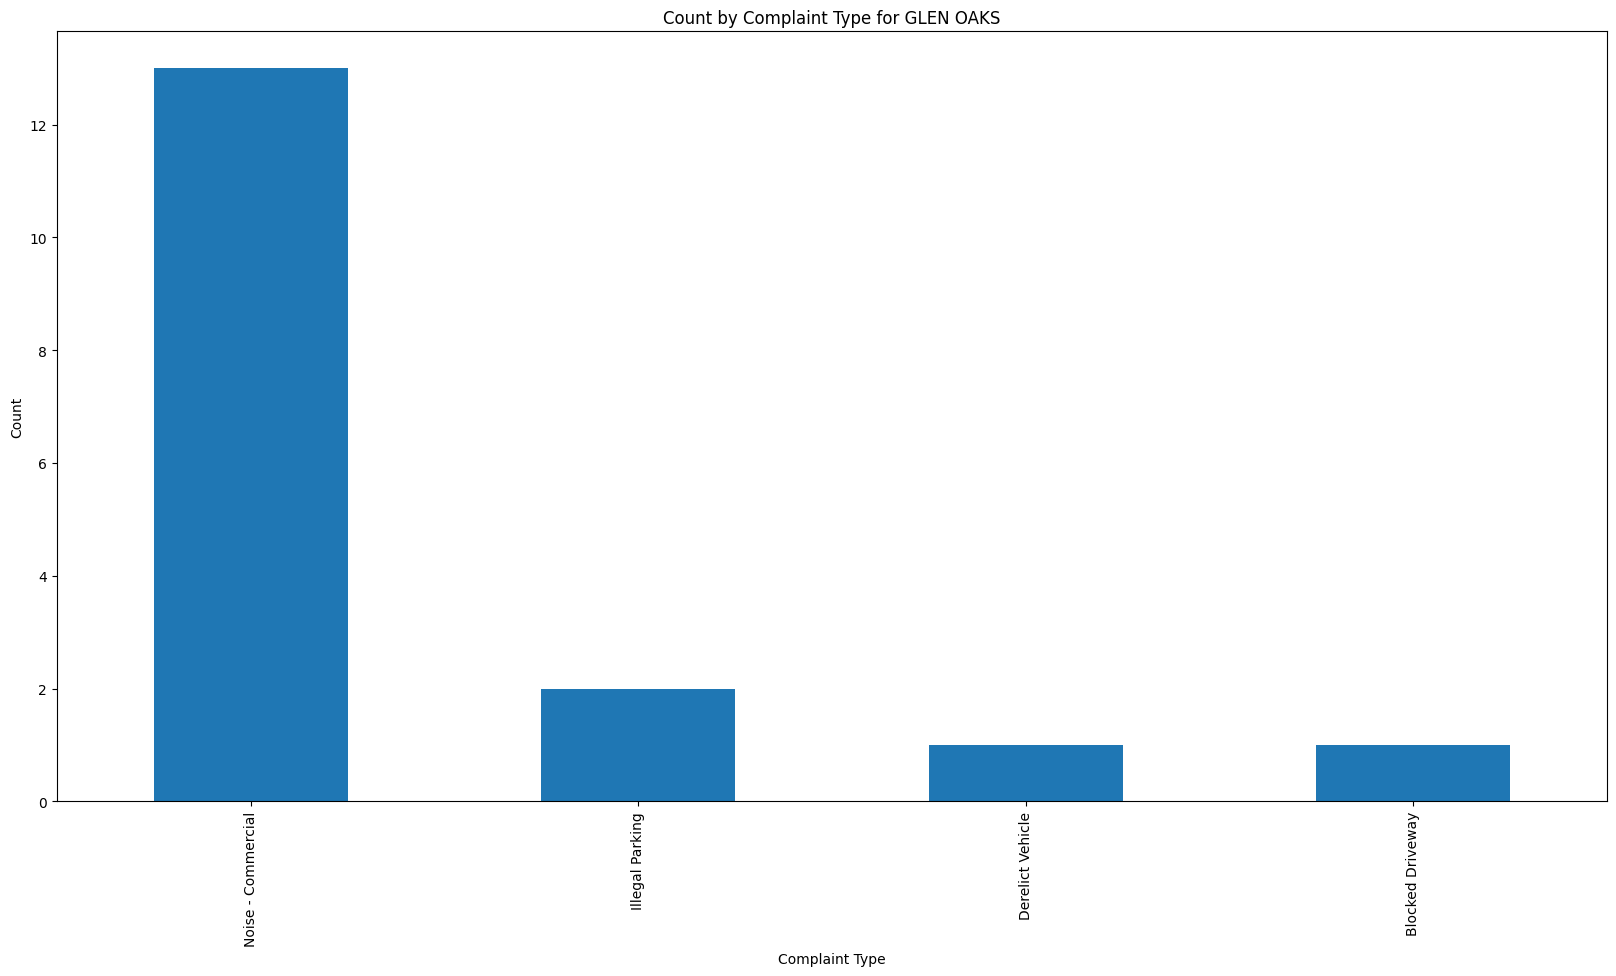

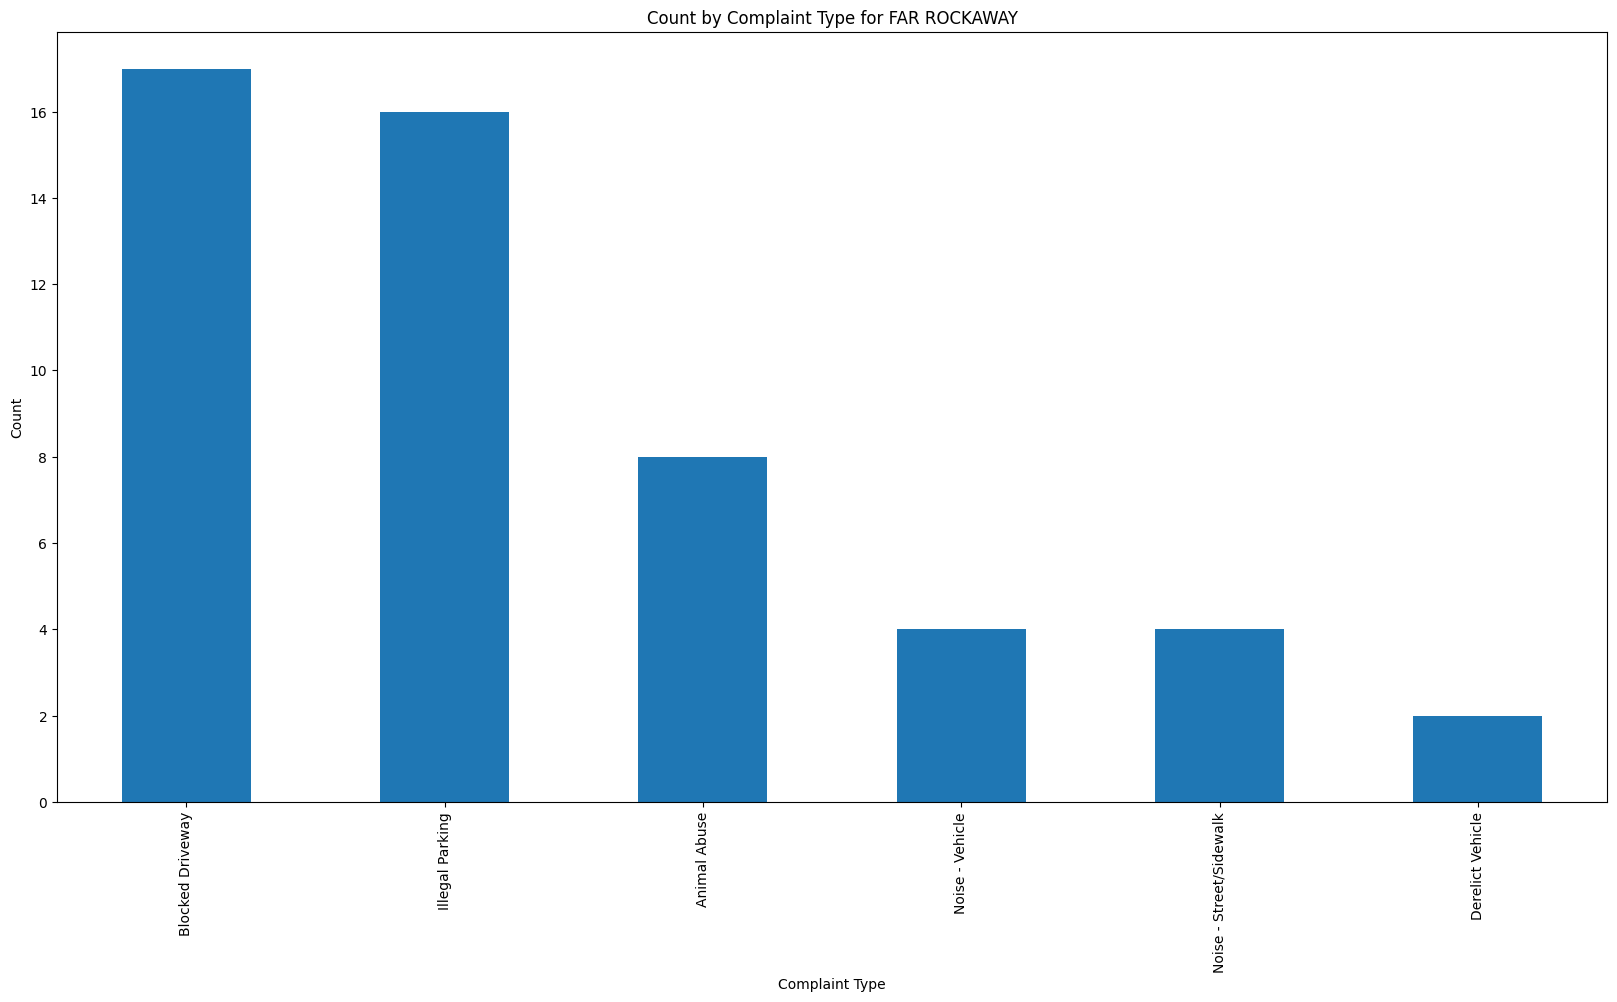

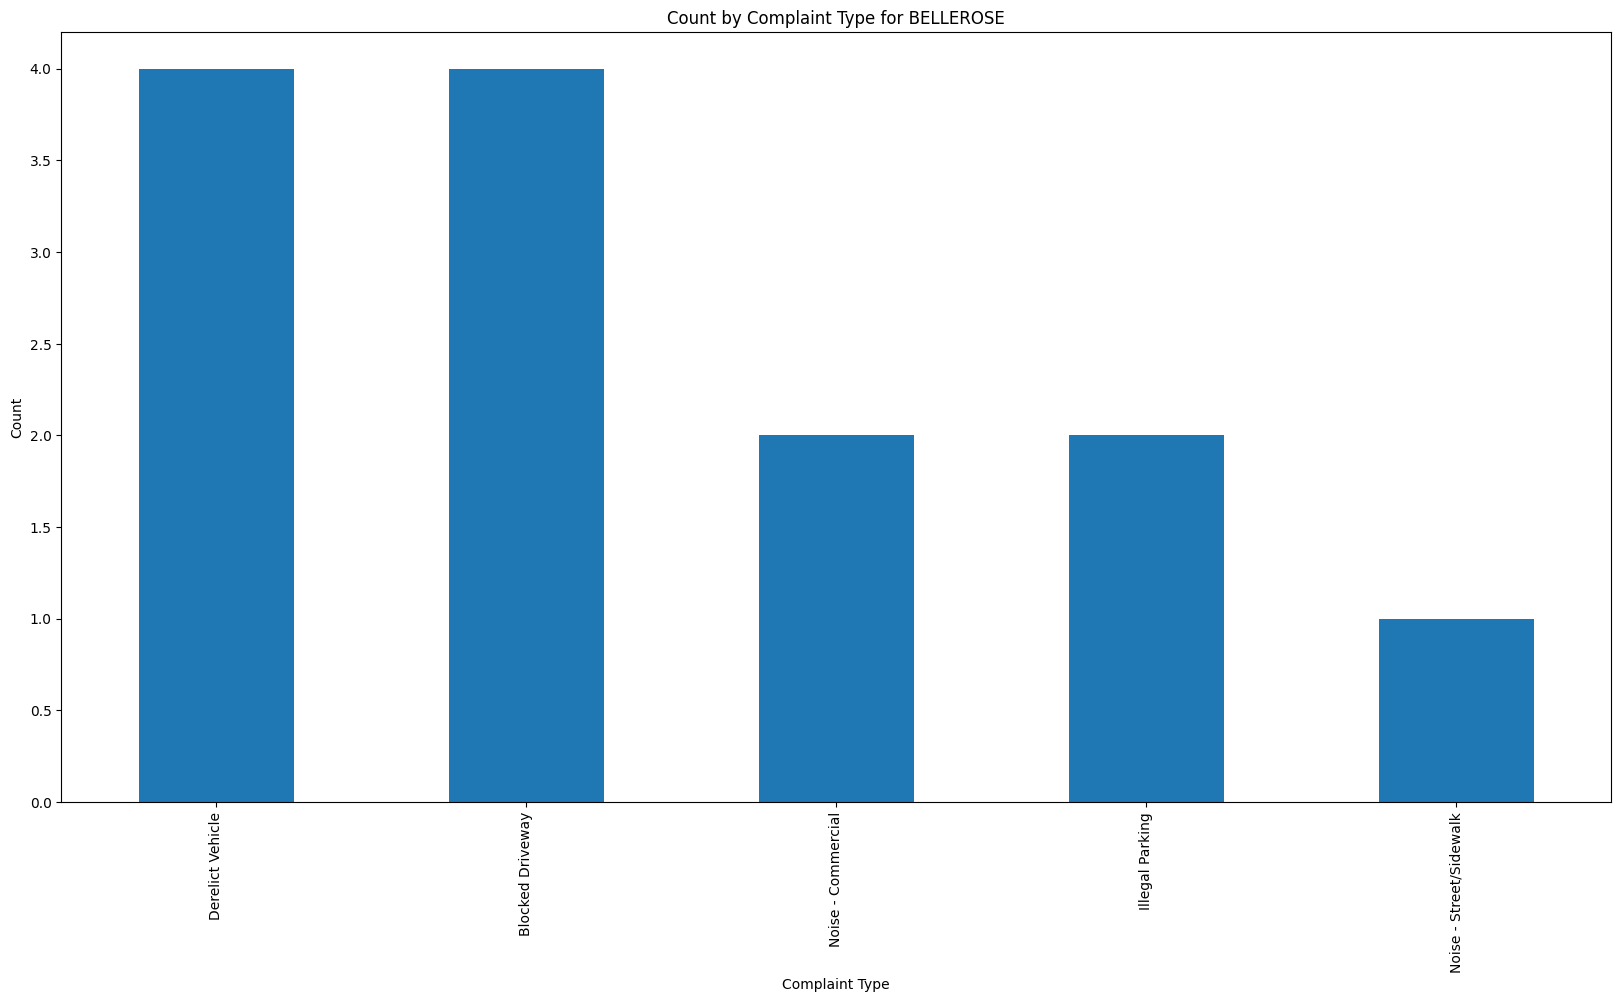

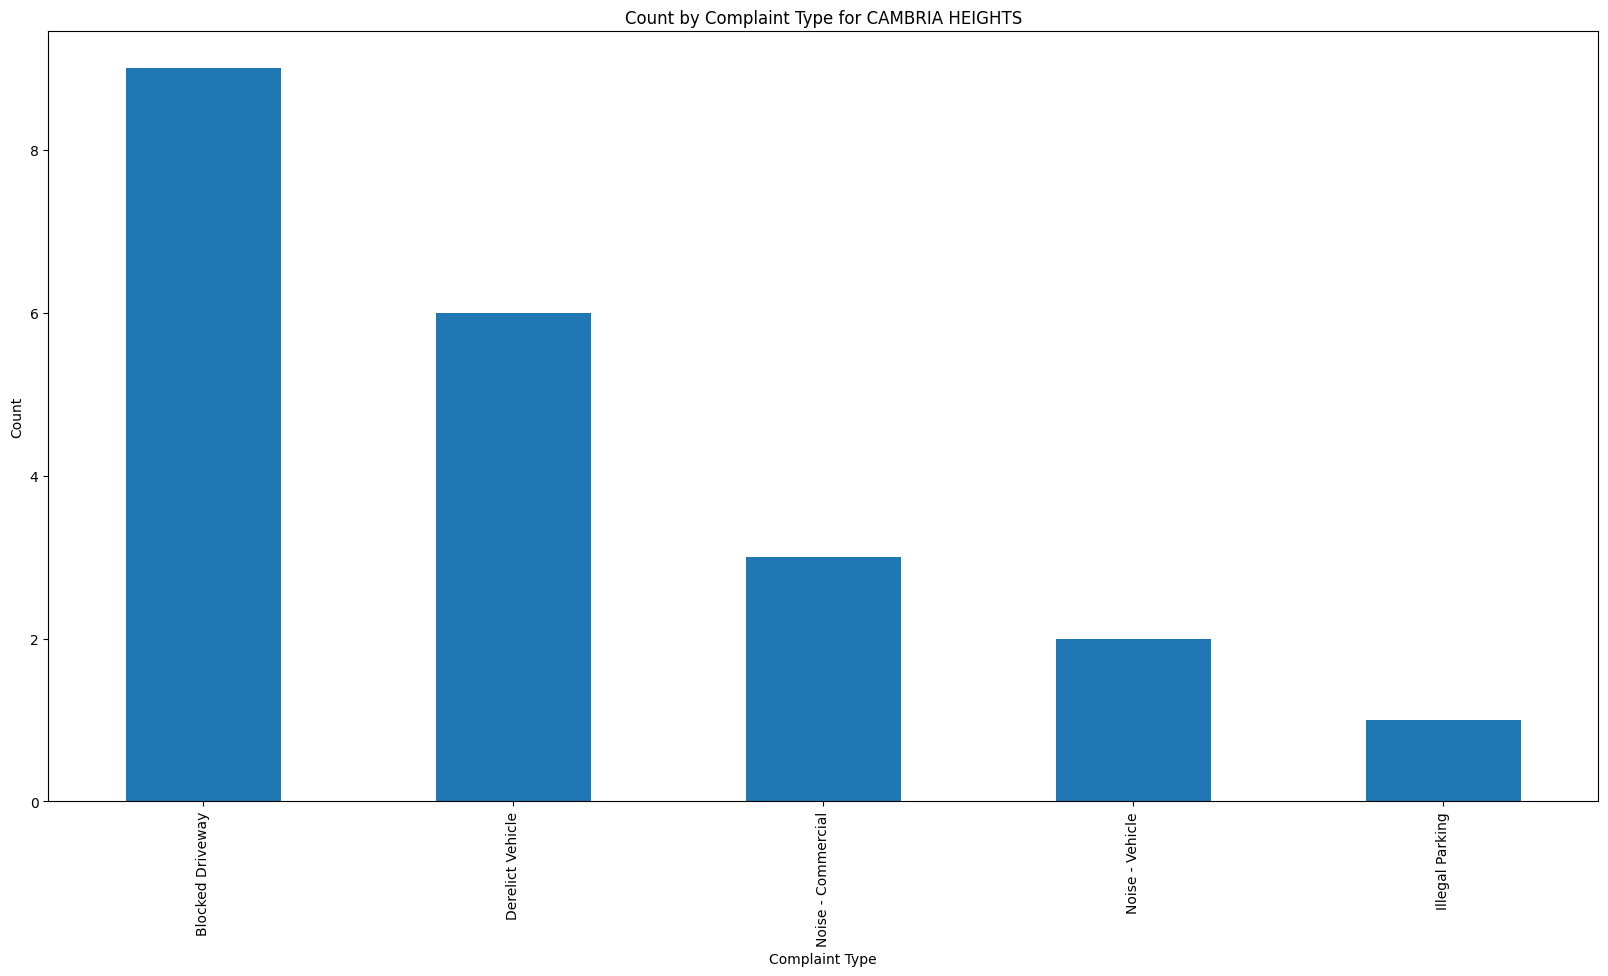

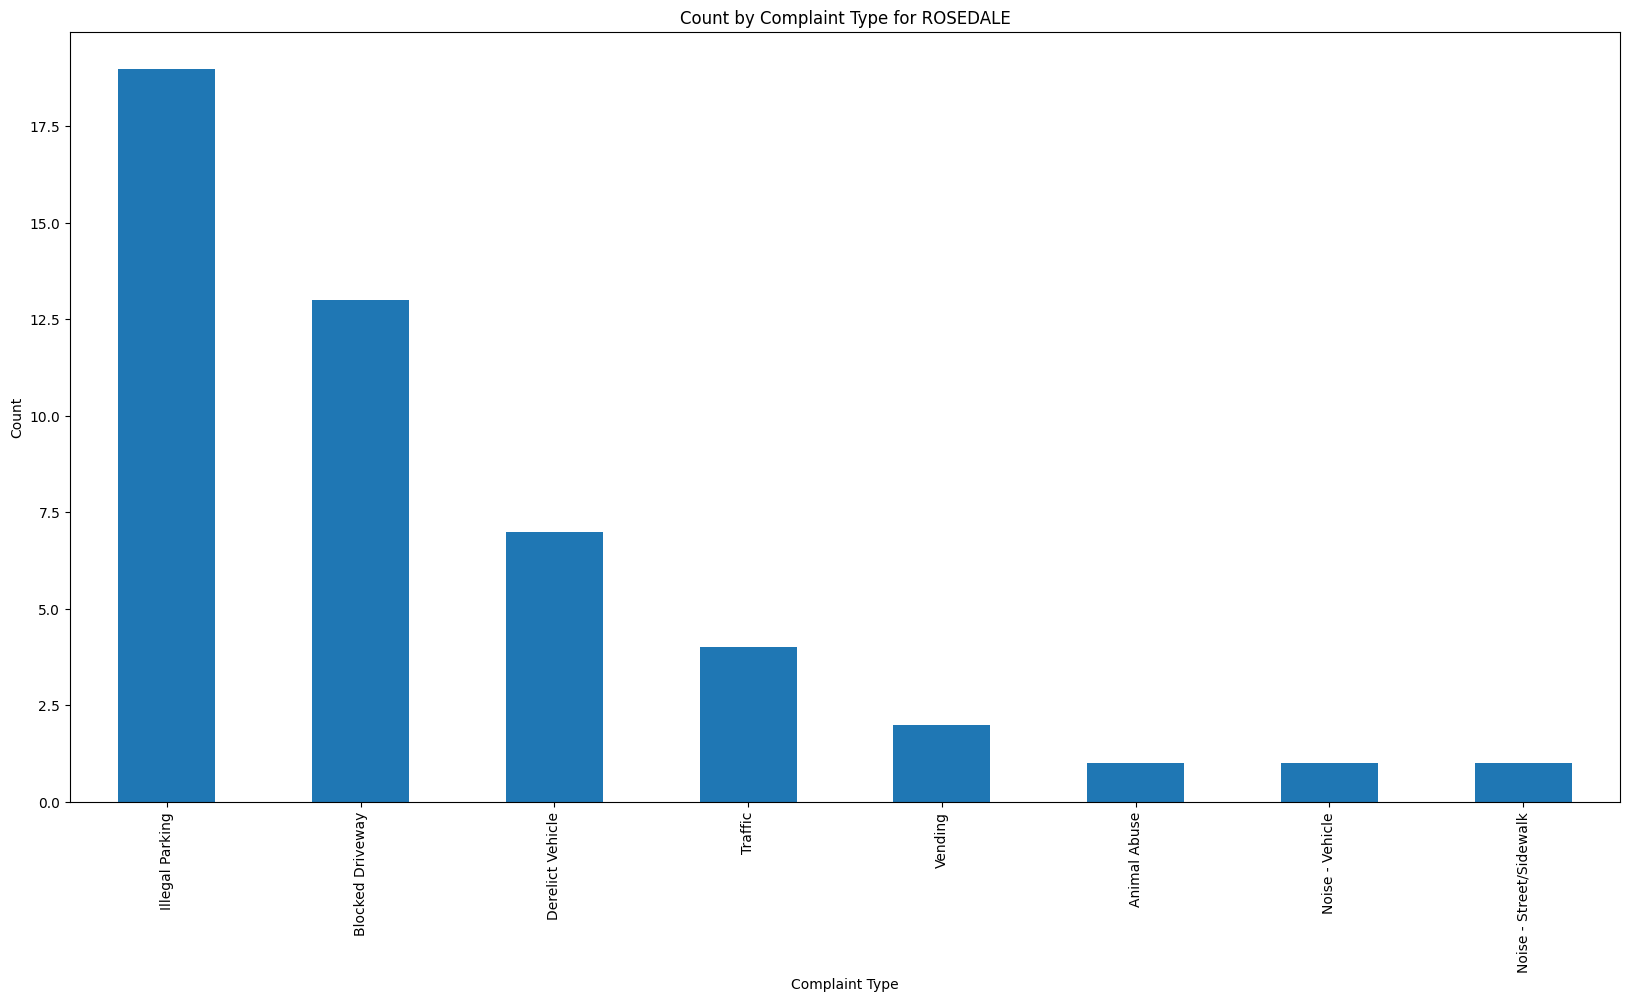

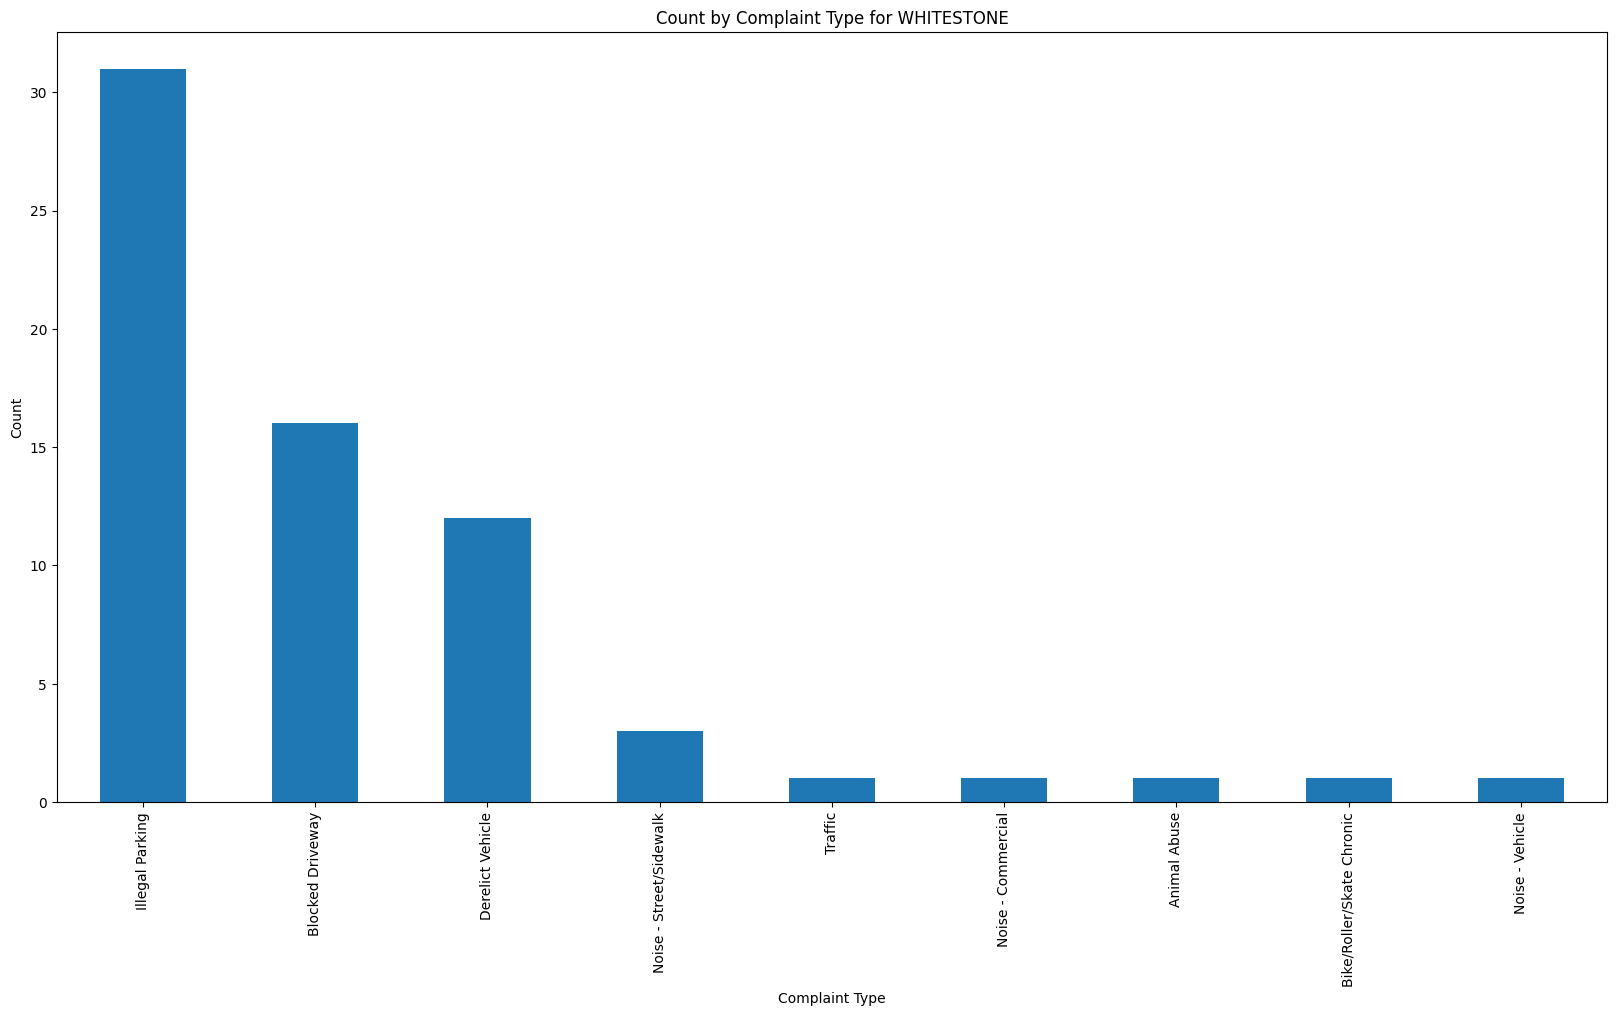

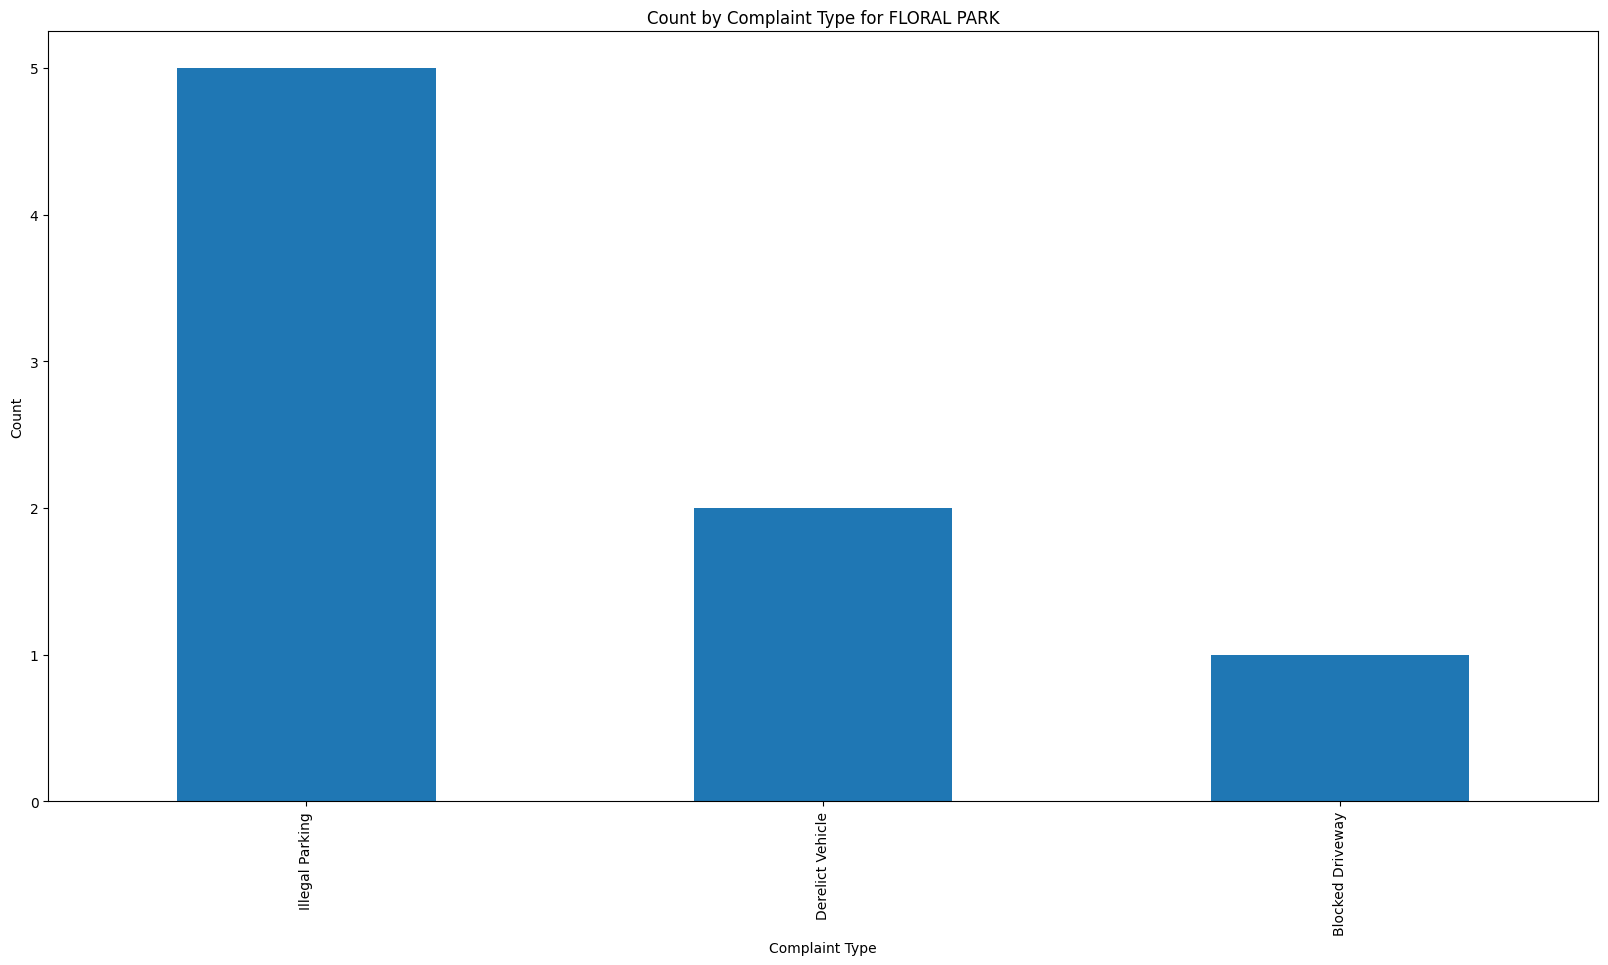

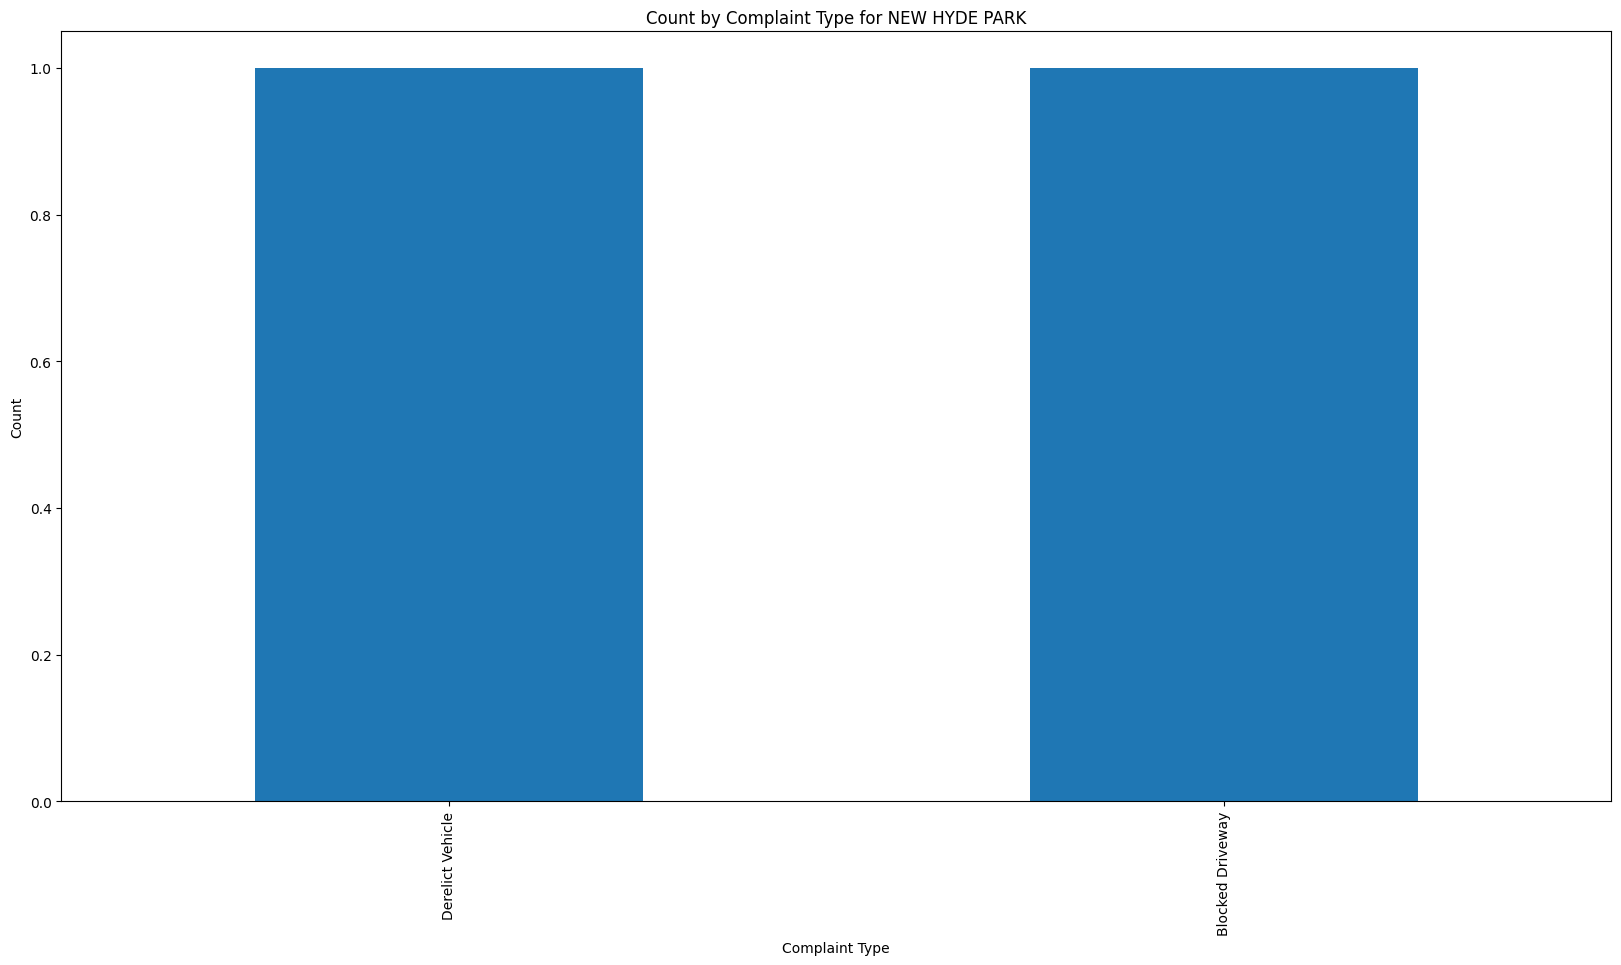

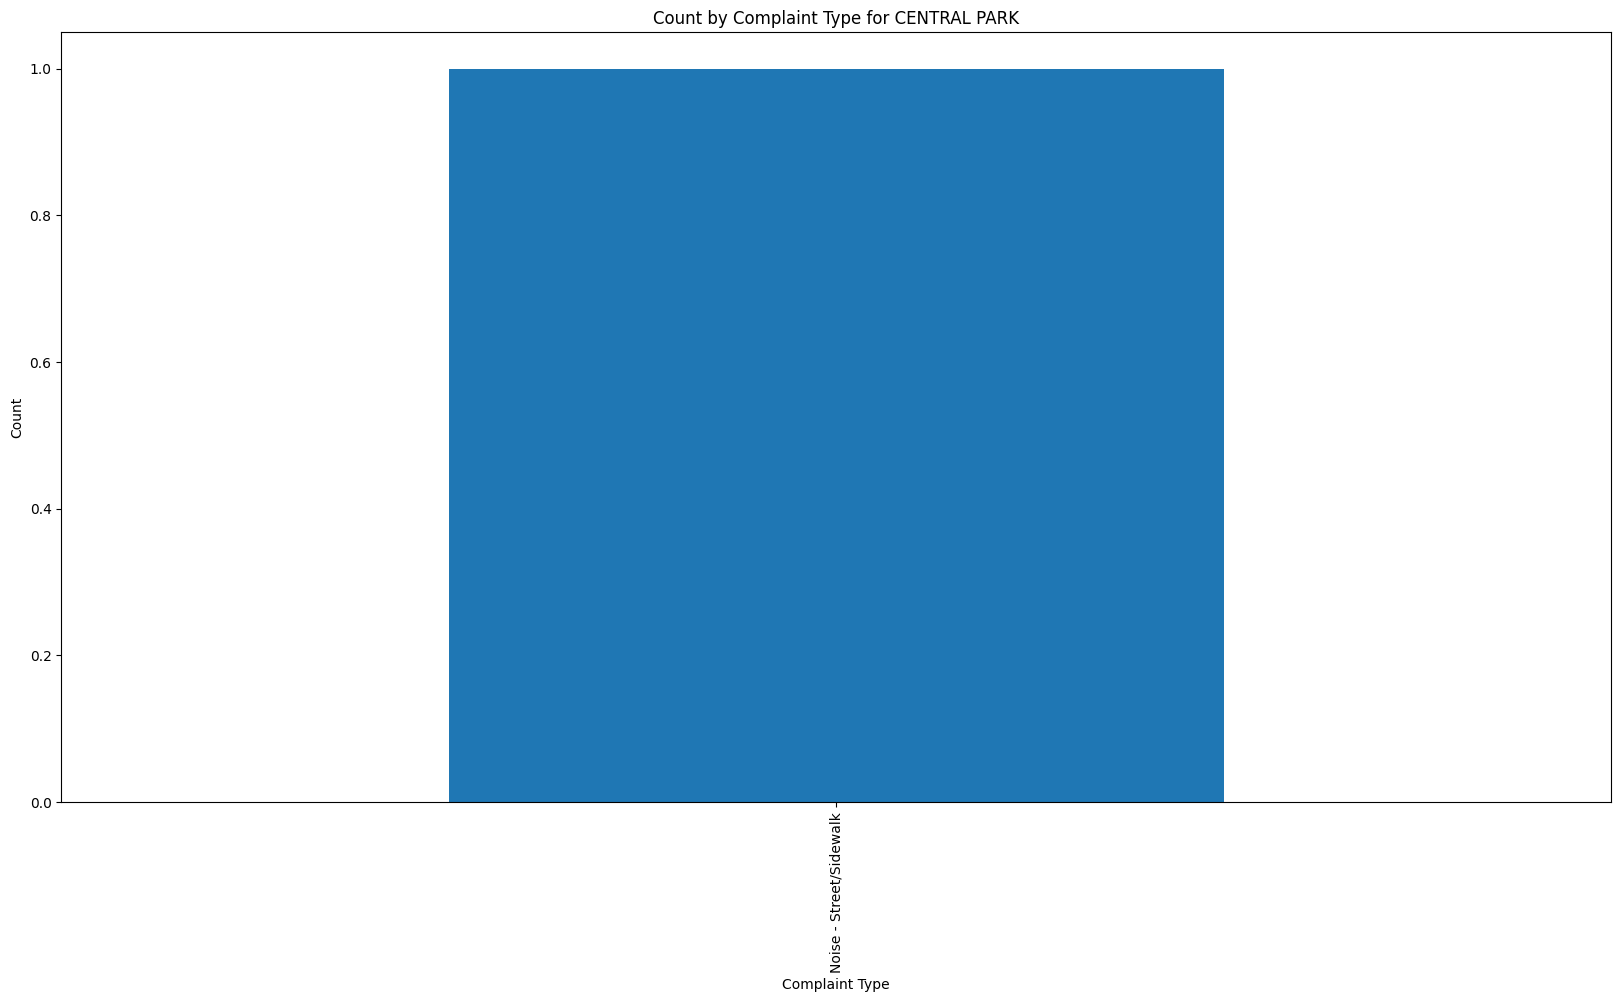

In [46]:
for c in city_list:
    df_c = df.loc[df['City'] == c]
    df_c['Complaint Type'].value_counts().plot(kind ='bar',figsize = (20,10))
    plt.title(f'Count by Complaint Type for %s' %c)
    plt.xlabel('Complaint Type')
    plt.ylabel('Count')
    plt.show()
    print('================================================')


In [47]:
df_new = df[['Complaint Type', 'City']]
df_new

Complaint Type       City
0      Noise - Street/Sidewalk   NEW YORK
1             Blocked Driveway    ASTORIA
2             Blocked Driveway      BRONX
3              Illegal Parking      BRONX
4              Illegal Parking   ELMHURST
...                        ...        ...
17839         Blocked Driveway  WOODHAVEN
17840  Noise - Street/Sidewalk   NEW YORK
17841  Noise - Street/Sidewalk   BROOKLYN
17842          Noise - Vehicle  RIDGEWOOD
17843       Noise - Commercial   WOODSIDE

[17737 rows x 2 columns]

In [48]:
df_new.shape

(17737, 2)

In [49]:
df_new = df_new.set_index('Complaint Type')
df_new

City
Complaint Type                    
Noise - Street/Sidewalk   NEW YORK
Blocked Driveway           ASTORIA
Blocked Driveway             BRONX
Illegal Parking              BRONX
Illegal Parking           ELMHURST
...                            ...
Blocked Driveway         WOODHAVEN
Noise - Street/Sidewalk   NEW YORK
Noise - Street/Sidewalk   BROOKLYN
Noise - Vehicle          RIDGEWOOD
Noise - Commercial        WOODSIDE

[17737 rows x 1 columns]

In [50]:
df_new.shape

(17737, 1)

In [51]:
df_complainttypes=df.groupby(['City','Complaint Type']).size().unstack().fillna(0)
df_complainttypes

Complaint Type       Animal Abuse  Bike/Roller/Skate Chronic  \
City                                                           
ARVERNE                       3.0                        0.0   
ASTORIA                       8.0                        1.0   
BAYSIDE                       2.0                        0.0   
BELLEROSE                     0.0                        0.0   
BRONX                        92.0                        3.0   
BROOKLYN                    137.0                        2.0   
CAMBRIA HEIGHTS               0.0                        0.0   
CENTRAL PARK                  0.0                        0.0   
COLLEGE POINT                 0.0                        0.0   
CORONA                        1.0                        0.0   
EAST ELMHURST                 2.0                        0.0   
ELMHURST                      1.0                        0.0   
FAR ROCKAWAY                  8.0                        0.0   
FLORAL PARK                   0.0                        0.0   
FLUSHING                     12.0                        0.0   
FOREST HILLS                  7.0                        0.0   
FRESH MEADOWS                 2.0                        0.0   
GLEN OAKS                     0.0                        0.0   
HOLLIS                        0.0                        0.0   
HOWARD BEACH                  4.0                        0.0   
JACKSON HEIGHTS               0.0                        0.0   
JAMAICA                      17.0                        0.0   
KEW GARDENS                   1.0                        0.0   
LITTLE NECK                   1.0                        0.0   
LONG ISLAND CITY              0.0                        0.0   
MASPETH                       0.0                        0.0   
MIDDLE VILLAGE                4.0                        0.0   
NEW HYDE PARK                 0.0                        0.0   
NEW YORK                     94.0                        6.0   
OAKLAND GARDENS               0.0                        0.0   
OZONE PARK                    4.0                        0.0   
QUEENS VILLAGE                1.0                        0.0   
REGO PARK                     0.0                        0.0   
RICHMOND HILL                 2.0                        0.0   
RIDGEWOOD                     8.0                        0.0   
ROCKAWAY PARK                 7.0                        0.0   
ROSEDALE                      1.0                        0.0   
SAINT ALBANS                  1.0                        0.0   
SOUTH OZONE PARK              8.0                        0.0   
SOUTH RICHMOND HILL           0.0                        0.0   
SPRINGFIELD GARDENS           1.0                        0.0   
STATEN ISLAND                30.0                        1.0   
SUNNYSIDE                     0.0                        0.0   
Unknown City                  0.0                        0.0   
WHITESTONE                    1.0                        1.0   
WOODHAVEN                     6.0                        0.0   
WOODSIDE                      5.0                        1.0   

Complaint Type       Blocked Driveway  Derelict Vehicle  Disorderly Youth  \
City                                                                        
ARVERNE                           2.0               4.0               0.0   
ASTORIA                         190.0              18.0               0.0   
BAYSIDE                          23.0               9.0               0.0   
BELLEROSE                         4.0               4.0               0.0   
BRONX                           963.0             121.0               1.0   
BROOKLYN                       2126.0             379.0               1.0   
CAMBRIA HEIGHTS                   9.0               6.0               0.0   
CENTRAL PARK                      0.0               0.0               0.0   
COLLEGE POINT                    36.0               9.0               0.0   
CORONA          

Text(0.5, 1.0, 'Number of complaints vs. City')

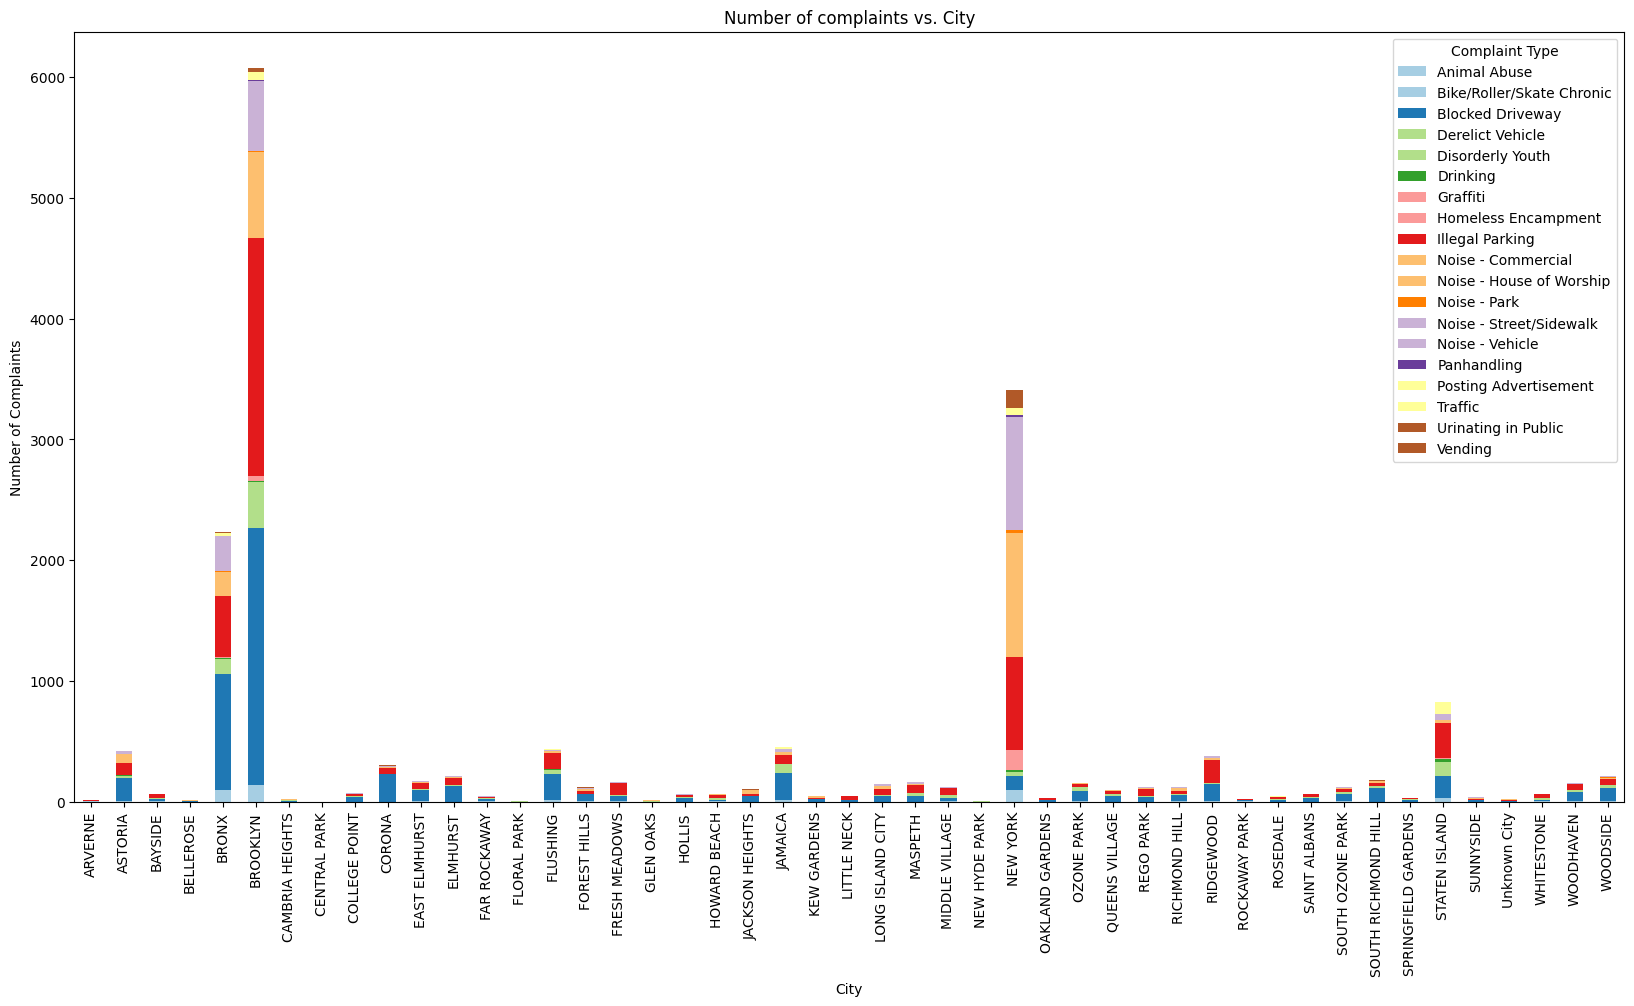

In [52]:
df_complainttypes.plot(kind='bar',figsize=(20,10),stacked = True,colormap='Paired')
plt.ylabel('Number of Complaints')
plt.title('Number of complaints vs. City')

In [53]:
df['elapsed_time'] = df['closed_dt']-df['created_dt']
df['elapsed_time_sec'] = df['elapsed_time']/np.timedelta64(1,'s')
df['elapsed_time_sec']

0         3330.0
1         5233.0
2        17494.0
3        27927.0
4        12464.0
          ...   
17839    11178.0
17840    27763.0
17841    14555.0
17842    14116.0
17843    21717.0
Name: elapsed_time_sec, Length: 17737, dtype: float64

In [54]:
df['elapsed_time_sec'].describe()

count     17737.000000
mean      16528.369172
std       25535.485949
min         171.000000
25%        4841.000000
50%       10027.000000
75%       19638.000000
max      804132.000000
Name: elapsed_time_sec, dtype: float64

In [55]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df['elapsed_time_sec'].describe()

count    17737.000
mean     16528.369
std      25535.486
min        171.000
25%       4841.000
50%      10027.000
75%      19638.000
max     804132.000
Name: elapsed_time_sec, dtype: float64

**Complaint types based on the average Request_Closing_Time**

In [56]:
locations = df['Location'].unique()
locations

array(['(40.86568153633767, -73.92350095571744)',
       '(40.775945312321085, -73.91509393898605)',
       '(40.870324522111424, -73.88852464418646)', ...,
       '(40.69173700627507, -73.8620377948848)',
       '(40.69618859110066, -73.94221711868975)',
       '(40.706906642274014, -73.90467879234053)'], dtype=object)

In [57]:
city_list

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'Unknown City',
       'RIDGEWOOD', 'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND',
       'OZONE PARK', 'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK'], dtype=object)

In [58]:
df_groupby_city = df.groupby(['City','Complaint Type'])['elapsed_time_sec'].mean()
df_groupby_location = df.groupby(['Location','Complaint Type'])['elapsed_time_sec'].mean()

In [59]:
df_groupby_city.unstack()

Complaint Type       Animal Abuse  Bike/Roller/Skate Chronic  \
City                                                           
ARVERNE                  7059.333                        NaN   
ASTORIA                  8148.875                   5101.000   
BAYSIDE                  9952.500                        NaN   
BELLEROSE                     NaN                        NaN   
BRONX                   35270.087                  14226.667   
BROOKLYN                17456.774                  29644.000   
CAMBRIA HEIGHTS               NaN                        NaN   
CENTRAL PARK                  NaN                        NaN   
COLLEGE POINT                 NaN                        NaN   
CORONA                  32455.000                        NaN   
EAST ELMHURST           13196.000                        NaN   
ELMHURST                13595.000                        NaN   
FAR ROCKAWAY             6789.125                        NaN   
FLORAL PARK                   NaN                        NaN   
FLUSHING                16204.417                        NaN   
FOREST HILLS            11475.000                        NaN   
FRESH MEADOWS            6504.500                        NaN   
GLEN OAKS                     NaN                        NaN   
HOLLIS                        NaN                        NaN   
HOWARD BEACH            24227.750                        NaN   
JACKSON HEIGHTS               NaN                        NaN   
JAMAICA                 23976.529                        NaN   
KEW GARDENS              4206.000                        NaN   
LITTLE NECK              7054.000                        NaN   
LONG ISLAND CITY              NaN                        NaN   
MASPETH                       NaN                        NaN   
MIDDLE VILLAGE          17131.750                        NaN   
NEW HYDE PARK                 NaN                        NaN   
NEW YORK                14300.287                   6430.167   
OAKLAND GARDENS               NaN                        NaN   
OZONE PARK              11149.000                        NaN   
QUEENS VILLAGE           1570.000                        NaN   
REGO PARK                     NaN                        NaN   
RICHMOND HILL            8105.500                        NaN   
RIDGEWOOD               31732.625                        NaN   
ROCKAWAY PARK            8108.857                        NaN   
ROSEDALE                36936.000                        NaN   
SAINT ALBANS            15696.000                        NaN   
SOUTH OZONE PARK         9510.875                        NaN   
SOUTH RICHMOND HILL           NaN                        NaN   
SPRINGFIELD GARDENS      8927.000                        NaN   
STATEN ISLAND           12905.333                  12634.000   
SUNNYSIDE                     NaN                        NaN   
Unknown City                  NaN                        NaN   
WHITESTONE               4610.000                   5123.000   
WOODHAVEN               38185.000                        NaN   
WOODSIDE                22993.800                  40677.000   

Complaint Type       Blocked Driveway  Derelict Vehicle  Disorderly Youth  \
City                                                                        
ARVERNE                      6019.500         18559.500               NaN   
ASTORIA                     16234.868         15658.556               NaN   
BAYSIDE                     10399.478         10221.556               NaN   
BELLEROSE                    3763.250         72589.250               NaN   
BRONX                       26373.726         36677.008          2345.000   
BROOKLYN                    17603.182         29606.934          6849.000   
CAMBRIA HEIGHTS             25747.667         33868.500               NaN   
CENTRAL PARK                      NaN               NaN               NaN   
COLLEGE POINT               12639.000          4968.444               NaN   
CORONA          

In [60]:
df_groupby_location

Location                                 Complaint Type  
(40.50127930227959, -74.24042187057385)  Illegal Parking    28092.000
(40.50150020015795, -74.24499287548733)  Derelict Vehicle   18009.000
(40.50302866584165, -74.24773850760648)  Animal Abuse       10305.000
(40.50325068524659, -74.24013769473197)  Blocked Driveway    3436.000
(40.50770107009008, -74.25493722035226)  Derelict Vehicle   24969.000
                                                               ...   
(40.90961195436544, -73.89739478194504)  Illegal Parking     9491.000
(40.90961770054067, -73.89768419946479)  Illegal Parking    10220.000
(40.90981580490694, -73.90139941674128)  Derelict Vehicle   19440.000
(40.91006118467869, -73.89949606151733)  Illegal Parking    20549.500
(40.91045209047415, -73.89769376844279)  Illegal Parking     1736.500
Name: elapsed_time_sec, Length: 12834, dtype: float64

**average response time across vs complaint types**

In [61]:
df['elapsed_time_min'] = df['elapsed_time']/np.timedelta64(1,'m')
df_mrt=df.groupby('Complaint Type')['elapsed_time_min'].mean().fillna(0).to_frame()
df_mrt

elapsed_time_min
Complaint Type                             
Animal Abuse                        330.229
Bike/Roller/Skate Chronic           226.760
Blocked Driveway                    304.974
Derelict Vehicle                    475.876
Disorderly Youth                    113.090
Drinking                            350.663
Graffiti                            249.461
Homeless Encampment                 263.358
Illegal Parking                     266.561
Noise - Commercial                  186.597
Noise - House of Worship            123.632
Noise - Park                        277.858
Noise - Street/Sidewalk             216.363
Noise - Vehicle                     227.295
Panhandling                         226.933
Posting Advertisement                60.450
Traffic                             232.950
Urinating in Public                 131.355
Vending                             206.806

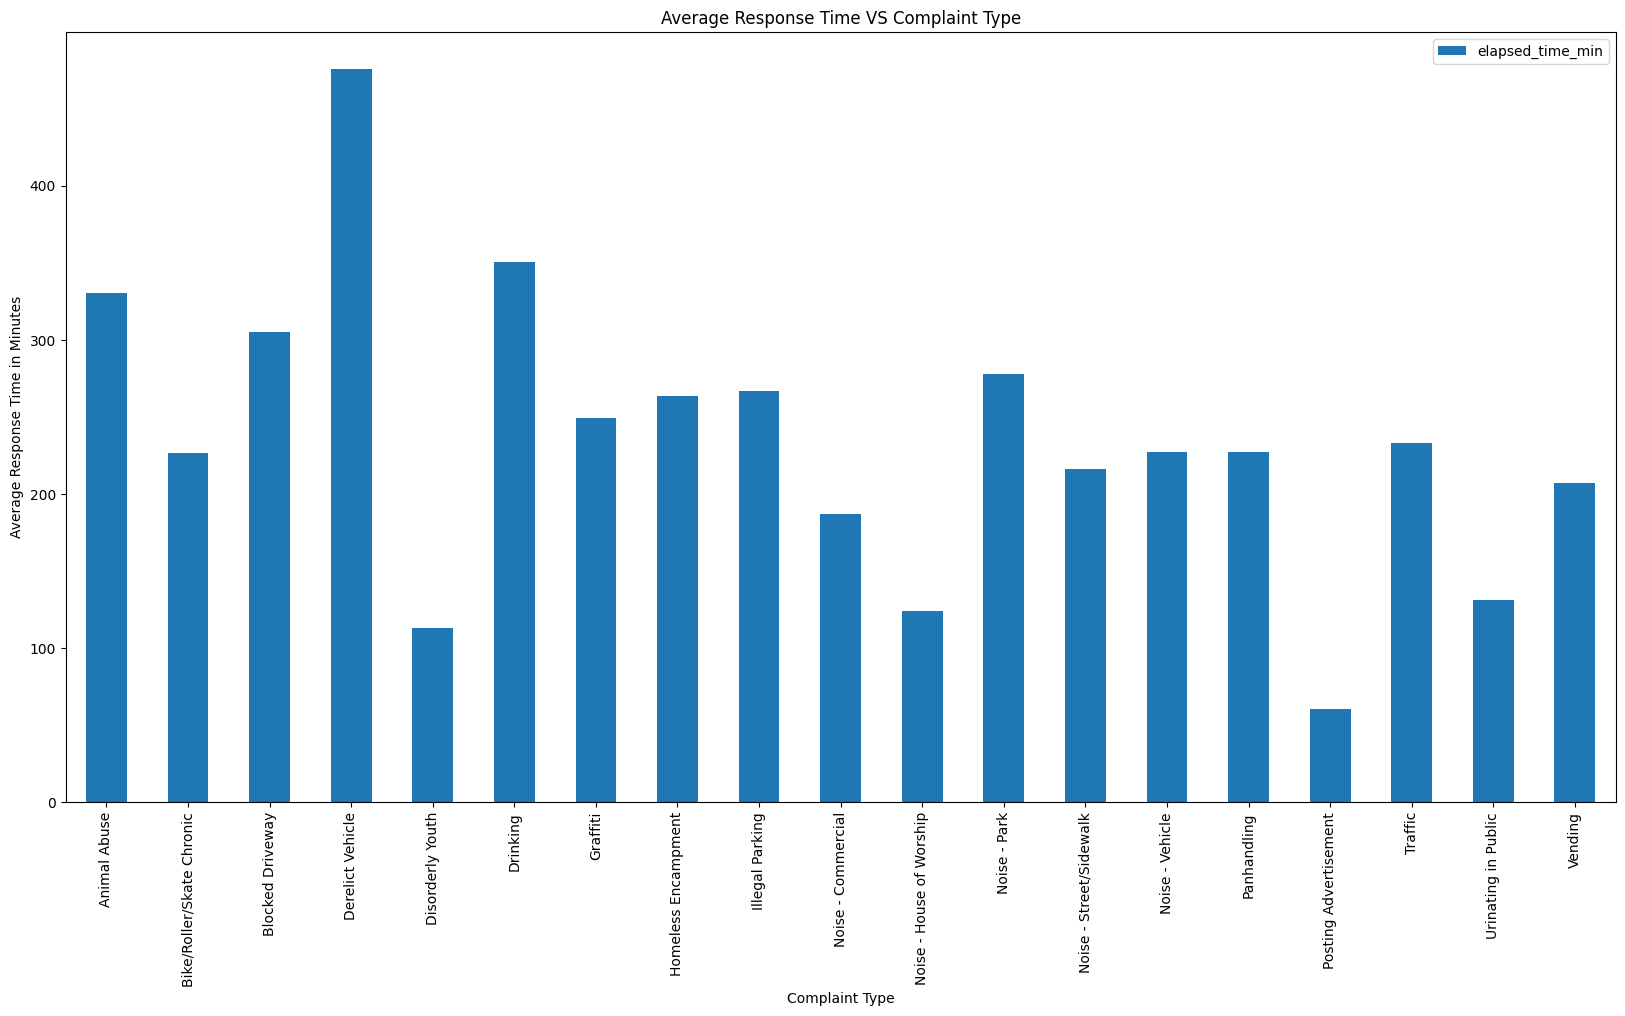

In [62]:
df_mrt.plot(kind='bar',figsize=(20,10))
plt.title('Average Response Time VS Complaint Type')
plt.xlabel('Complaint Type')
plt.ylabel('Average Response Time in Minutes')
plt.show()

In [63]:
df[df['Complaint Type'] == 'Animal in a Park']

Empty DataFrame
Columns: [Unique Key, Created Date, Closed Date, Agency, Agency Name, Complaint Type, Descriptor, Location Type, Incident Zip, Incident Address, Street Name, Cross Street 1, Cross Street 2, Intersection Street 1, Intersection Street 2, Address Type, City, Landmark, Facility Type, Status, Due Date, Resolution Description, Resolution Action Updated Date, Community Board, Borough, X Coordinate (State Plane), Y Coordinate (State Plane), Park Facility Name, Park Borough, School Name, School Number, School Region, School Code, School Phone Number, School Address, School City, School State, School Zip, School Not Found, Bridge Highway Name, Bridge Highway Direction, Road Ramp, Bridge Highway Segment, Latitude, Longitude, Location, created_dt, closed_dt, elapsed_time, elapsed_time_sec, elapsed_time_min]
Index: []

[0 rows x 51 columns]

**Dropping this row as there is only one entry for Complaint Type "Animal in Park" which is too high**

In [65]:
df.drop(labels=283132, axis=0, inplace=True)
# df[df['Complaint Type'] == 'Animal in a Park']

KeyError: '[283132] not found in axis'

In [66]:
df_mrt=df.groupby('Complaint Type')['elapsed_time_min'].mean().fillna(0).to_frame()
df_mrt

elapsed_time_min
Complaint Type                             
Animal Abuse                        330.229
Bike/Roller/Skate Chronic           226.760
Blocked Driveway                    304.974
Derelict Vehicle                    475.876
Disorderly Youth                    113.090
Drinking                            350.663
Graffiti                            249.461
Homeless Encampment                 263.358
Illegal Parking                     266.561
Noise - Commercial                  186.597
Noise - House of Worship            123.632
Noise - Park                        277.858
Noise - Street/Sidewalk             216.363
Noise - Vehicle                     227.295
Panhandling                         226.933
Posting Advertisement                60.450
Traffic                             232.950
Urinating in Public                 131.355
Vending                             206.806

In [67]:
df_mrt.plot(kind='bar', figsize=(20, 10))
plt.title('Average Response Time by Complaint Type')
plt.xlabel('Complaint Type')
plt.ylabel('Average Response Time in minutes')
plt.show()

In [68]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location', 'created_dt', 'closed_dt',
       'elapsed_time', 'elapsed_time_sec', 'elapsed_time_min'],
  

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17737 entries, 0 to 17843
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   Unique Key                      17737 non-null  int64          
 1   Created Date                    17737 non-null  object         
 2   Closed Date                     17737 non-null  object         
 3   Agency                          17737 non-null  object         
 4   Agency Name                     17737 non-null  object         
 5   Complaint Type                  17737 non-null  object         
 6   Descriptor                      17453 non-null  object         
 7   Location Type                   17737 non-null  object         
 8   Incident Zip                    17715 non-null  float64        
 9   Incident Address                15778 non-null  object         
 10  Street Name                     15778 non-null  object         

In [70]:
# df['Ferry Direction'].head

KeyError: 'Ferry Direction'

In [ ]:
df = df.drop('Ferry Direction', axis=1)  # Drop columns with 0 non-null values
df = df.drop('Ferry Terminal Name', axis=1)

In [71]:
columns_with_same_values = df.columns[df.nunique() == 1]    #Find columns with same values
print(columns_with_same_values)

Index(['Agency', 'Agency Name', 'Facility Type', 'Status',
       'Park Facility Name', 'School Name', 'School Number', 'School Region',
       'School Code', 'School Phone Number', 'School Address', 'School City',
       'School State', 'School Zip', 'School Not Found'],
      dtype='object')


In [72]:
# drop all columns with same values
for c in columns_with_same_values:
    df = df.drop(c, axis=1)
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Borough', 'Bridge Highway Name', 'Bridge Highway Direction',
       'Road Ramp', 'Bridge Highway Segment', 'Latitude', 'Longitude',
       'Location', 'created_dt', 'closed_dt', 'elapsed_time',
       'elapsed_time_sec', 'elapsed_time_min'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17737 entries, 0 to 17843
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   Unique Key                      17737 non-null  int64          
 1   Created Date                    17737 non-null  object         
 2   Closed Date                     17737 non-null  object         
 3   Complaint Type                  17737 non-null  object         
 4   Descriptor                      17453 non-null  object         
 5   Location Type                   17737 non-null  object         
 6   Incident Zip                    17715 non-null  float64        
 7   Incident Address                15778 non-null  object         
 8   Street Name                     15778 non-null  object         
 9   Cross Street 1                  15590 non-null  object         
 10  Cross Street 2                  15585 non-null  object         

In [75]:
# df.Status.unique()

In [ ]:
df[df['Status'] != 'Closed']['Status']

175920        Open
175921       Draft
175922        Open
175923        Open
175925        Open
            ...   
176148    Assigned
176232    Assigned
176249    Assigned
176254    Assigned
176261    Assigned
Name: Status, Length: 63, dtype: object

In [76]:
# print(df.loc[[176148]])

KeyError: "None of [Index([176148], dtype='int64')] are in the [index]"

In [77]:
df['Closed Date'].isna().any()

np.False_

In [78]:
df['Created Date'].isna().any()

np.False_

In [79]:
df['elapsed_time_min'].isna().any()

np.False_

In [80]:
df['Cross Street 1'].head()

0     ACADEMY STREET
1          27 STREET
2    EAST 198 STREET
3      EDISON AVENUE
4     SEABURY STREET
Name: Cross Street 1, dtype: object

In [81]:
df['Due Date'].head()

0    01/01/2016 07:59:45 AM
1    01/01/2016 07:59:44 AM
2    01/01/2016 07:59:29 AM
3    01/01/2016 07:57:46 AM
4    01/01/2016 07:56:58 AM
Name: Due Date, dtype: object

In [82]:
df['Borough'].head()

0    MANHATTAN
1       QUEENS
2        BRONX
3        BRONX
4       QUEENS
Name: Borough, dtype: object

In [84]:
# df['Agency Name'].head()

In [ ]:
df[df['Agency Name'] != 'New York City Police Department']['Agency Name'].head()

175921                       NYPD
186023    Internal Affairs Bureau
187856    Internal Affairs Bureau
207251    Internal Affairs Bureau
239986    Internal Affairs Bureau
Name: Agency Name, dtype: object

In [ ]:
df['Agency Name'].unique()

array(['New York City Police Department', 'NYPD',
       'Internal Affairs Bureau'], dtype=object)

In [87]:
df['Location Type'].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot'], dtype=object)

In [86]:
df['Borough'].unique()

array(['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', 'Unspecified',
       'STATEN ISLAND', nan], dtype=object)

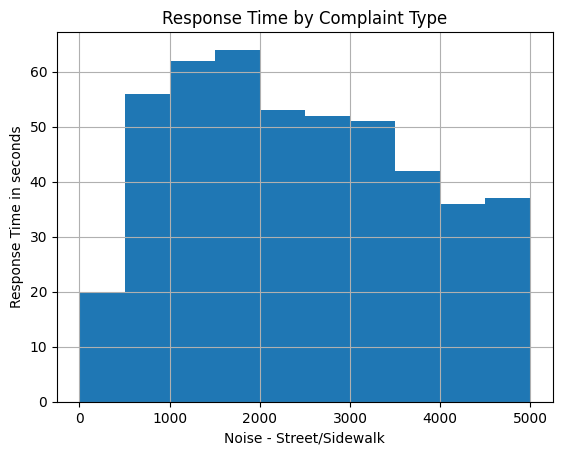

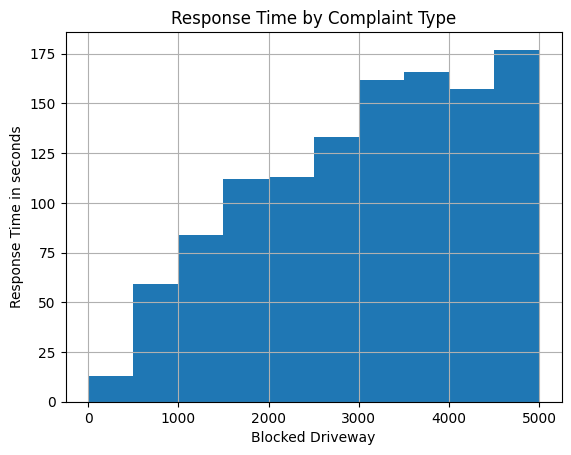

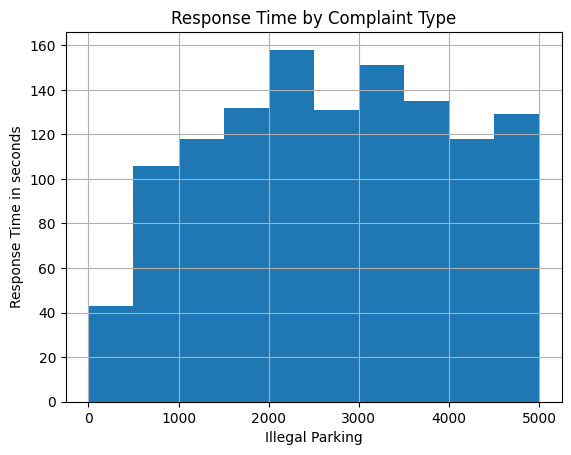

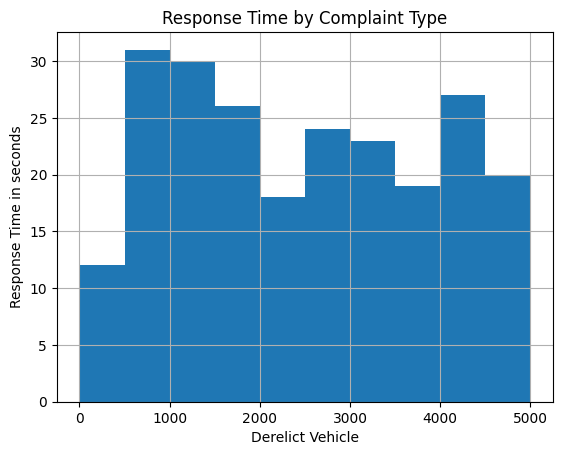

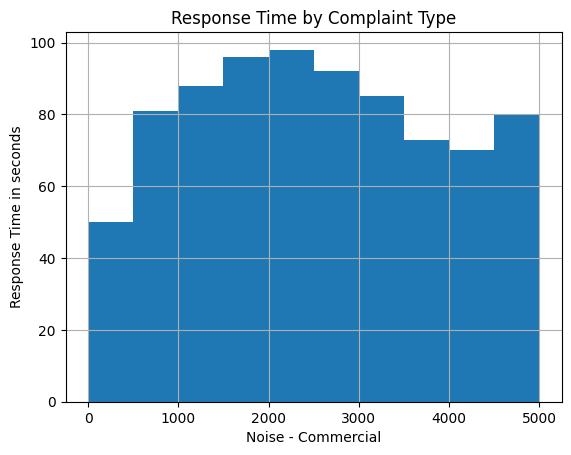

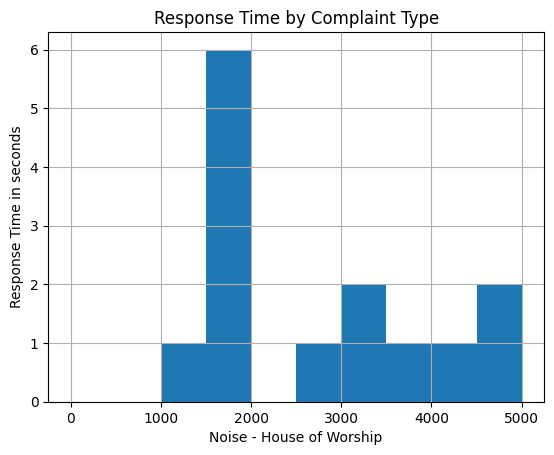

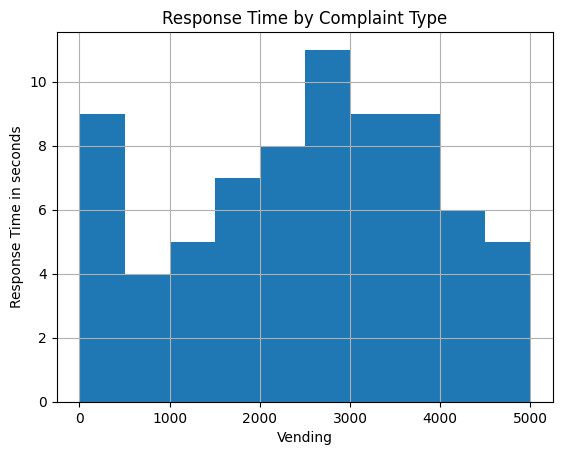

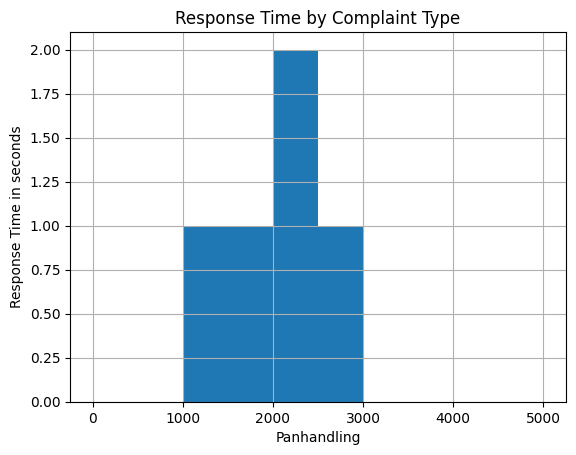

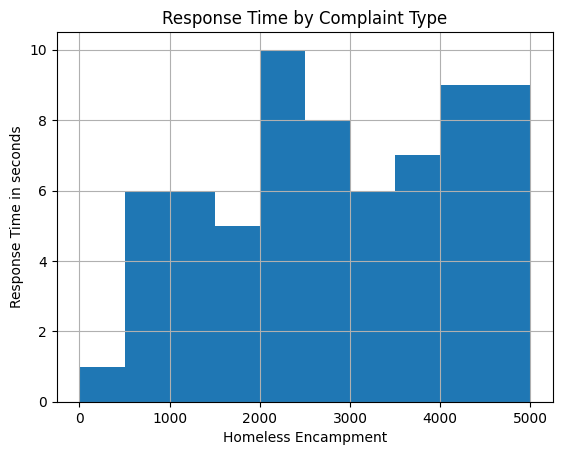

In [85]:
for t in df['Complaint Type'].unique():
    df[df['Complaint Type']== t]['elapsed_time_sec'].hist(range=(0,5000))
    plt.title('Response Time by Complaint Type')
    plt.xlabel(t)
    plt.ylabel('Response Time in seconds')
    plt.show()

**apply log transformation for converting data to gaussian**


In [88]:
df_ct={}
for t in df['Complaint Type'].unique():
    df_ct[t]= np.log(df[df['Complaint Type']==t]['elapsed_time_sec'])
df_ct

{'Noise - Street/Sidewalk': 0        8.111
 12       9.105
 19       7.957
 38       7.478
 54       8.597
          ...  
 17834    8.125
 17835    7.980
 17837    9.676
 17840   10.231
 17841    9.586
 Name: elapsed_time_sec, Length: 1432, dtype: float64,
 'Blocked Driveway': 1        8.563
 2        9.770
 7        8.784
 9        8.522
 10      10.244
          ...  
 17792   10.155
 17810    8.398
 17821   10.239
 17832    8.674
 17839    9.322
 Name: elapsed_time_sec, Length: 5729, dtype: float64,
 'Illegal Parking': 3       10.237
 4        9.431
 5        8.828
 6        8.868
 8       10.336
          ...  
 17827    8.761
 17831    9.071
 17833    8.124
 17836    9.423
 17838    8.151
 Name: elapsed_time_sec, Length: 5073, dtype: float64,
 'Derelict Vehicle': 14      10.540
 151      9.563
 255      8.500
 256      9.608
 295      7.905
          ...  
 17333   10.103
 17356    8.410
 17367    7.946
 17372    8.528
 17374    8.459
 Name: elapsed_time_sec, Length: 1110, dtype:

In [89]:
 print(*df_ct)

Noise - Street/Sidewalk Blocked Driveway Illegal Parking Derelict Vehicle Noise - Commercial Noise - House of Worship Posting Advertisement Noise - Vehicle Animal Abuse Vending Traffic Drinking Bike/Roller/Skate Chronic Panhandling Noise - Park Homeless Encampment Urinating in Public Graffiti Disorderly Youth


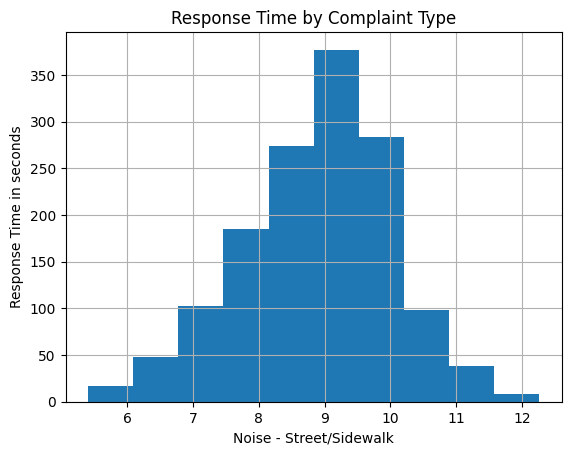

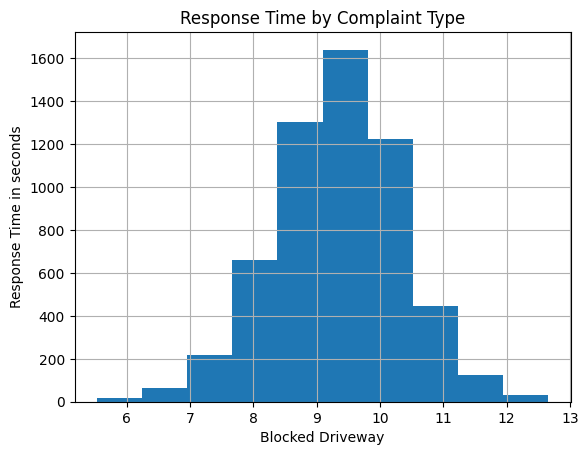

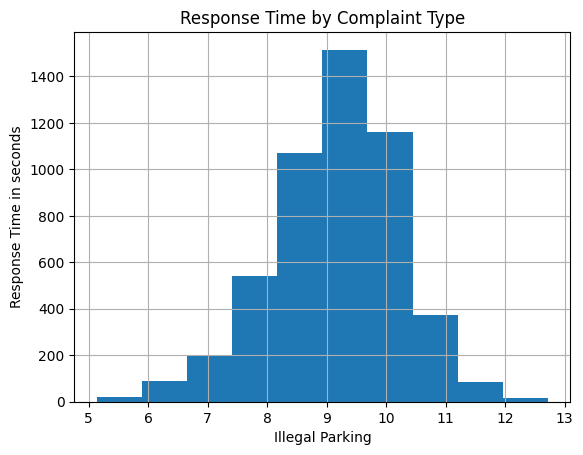

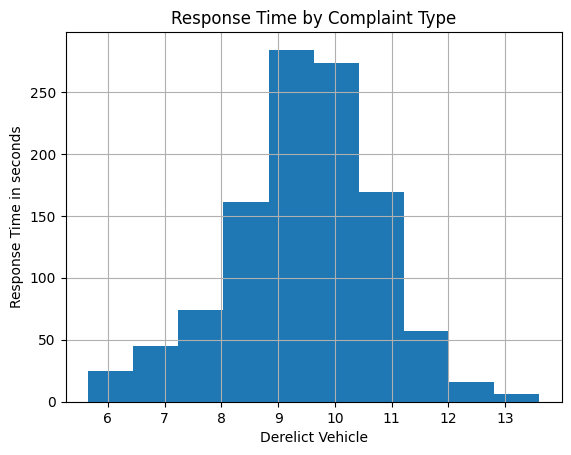

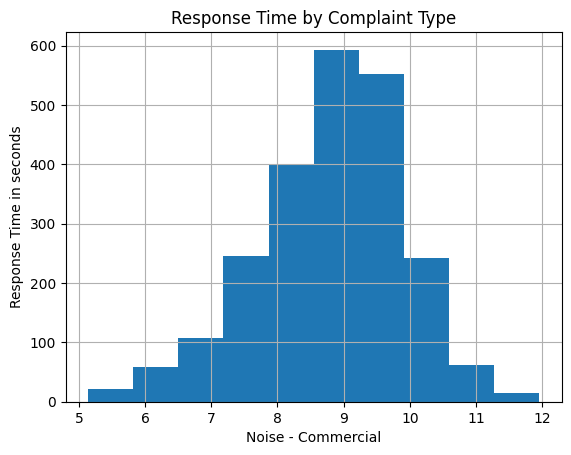

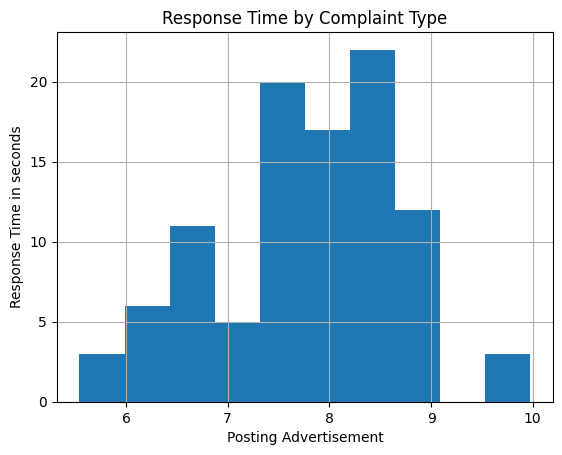

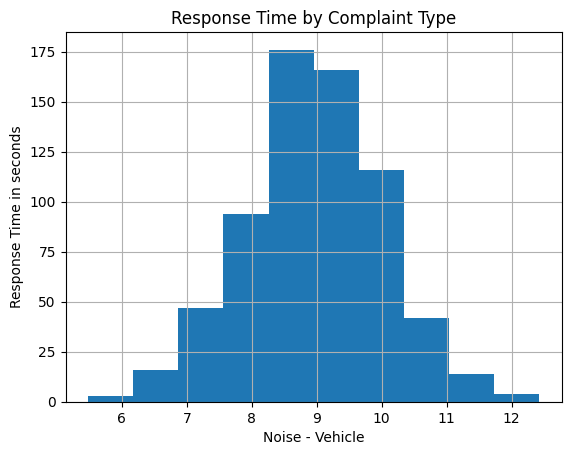

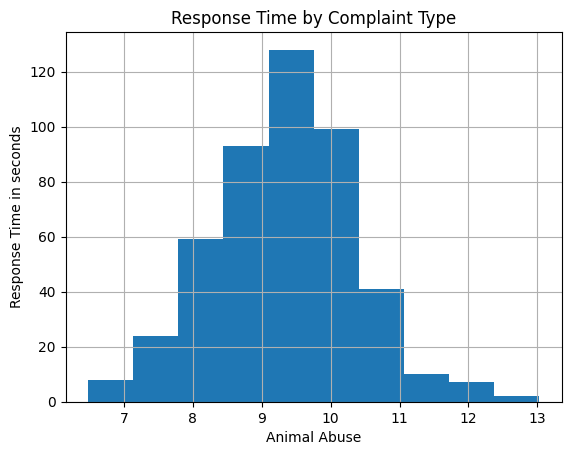

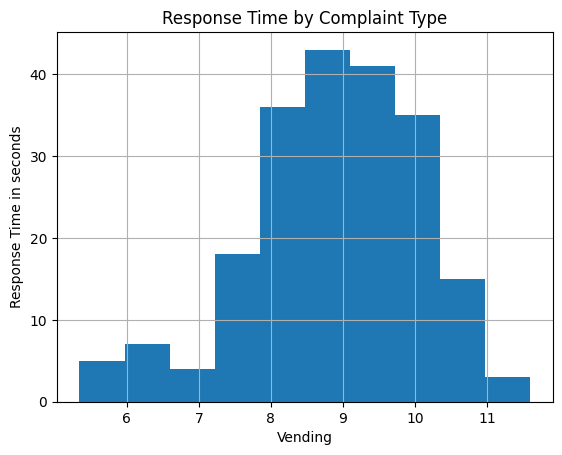

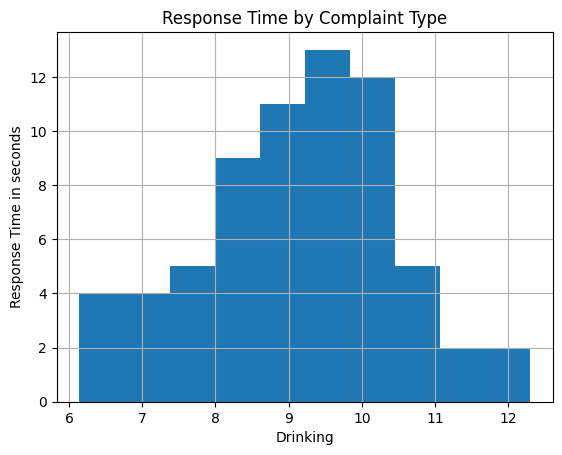

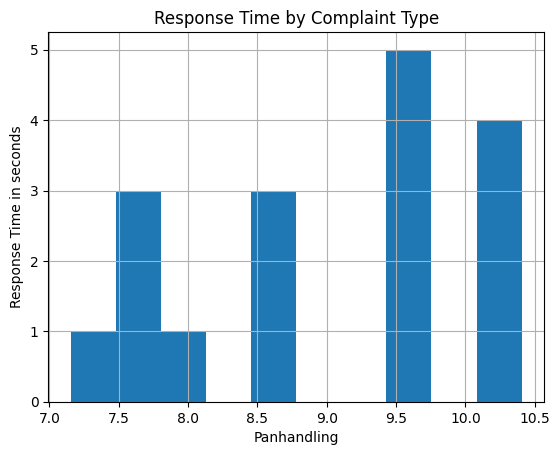

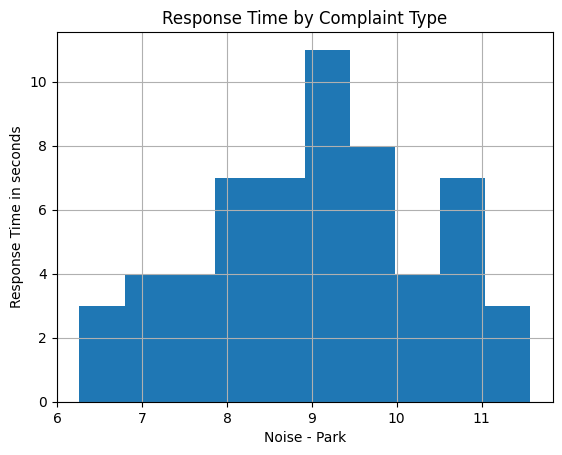

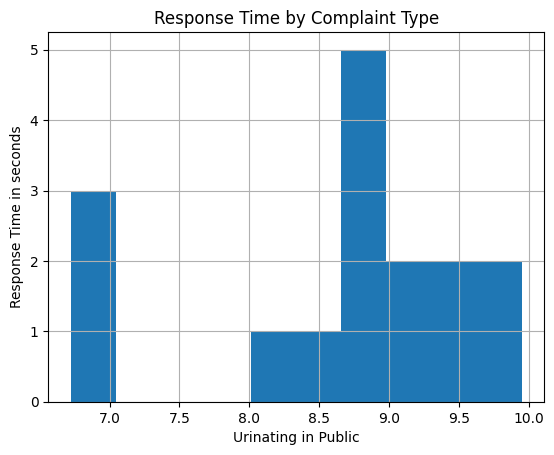

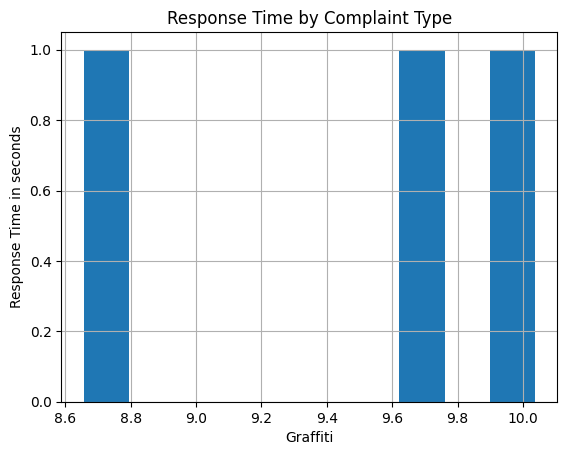

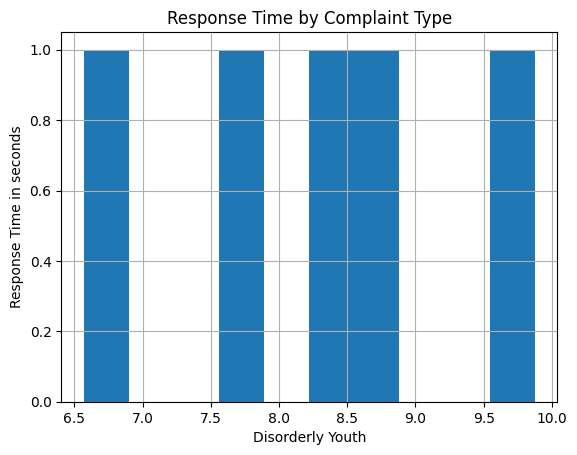

In [90]:
for t in df['Complaint Type'].unique():
    df_ct[t].hist()
    plt.title('Response Time by Complaint Type')
    plt.xlabel(t)
    plt.ylabel('Response Time in seconds')
    plt.show()

**Alternative Hypothesis is True**
**Response time across comlpaint is different**

In [91]:
for c in df['City'].unique():
    print(c)
    print(df[df['City']== c]['elapsed_time_sec'].mean())

NEW YORK
11312.496622613804
ASTORIA
14126.318289786223
BRONX
25164.718316166593
ELMHURST
10284.829493087558
BROOKLYN
16490.29578392622
KEW GARDENS
35100.0625
JACKSON HEIGHTS
12381.990654205607
MIDDLE VILLAGE
17578.12396694215
REGO PARK
11172.09677419355
SAINT ALBANS
18922.863636363636
JAMAICA
20524.378021978024
SOUTH RICHMOND HILL
26102.63687150838
Unknown City
49856.454545454544
RIDGEWOOD
14283.026178010472
HOWARD BEACH
22375.75
FOREST HILLS
12627.652542372882
STATEN ISLAND
12278.65696969697
OZONE PARK
25662.740506329115
RICHMOND HILL
22559.16935483871
WOODHAVEN
33082.05194805195
FLUSHING
10673.050113895217
CORONA
10382.936666666666
QUEENS VILLAGE
34866.49504950495
OAKLAND GARDENS
7925.939393939394
HOLLIS
22435.0
MASPETH
19808.036363636365
EAST ELMHURST
12710.811764705883
SOUTH OZONE PARK
17079.032258064515
WOODSIDE
16822.33644859813
FRESH MEADOWS
9166.648148148148
LONG ISLAND CITY
18563.020408163266
ROCKAWAY PARK
12692.0
SPRINGFIELD GARDENS
31149.470588235294
COLLEGE POINT
11186.7671

In [92]:
df_loc= df[['Complaint Type','Location','City','Borough']]

ccolumns = df_loc.describe(include="O").columns
ccolumns.tolist()

['Complaint Type', 'Location', 'City', 'Borough']

In [93]:
#label encoding
for col in ccolumns:
    df_loc[col] = df_loc[col].astype("category").cat.codes

df_loc

/tmp/ipython-input-1197831903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc[col] = df_loc[col].astype("category").cat.codes
/tmp/ipython-input-1197831903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc[col] = df_loc[col].astype("category").cat.codes
/tmp/ipython-input-1197831903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

Complaint Type  Location  City  Borough
0                  12     11781    28        2
1                   2      9696     1        3
2                   2     11914     4        0
3                   8     10986     4        0
4                   8      7368    11        3
...               ...       ...   ...      ...
17839               2      4929    45        3
17840              12     11043    28        2
17841              12      5280     5        1
17842              13      5866    34        3
17843               9        -1    46       -1

[17737 rows x 4 columns]

In [94]:
cor=df_loc.corr(method='pearson')
cor

Complaint Type  Location  City  Borough
Complaint Type           1.000     0.111 0.143   -0.005
Location                 0.111     1.000 0.038   -0.130
City                     0.143     0.038 1.000    0.730
Borough                 -0.005    -0.130 0.730    1.000

In [95]:
df_ct = pd.crosstab(df['Complaint Type'], df['City'], margins=True)
df_ct

City                       ARVERNE  ASTORIA  BAYSIDE  BELLEROSE  BRONX  \
Complaint Type                                                           
Animal Abuse                     3        8        2          0     92   
Bike/Roller/Skate Chronic        0        1        0          0      3   
Blocked Driveway                 2      190       23          4    963   
Derelict Vehicle                 4       18        9          4    121   
Disorderly Youth                 0        0        0          0      1   
Drinking                         0        4        0          0      8   
Graffiti                         0        0        0          0      0   
Homeless Encampment              0        1        0          0      8   
Illegal Parking                  5      101       29          2    511   
Noise - Commercial               1       68        1          2    196   
Noise - House of Worship         0        2        0          0      2   
Noise - Park                     0        0        0          0      8   
Noise - Street/Sidewalk          0       16        1          1    211   
Noise - Vehicle                  0       10        1          0     78   
Panhandling                      0        0        0          0      0   
Posting Advertisement            0        0        0          0      0   
Traffic                          0        1        0          0     23   
Urinating in Public              0        1        0          0      0   
Vending                          0        0        0          0      8   
All                             15      421       66         13   2233   

City                       BROOKLYN  CAMBRIA HEIGHTS  CENTRAL PARK  \
Complaint Type                                                       
Animal Abuse                    137                0             0   
Bike/Roller/Skate Chronic         2                0             0   
Blocked Driveway               2126                9             0   
Derelict Vehicle                379                6             0   
Disorderly Youth                  1                0             0   
Drinking                          9                0             0   
Graffiti                          2                0             0   
Homeless Encampment              39                0             0   
Illegal Parking                1971                1             0   
Noise - Commercial              701                3             0   
Noise - House of Worship         12                0             0   
Noise - Park                     13                0             0   
Noise - Street/Sidewalk         363                0             1   
Noise - Vehicle                 214                2             0   
Panhandling                       4                0             0   
Posting Advertisement             5                0             0   
Traffic                          63                0             0   
Urinating in Public               1                0             0   
Vending                          30                0             0   
All                            6072               21             1   

City                       COLLEGE POINT  CORONA  ...  SOUTH OZONE PARK  \
Complaint Type                                    ...                     
Animal Abuse                           0       1  ...                 8   
Bike/Roller/Skate Chronic              0       0  ...                 0   
Blocked Driveway                      36     228  ...                57   
Derelict Vehicle                       9       3  ...                19   
Disorderly Youth                       0       0  ...                 0   
Drinking                               0       1  ...                 0   
Graffiti                               0       0  ...                 0   
Homeless Encampment                    0       0  ...                 0   
Illegal Parking                       16      46  ...                24   
Noise

In [96]:
df[df['Complaint Type']==t]['elapsed_time_sec'].values

array([  713.,  4605.,  2345., 19415.,  6849.])

In [97]:
#declare an empty list l
l = []
for t in df['Complaint Type'].unique():
    l.append(df[df['Complaint Type']==t]['elapsed_time_sec'].values)

l

[array([ 3330.,  8996.,  2856., ..., 15927., 27763., 14555.]),
 array([ 5233., 17494.,  6529., ..., 27975.,  5847., 11178.]),
 array([27927., 12464.,  6821., ...,  3376., 12364.,  3468.]),
 array([37785., 14224.,  4913., ...,  2825.,  5052.,  4717.]),
 array([ 3078., 10589.,  4598., ...,  3918., 16748., 21717.]),
 array([ 1610.,  5962.,  4536.,  3460.,  8747.,  1529.,  1947.,  1077.,
         3634.,  3102.,  5858.,  1503.,  2612., 21093.,  4338.,  8901.,
        25127.,  5713., 21690., 17758., 11607.,  4684.,  8352.,  6556.,
         6771.,  1638.,  1613.,  7635., 16066.]),
 array([ 7643.,  7798.,  7893.,  8047.,  8144.,  3931.,  4096.,  4190.,
         4344.,  4439.,   755.,   810.,   868.,   834.,   869.,  7175.,
         4796.,  4895.,  4935.,  5029.,  5118.,  4437.,  4458.,  6201.,
         6289.,  6316.,  3084.,  3450.,  3546.,  3649.,  3503.,  5046.,
         5141.,  5164.,  5673.,  5759.,  3026.,  2955.,  2792.,  2683.,
         2636.,  2237.,  2336.,  2428.,  2452.,  2570., 195

In [98]:
from scipy import stats
stats.kruskal(*l)
chi2, p, dof, ex = stats.chi2_contingency(df_ct)
df_ct

City                       ARVERNE  ASTORIA  BAYSIDE  BELLEROSE  BRONX  \
Complaint Type                                                           
Animal Abuse                     3        8        2          0     92   
Bike/Roller/Skate Chronic        0        1        0          0      3   
Blocked Driveway                 2      190       23          4    963   
Derelict Vehicle                 4       18        9          4    121   
Disorderly Youth                 0        0        0          0      1   
Drinking                         0        4        0          0      8   
Graffiti                         0        0        0          0      0   
Homeless Encampment              0        1        0          0      8   
Illegal Parking                  5      101       29          2    511   
Noise - Commercial               1       68        1          2    196   
Noise - House of Worship         0        2        0          0      2   
Noise - Park                     0        0        0          0      8   
Noise - Street/Sidewalk          0       16        1          1    211   
Noise - Vehicle                  0       10        1          0     78   
Panhandling                      0        0        0          0      0   
Posting Advertisement            0        0        0          0      0   
Traffic                          0        1        0          0     23   
Urinating in Public              0        1        0          0      0   
Vending                          0        0        0          0      8   
All                             15      421       66         13   2233   

City                       BROOKLYN  CAMBRIA HEIGHTS  CENTRAL PARK  \
Complaint Type                                                       
Animal Abuse                    137                0             0   
Bike/Roller/Skate Chronic         2                0             0   
Blocked Driveway               2126                9             0   
Derelict Vehicle                379                6             0   
Disorderly Youth                  1                0             0   
Drinking                          9                0             0   
Graffiti                          2                0             0   
Homeless Encampment              39                0             0   
Illegal Parking                1971                1             0   
Noise - Commercial              701                3             0   
Noise - House of Worship         12                0             0   
Noise - Park                     13                0             0   
Noise - Street/Sidewalk         363                0             1   
Noise - Vehicle                 214                2             0   
Panhandling                       4                0             0   
Posting Advertisement             5                0             0   
Traffic                          63                0             0   
Urinating in Public               1                0             0   
Vending                          30                0             0   
All                            6072               21             1   

City                       COLLEGE POINT  CORONA  ...  SOUTH OZONE PARK  \
Complaint Type                                    ...                     
Animal Abuse                           0       1  ...                 8   
Bike/Roller/Skate Chronic              0       0  ...                 0   
Blocked Driveway                      36     228  ...                57   
Derelict Vehicle                       9       3  ...                19   
Disorderly Youth                       0       0  ...                 0   
Drinking                               0       1  ...                 0   
Graffiti                               0       0  ...                 0   
Homeless Encampment                    0       0  ...                 0   
Illegal Parking                       16      46  ...                24   
Noise

In [99]:
chi2, p, dof, ex = stats.chi2_contingency(df_ct)

In [101]:
print(f'Chi_square value {chi2}\n\np value {p}\n\ndegrees of freedom {dof}\n\n expected {ex}')

Chi_square value 8032.779256035881

p value 0.0

degrees of freedom 893

 expected [[3.98319896e-01 1.11795118e+01 1.75260754e+00 3.45210577e-01
  5.92965552e+01 1.61239894e+02 5.57647855e-01 2.65546598e-02
  1.93849016e+00 7.96639793e+00 4.51429216e+00 5.76236117e+00
  1.35428765e+00 2.12437278e-01 1.16574956e+01 3.13344985e+00
  4.30185488e+00 4.51429216e-01 1.61983424e+00 1.59327959e+00
  2.84134859e+00 1.20823702e+01 1.27462367e+00 1.27462367e+00
  3.90353498e+00 4.38151886e+00 3.21311383e+00 5.31093195e-02
  9.04186165e+01 8.76303772e-01 4.19563624e+00 2.68202063e+00
  3.29277781e+00 3.29277781e+00 1.01438800e+01 6.90421154e-01
  1.27462367e+00 1.75260754e+00 3.29277781e+00 4.75328410e+00
  9.02858432e-01 2.19075943e+01 1.06218639e+00 5.84202515e-01
  1.77916220e+00 4.08941760e+00 5.68269719e+00 4.71000000e+02]
 [1.26853470e-02 3.56035406e-01 5.58155269e-02 1.09939674e-02
  1.88842533e+00 5.13502847e+00 1.77594858e-02 8.45689801e-04
  6.17353555e-02 2.53706940e-01 1.43767266e-01 1

**The p-value of 0 means the two variables (Complaint Type and City) are NOT independent**